# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Последовательность работы:

**1. Обзор данных**

Основная задача на данном шаге: получить данные и изучить, что они из себя представляют. Для этого:
* загрузим необходимые библиотеки и предоставленный датафрейм;
* выведем основную информацию о датафрейме на экран;
* построим общую гистограмму для всех числовых столбцов таблицы;
* сделаем выводы по полученной информации: соответствуют ли названия колонок принятому стилю, корректно ли присвоены типы данных, есть ли пропуски в данных и т.д.

**2. Предобработка данных**

В зависимости от полученных на первом шаге выводов, приступим к предобработке данных. 
Чтобы данные подходили для исследовательской работы:
* проверим данные на явные и неявные дубликаты;
* изменим тип данных при необходимости, чтобы он соответствовал хорошему стилю;
* изучим пропуски и, по возможности, заполним пропущенные значения;
* изучим аномалии и, по возможности, восстановим корректные значения, либо удалим аномалии.

**3. Расчёт недостающих значений**

Для исследовательской работы не хватает некоторых значений. Добавим в таблицу новые столбцы и рассчитаем следующие параметры:
* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры;
* расстояние до центра города в километрах.
 
**4. Исследовательский анализ данных**

Приступим к анализу данных.

- Построим отдельные гистограммы, изучим и запишем свои наблюдения для следующих параметров:
  * общая площадь;
  * жилая площадь;
  * площадь кухни;
  * цена объекта;
  * количество комнат;
  * высота потолков;
  * этаж квартиры;
  * тип этажа квартиры;
  * общее количество этажей в доме;
  * расстояние до центра города в метрах;
  * расстояние до ближайшего аэропорта;
  * расстояние до ближайшего парка;
  * день и месяц публикации объявления.
  

- Изучим срок продажи квартир, зависимость скорости продаж от года. Изучим, как следующие факторы влияют на скорость продаж:
  * этаж квартиры;
  * расстояние до центра;
  * стоимость квартиры.
  

- Изучим, как следующие факторы влияют на стоимость объектов:
  * количество комнат;
  * день, месяц и год размещения;
  * общая площадь;
  * площадь кухни;
  * жилая площадь.

- Посмотрим, как меняется средняя стоимость квартир по годам.

- Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

- Опишем, как стоимость объектов зависит от расстояния до центра города.

**5. Опишем полученные результаты в выводе**

## Обзор данных

### Получение общей информации

Чтобы произвести первичное исследование данных, загрузим необходимые библиотеки и предоставленный датафрейм. Также выведем основную информацию о датафрейме на экран и построим общую гистограмму для всех числовых столбцов таблицы.

In [1]:
#загружаем библиотеки
import pandas as pd 
import numpy as np 
import warnings 
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
data = pd.read_csv('real_estate_data.csv', sep = '\t') # считывание csv-файла

In [3]:
data.head(10) # вывод первых 10 строк датафрейма на экран

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

In [4]:
data.info() #вывод основной информации о датафрейме на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

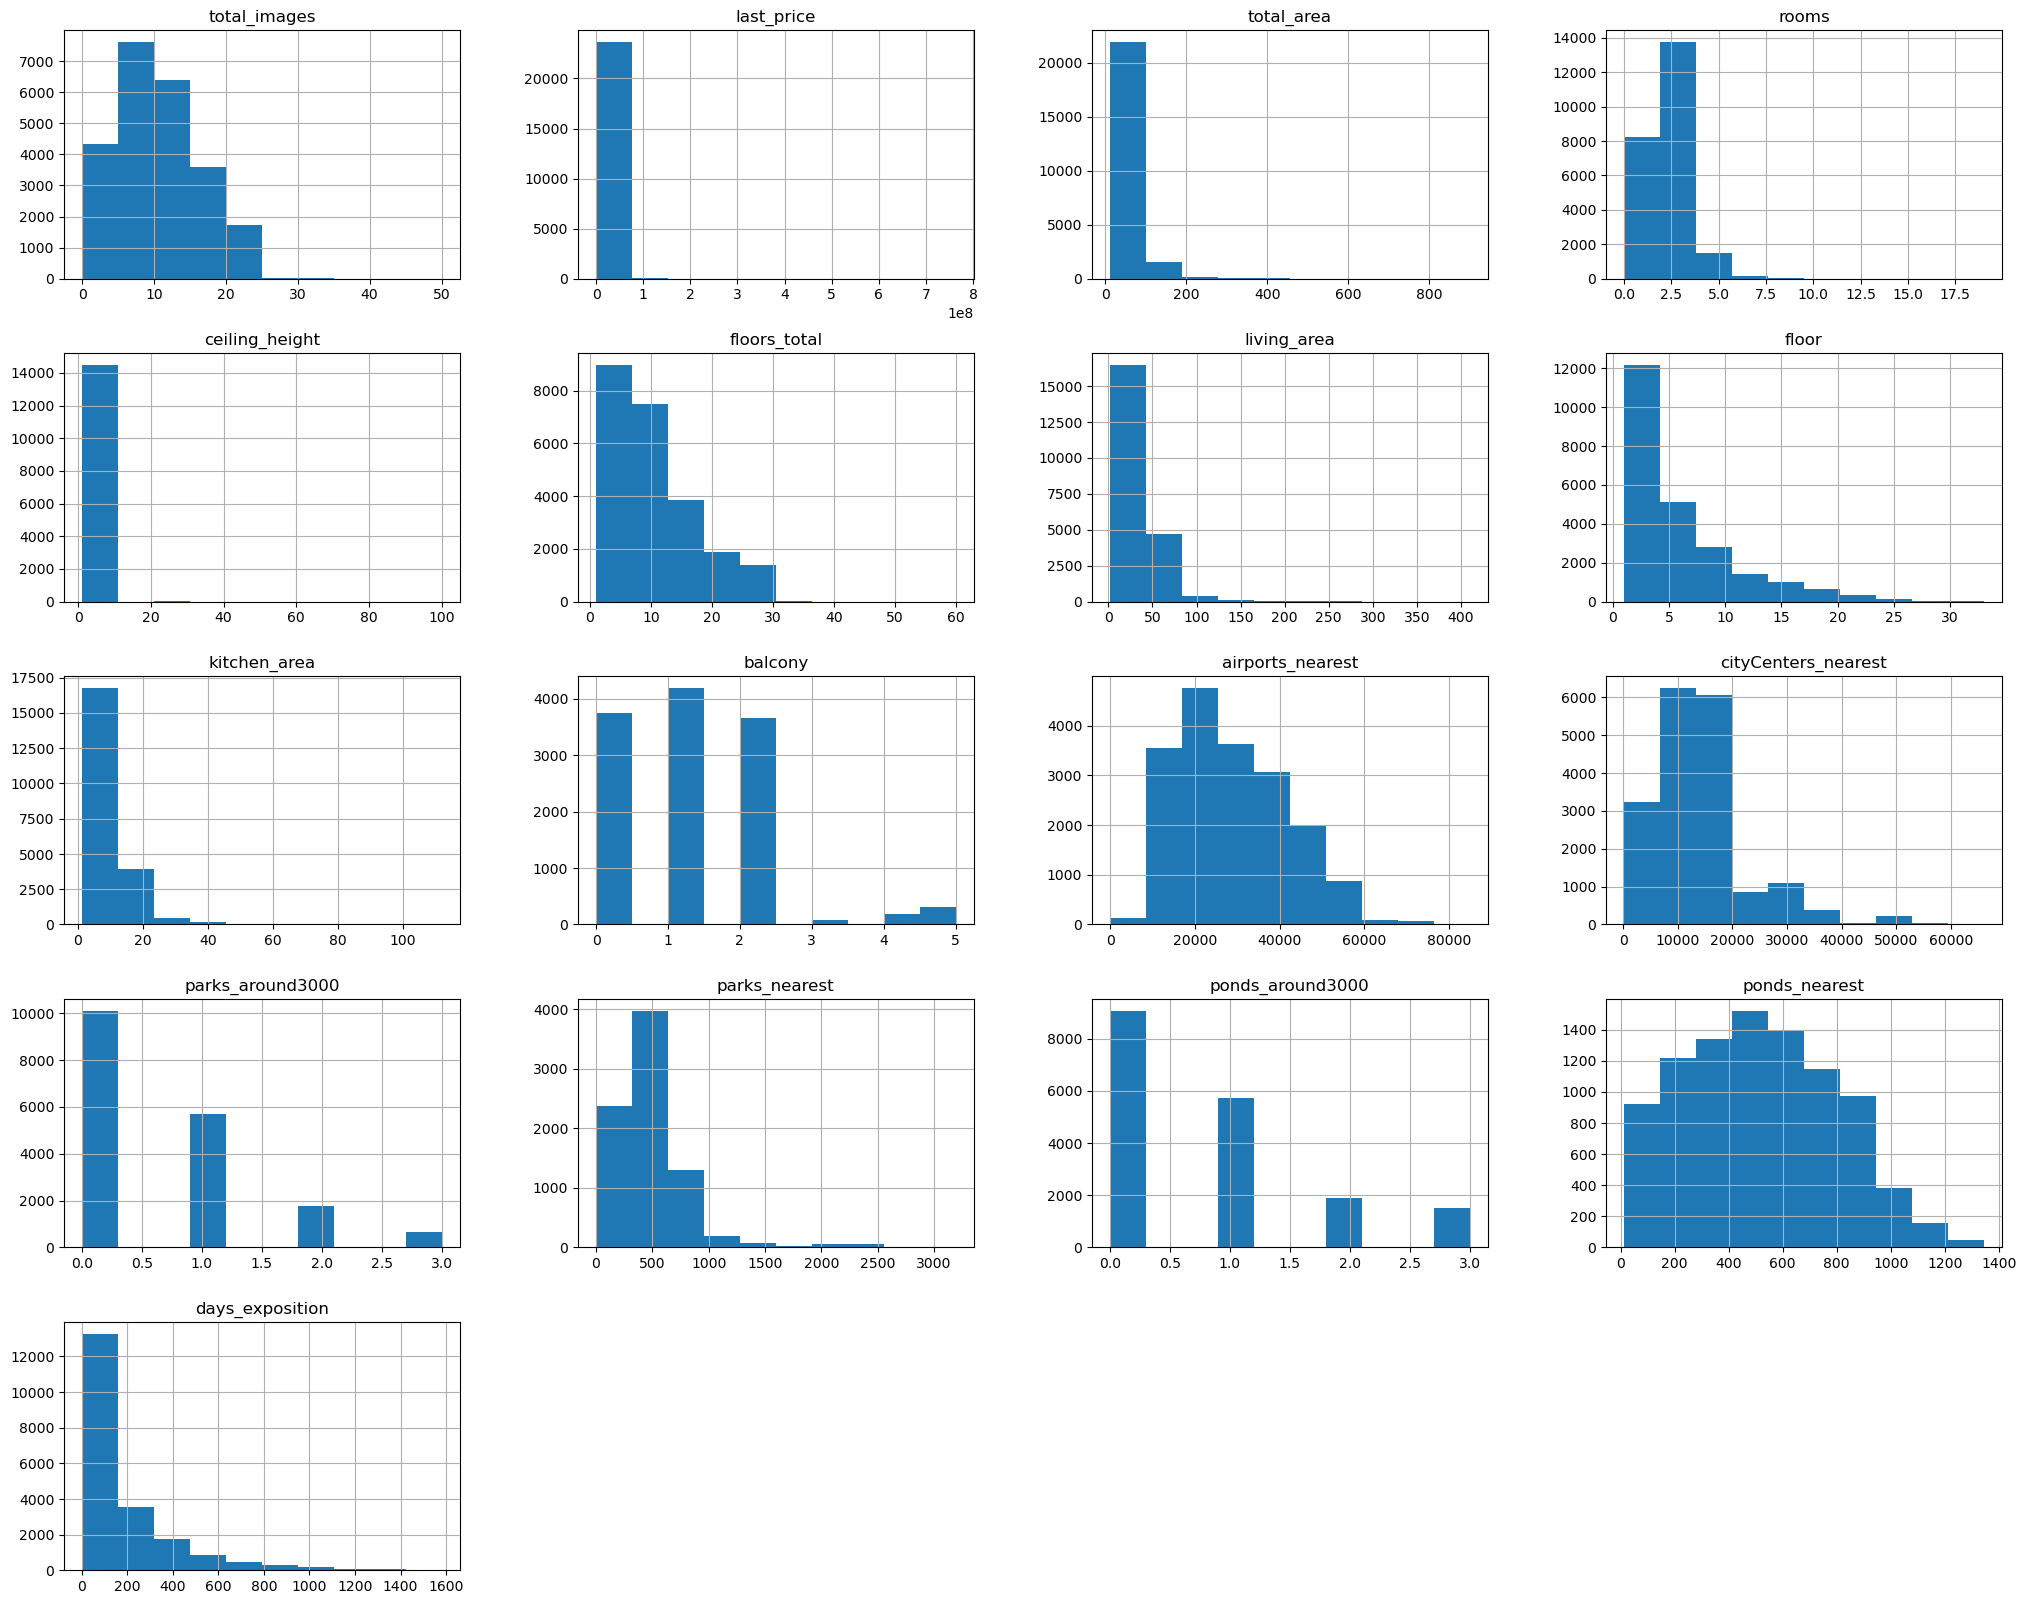

In [5]:
data.hist(bins=10, figsize=(25, 20)); #вывод общей гистограммы для всех числовых столбцов

### Вывод 
 
В каждой строке таблицы — данные о продаваемой квартире. Датафрейм содержит 23699 записей, что достаточно для проверки гипотез.
В данных встречаются пропуски, которые нужно изучить; названия колонок расходятся с хорошим стилем; тип данных некоторых значений нужно заменить на другой. Таким образом, прежде чем приступить к исследовательскому анализу данных, необходимо произвести их предобработку.


## Предобработка данных

### Переименование названий столбцов

Для начала приведём названия столбцов к надлежащему виду. Посмотрим на перечень названий столбцов датафрейма, чтобы выявить недочёты.

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В названиях встречаются слитые слова и заглавные буквы. Приведём названия к змеиному регистру и проверим результат.

In [7]:
# Исправление стиля в заголовках столбцов и приведение их к змеиному регистру
data = data.rename(columns={
    'cityCenters_nearest' : 'city_centers_nearest',
    'parks_around3000' : 'parks_around_3000',
    'ponds_around3000' : 'ponds_around_3000',
}) 

#Проверка результата:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Дубликаты

Распространённая проблема - это возникновение повторяющихся записей в данных. Они могут появляться по разным причинам: ручной ввод данных, объединение данных из разных источников и т.д. Наличие дубликатов может привести к искажению информации в процессе исследования. Поэтому дубликаты нужно устранить.

Проверим данные на **неявные дубликаты**. Для этого изучим уникальные значения в столбце **locality_name**.

In [8]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Найдены следующие неявные дубликаты:
* **'городской поселок' и 'городской посёлок'**. Т.к. Заменим 'ё' на 'е'.
* **'Мурино', 'Поселок Мурино', 'посёлок Мурино'**. Т.к. в 2019 году  посёлок Мурино получил статус города, 'Поселок Мурино' и 'посёлок Мурино' заменим на 'Мурино'.
* **'Кудрово', 'деревня Кудрово'**. Т.к. в 2018 году деревня Кудрово получила статус города, заменим 'деревня Кудрово' на 'Кудрово'.
* **'городской поселок' и 'поселок городского типа'**. Присвоим городскому поселку значение 'поселок городского типа'.

Выведем уникальные значения повторно для проверки результата.

In [9]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'].sort_values().unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Проверим данные на **явные дубликаты** по сумме ключевых параметров.

In [10]:
data.duplicated(subset=[
    'locality_name', 'floor', 
    'floors_total', 'total_area', 'rooms', 
    'city_centers_nearest', 'living_area']).sum()

63

Выявлено 63 явных дубликата. Удалим их.

In [11]:
data = data.drop_duplicates(subset=[
    'locality_name', 'floor', 
    'floors_total', 'total_area', 'rooms', 
    'city_centers_nearest', 'living_area'])

In [12]:
# check
data.locality_name.nunique()

321

### Замена типа данных

Типы данных определяют, как управлять данными, какие операции над ними производить. Неверный тип данных может привести к ошибке. 

В следующих столбцах заменим тип данных:
* **first_day_exposition**. Тип данных заменим на **datetime**, т.к. в столбце указаны дата и время;
* **floors_total**. Тип данных заменим на **int**, т.к. в столбце указаны этажи в доме, т.е. только целые числа;
* **balcony**. Тип данных заменим на **int** по той же самой причине, что и floors_total;
* **parks_around_3000**. Тип данных заменим на **int** по той же самой причине, что и floors_total;
* **ponds_around_3000**. Тип данных заменим на **int** по той же самой причине, что и floors_total;
* **is_apartment**. Тип данных заменить на **bool**, т.к. в столбце значение булева типа: True и False.


In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['days_exposition'] = data['days_exposition'].round()
for column in ['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition']:
    data[column] = data[column].astype('Int64')   
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23636 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23636 non-null  int64         
 1   last_price            23636 non-null  float64       
 2   total_area            23636 non-null  float64       
 3   first_day_exposition  23636 non-null  datetime64[ns]
 4   rooms                 23636 non-null  int64         
 5   ceiling_height        14468 non-null  float64       
 6   floors_total          23550 non-null  Int64         
 7   living_area           21741 non-null  float64       
 8   floor                 23636 non-null  int64         
 9   is_apartment          23636 non-null  bool          
 10  studio                23636 non-null  bool          
 11  open_plan             23636 non-null  bool          
 12  kitchen_area          21366 non-null  float64       
 13  balcony              

### Работа с пропусками, аномалиями, выбросами

Поработаем с пропусками, аномалиями и выбросами. Попробуем проанализировать причины пропусков и аномалий. По возможности, заменим (например, на медиану) искаженные и недостающие данные (NaN) на иные значения, либо удалим. Избавимся от выбросов, чтобы они не искажали результаты исследования.  

Определим, в каких столбцах есть пропуски.

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9168
floors_total               86
living_area              1895
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2270
balcony                 11488
locality_name              48
airports_nearest         5504
city_centers_nearest     5481
parks_around_3000        5480
parks_nearest           15570
ponds_around_3000        5480
ponds_nearest           14542
days_exposition          3165
dtype: int64

Пропуски обнаружены в 13-ти столбцах. Поработаем последовательно с каждым столбцом.

In [15]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

In [16]:
# check
# пропущенные значения бары + значения

def pass_value_barh(df):
    
    fig, ax = plt.subplots(figsize=(19, 6))
    
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19,6), legend=False, fontsize=16, ax = ax)
            .set_title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        );
#         plt.grid(visible=True, color='grey', linestyle='--', linewidth=0.5, alpha=0.8)
        plt.xlim(0, 100)
    
        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.1,
                     str(round((i.get_width()), 2)),
                     fontsize=14, 
                     color='black')
    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции')

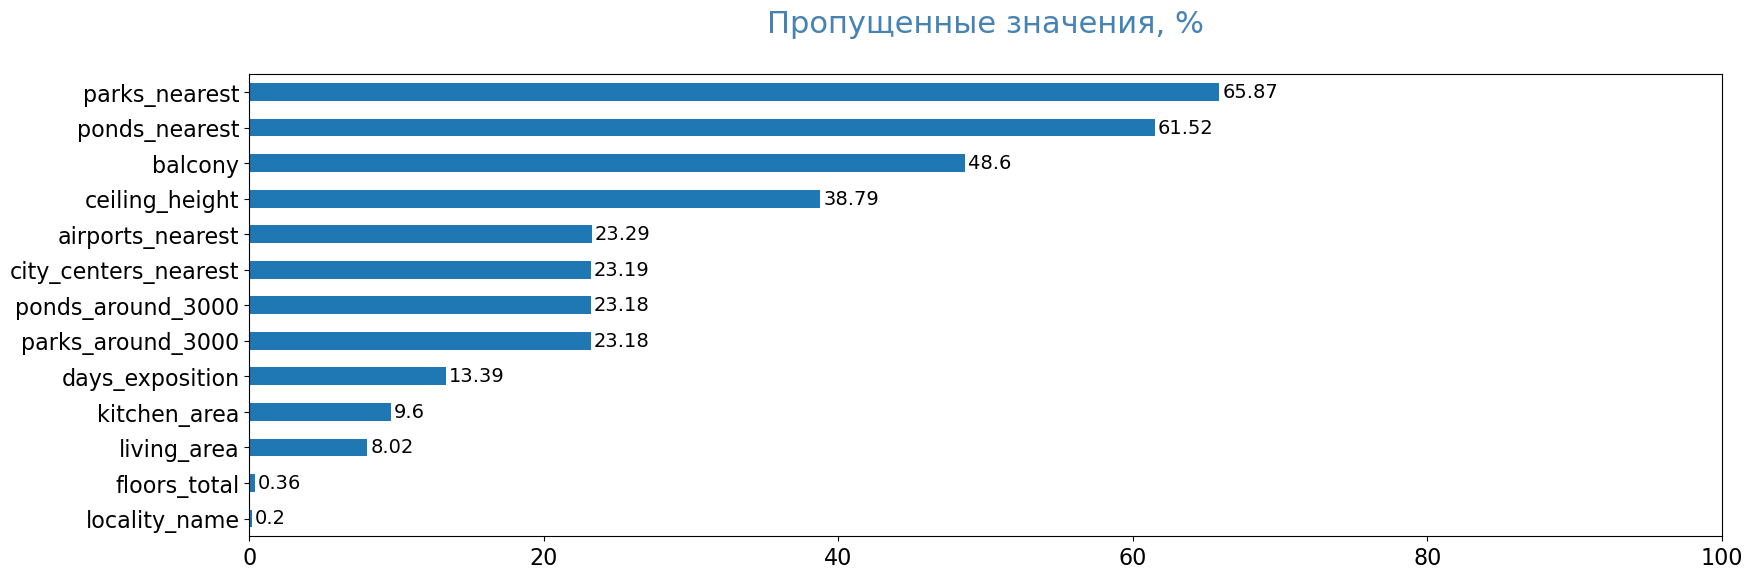

In [17]:
pass_value_barh(data)

#### Столбец total_images

В столбце указано значение, определяющее число фотографий в объявлении. Пропусков нет. Выведем все уникальные значения.


In [18]:
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

Значения адекватные, не будем их трогать.

#### Столбец last_price

В столбце указана цена на момент снятия публикации. Пропусков нет. Отсортируем и посмотрим, какие минимальные и максимальные значения в данном столбце.


In [19]:
data['last_price'].sort_values() 

8793         12190.0
14911       430000.0
17456       430000.0
16274       440000.0
9581        450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23636, dtype: float64

Слишком низкие значения точно вызывают подозрение. Построим гистограмму и диаграмму размаха, а также посмотрим описание данных.


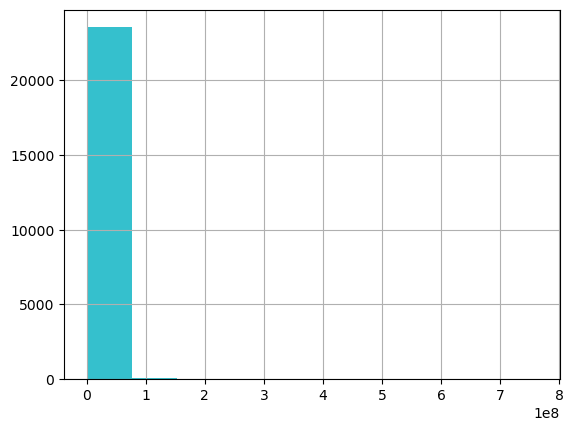

In [20]:
data['last_price'].hist(bins  = 10, color = '#35c0cd');

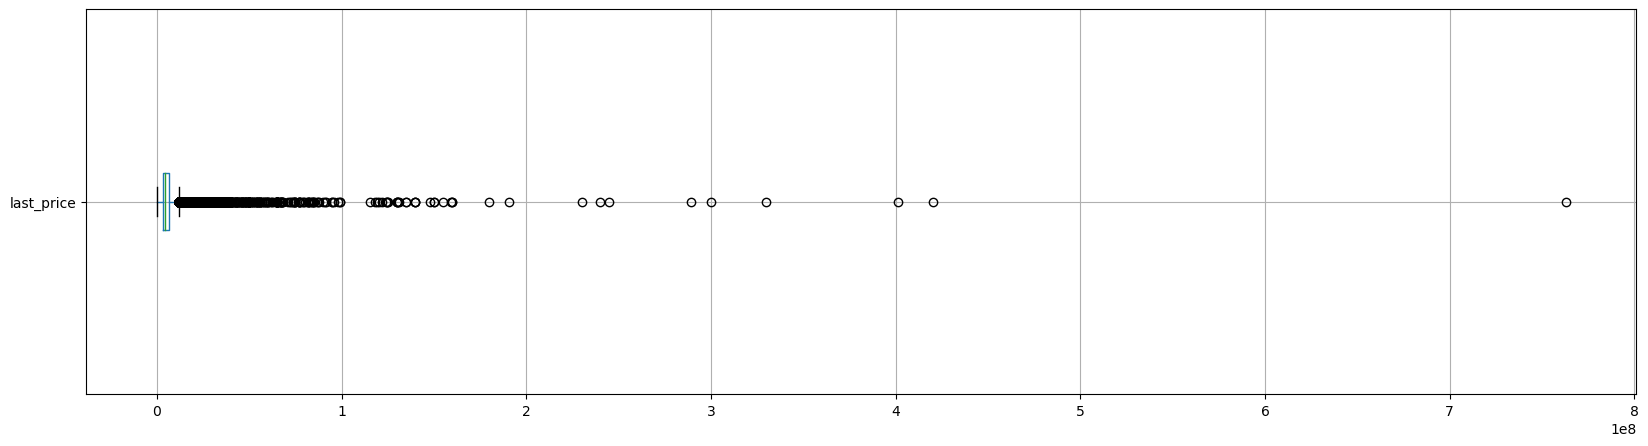

In [21]:
data.boxplot(column=['last_price'], vert=False, figsize =(20, 5));

In [22]:
data[['last_price']].describe()

last_price
count  2.363600e+04
mean   6.542681e+06
std    1.089293e+07
min    1.219000e+04
25%    3.420000e+06
50%    4.650000e+06
75%    6.800000e+06
max    7.630000e+08

Минимальная цена 12190 (кажется невозможно низкой), максимальная - 763000000. Большая часть значений лежит между 3400000 и 6800000. Среднее значение сильно отличается от медианы (влияние выбросов). Посмотрим, как много аномально низких значений.

In [23]:
len(data[data['last_price'] < 1000000])

223

Всего лишь 1% от всех данных. Значения, которые ниже 1000000 заменим на медиану, рассчитанную в зависимости от количества комнат. 

In [24]:
data.loc[data['last_price'] < 1000000, 'last_price'] = data.groupby('rooms')['last_price'].transform('median')

На первый взгляд кажется, что и максимальная цена тоже аномальна. Интересно посмотреть, какая максимальная общая площадь в датафрейме.

In [25]:
data['total_area'].max()

900.0

Если есть такие площади, то, наверное, возможны и соответствующие цены. Нет ли ошибки в таких площадях? По данным от аналитиков ЦИАН, площадь самой большой квартиры Санкт-Петербурга составляет 539 кв. м. Зафиксируем это значение и, когда будем работать со столбцом total_area исключим все площади, которые составляют более 539 кв. м, из таблицы. Значения до 500 кв.м придётся признать достоверными. Будем надеяться, что аналитики ЦИАН проводили предобработку данных.

Посмотрим, сколько значений  больше 60000000

In [26]:
len(data[data['last_price'] > 60000000])

101

Максимальные цены могут быть вполне реальными, однако они выглядят, как выбросы. Это значит, что они не типичны, поэтому удалим их.
Проверим результат, а затем выведем повторно гистограмму и диаграмму размаха.

In [27]:
# check
data.shape[0]

23636

In [28]:
data = data[data.last_price < 60000000]
data['last_price'].sort_values() 

4277      1000000.0
19617     1000000.0
7888      1000000.0
11956     1000000.0
16759     1000000.0
            ...    
18873    58500000.0
12223    59000000.0
9634     59534892.0
1388     59800000.0
1808     59914124.0
Name: last_price, Length: 23535, dtype: float64

In [29]:
# check
data.shape[0]

23535

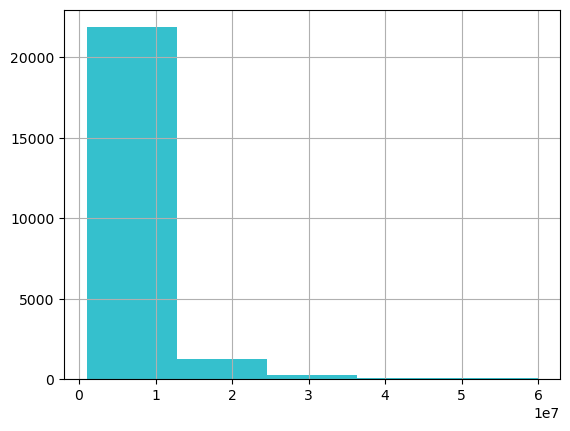

In [30]:
data['last_price'].hist(bins  = 5, color = '#35c0cd');

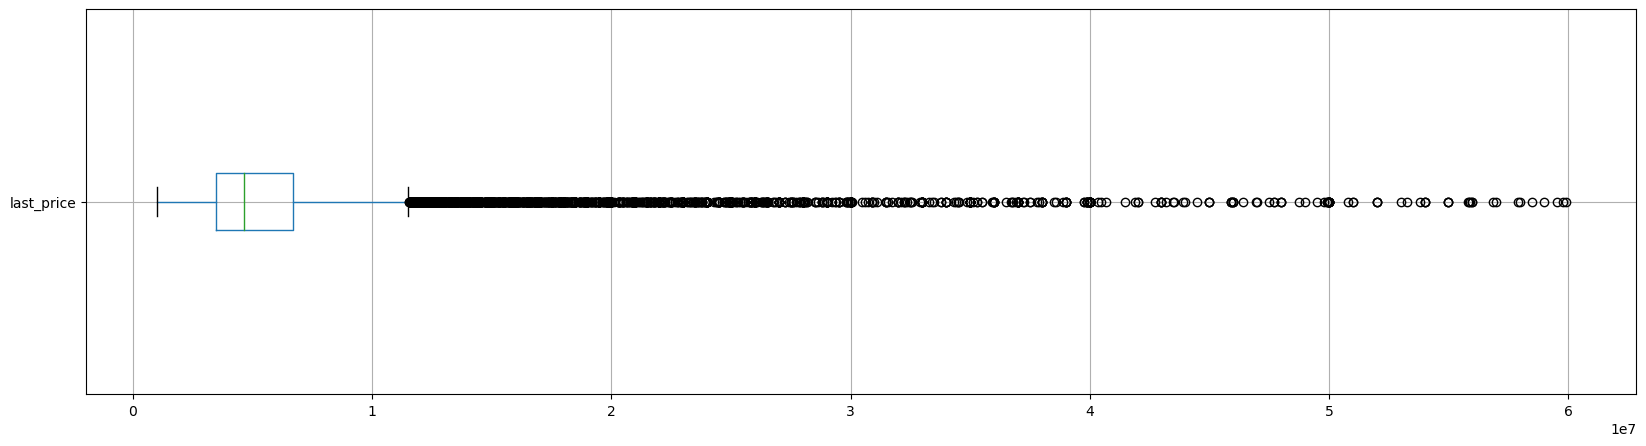

In [31]:
data.boxplot(column=['last_price'], vert=False, figsize =(20, 5));

In [32]:
data[['last_price']].describe()

last_price
count  2.353500e+04
mean   6.096837e+06
std    5.242435e+06
min    1.000000e+06
25%    3.490000e+06
50%    4.650000e+06
75%    6.700000e+06
max    5.991412e+07

Отлично. Мы отобрали то, что нужно для аналитики: наиболее типичные значения. Остановимся на этом, а то останемся без данных.

#### Столбец total_area

В столбце указана общая площадь квартиры в кв.м. Пропусков нет. Отсортируем и посмотрим, какие минимальные и максимальные значения в данном столбце.


In [33]:
data['total_area'].sort_values() 

19904     12.0
17961     13.0
19807     13.0
19546     13.0
19558     13.2
         ...  
20273    460.8
6221     470.3
660      483.9
9826     494.1
4237     517.0
Name: total_area, Length: 23535, dtype: float64

Вполне адекватные значения. Нереально большие площади, видимо, были ликвидированы вместе с выбросами цен. Но посмотрим гистограмму и диаграмму размаха, чтобы выявить и проанализировать выбросы в данном столбце.

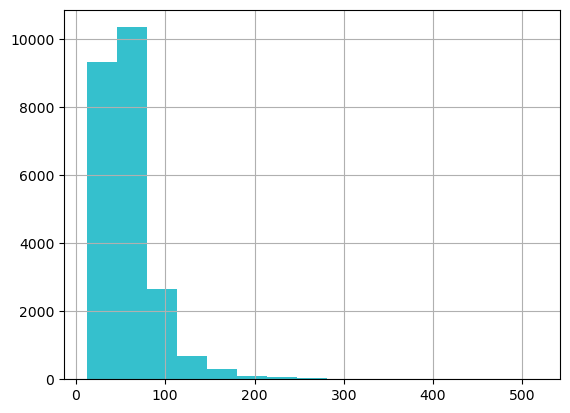

In [34]:
data['total_area'].hist(bins  = 15, color = '#35c0cd');

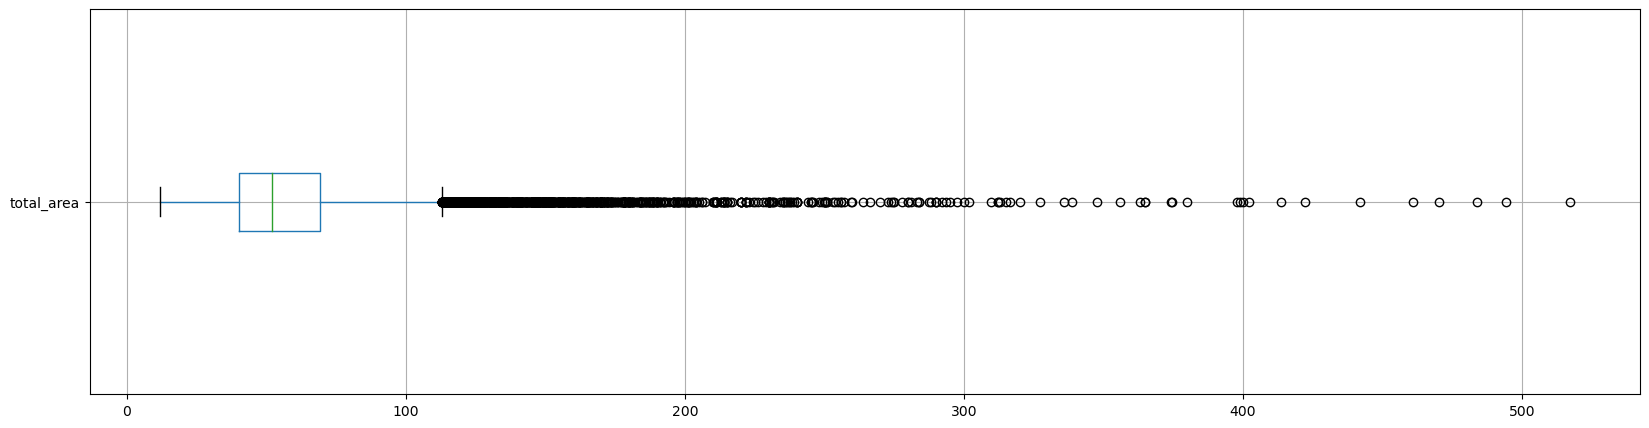

In [35]:
data.boxplot(column=['total_area'], vert=False, figsize =(20, 5));

In [36]:
data[['total_area']].describe()

total_area
count  23535.000000
mean      59.422430
std       31.623326
min       12.000000
25%       40.000000
50%       52.000000
75%       69.195000
max      517.000000

На диаграмме размаха видны выбросы. Посмотрим, как много квартир с площадью больше 250 и меньше 20 кв.м.

In [37]:
len(data[data['total_area'] > 250])

66

In [38]:
len(data[data['total_area'] < 20])

27

In [39]:
# check
data.shape[0]

23535

Удалим 93 строки. Повторно построим гистограмму и диаграмму размаха.

In [40]:
data = data[(data.total_area <= 250) & (data.total_area >= 20)]
data['total_area'].sort_values() 

8873      20.0
4077      20.0
17860     20.0
19477     20.0
21419     20.0
         ...  
681      249.0
13019    249.9
20791    250.0
23491    250.0
13931    250.0
Name: total_area, Length: 23442, dtype: float64

In [41]:
# check
data.shape[0]

23442

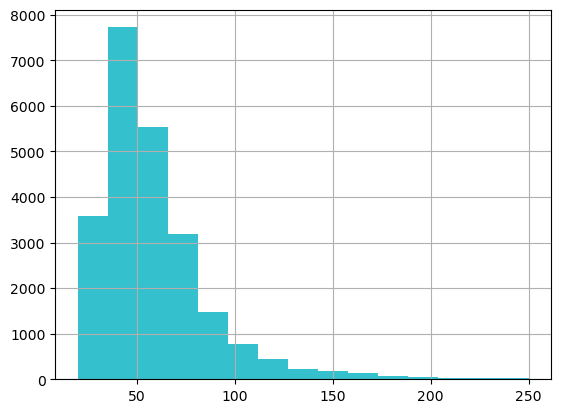

In [42]:
data['total_area'].hist(bins  = 15, color = '#35c0cd');

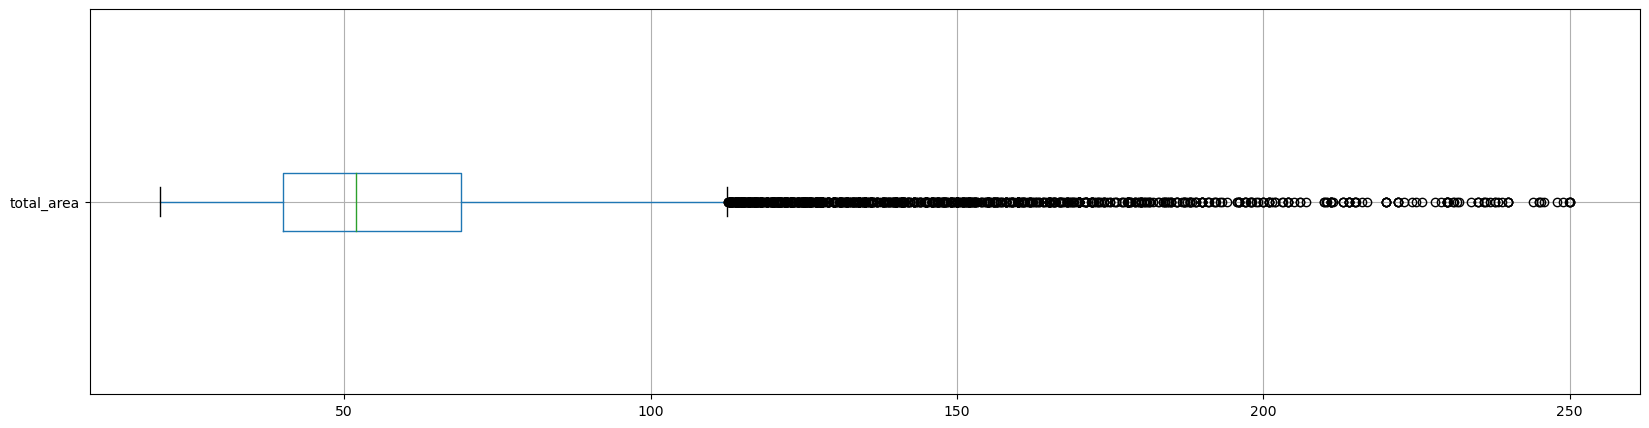

In [43]:
data.boxplot(column=['total_area'], vert=False, figsize =(20, 5));

In [44]:
data[['total_area']].describe()

total_area
count  23442.000000
mean      58.729489
std       28.160112
min       20.000000
25%       40.000000
50%       52.000000
75%       69.000000
max      250.000000

Выбросы кучно собрались вместе. Это хороший знак, идём дальше.

#### Столбец first_day_exposition

Столбец содержит дату публикации объявления. Тип данных мы поменяли ранее. Пока с данным столбцом больше ничего делать не надо.

#### Столбец rooms

Столбец содержит информацию о количестве комнат. Пропущенных данных нет. Выведем уникальные значения.

In [45]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14], dtype=int64)

Аномальных значений нет. Квартиры, где 0 комнат, возможно квартиры-студии. Построим гистограмму и диаграмму размаха.

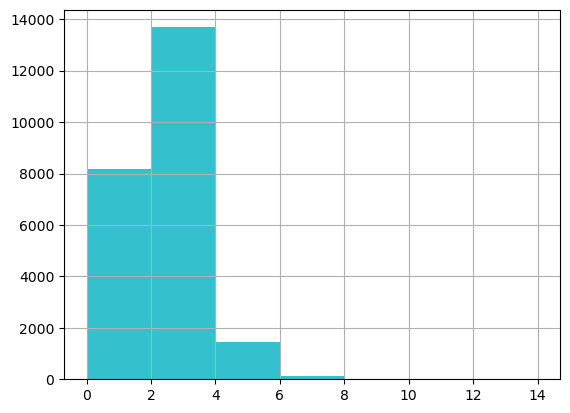

In [46]:
data['rooms'].hist(bins  = 7, color = '#35c0cd');

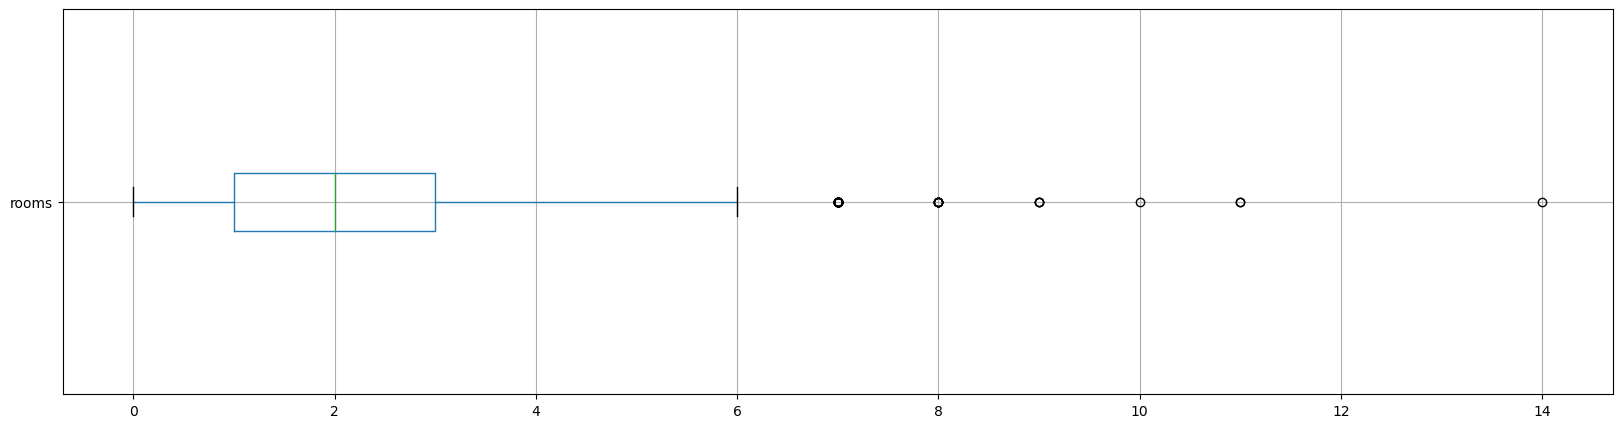

In [47]:
data.boxplot(column=['rooms'], vert=False, figsize =(20, 5));

Посмотрим, сколько многокомнатных квартир в нашем датафрейме.

In [48]:
len(data[data['rooms'] >= 7])

50

50 строк. Можно удалять. Затем построим графики снова.

In [49]:
# check
data.shape[0]

23442

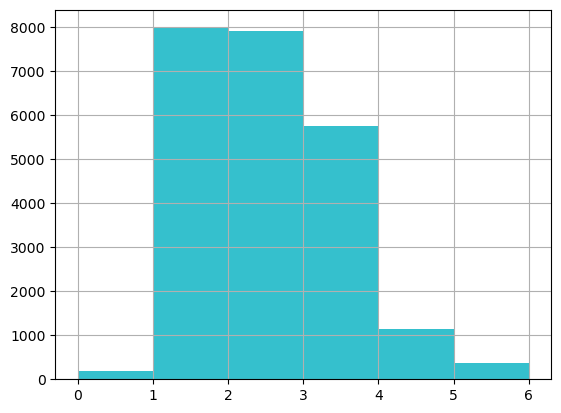

In [50]:
data = data[data.rooms < 7]
data['rooms'].hist(bins  = 6, color = '#35c0cd');

In [51]:
# check
data.shape[0]

23392

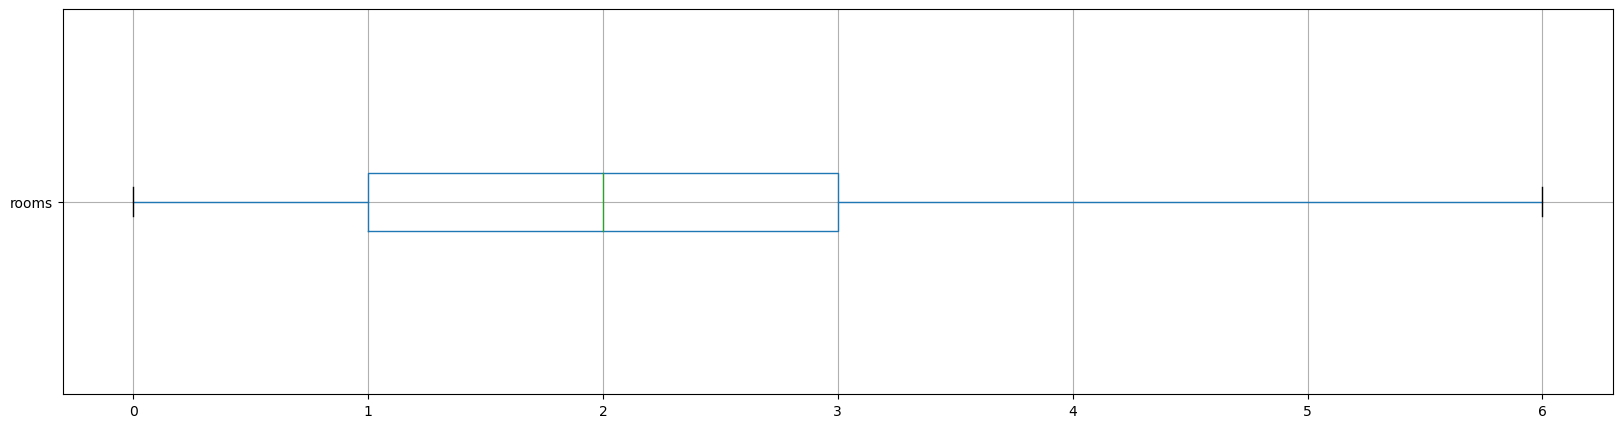

In [52]:
data.boxplot(column=['rooms'], vert=False, figsize =(20, 5));

И выбросов нет.

#### Столбец floors_total

Столбец содержит информацию о количестве этажей в доме. Посмотрим, остались ли пропущенные значения на данном этапе.

In [53]:
data.floors_total.isna().sum()

85

In [54]:
data['floors_total'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
   27,   28,   29,   33,   34,   35,   36,   37,   52,   60, <NA>]
Length: 37, dtype: Int64

Пропущено 0,36% значений. Возможно, там, где не указано количество этажей - это одноэтажные дома. Заменим пропущенные значения на 1. Выведем уникальные значения.

In [55]:
data['floors_total'] = data['floors_total'].fillna(1)

In [56]:
data['floors_total'].sort_values().unique()

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 52, 60]
Length: 36, dtype: Int64

Построим гистограмму и диаграмму размаха.

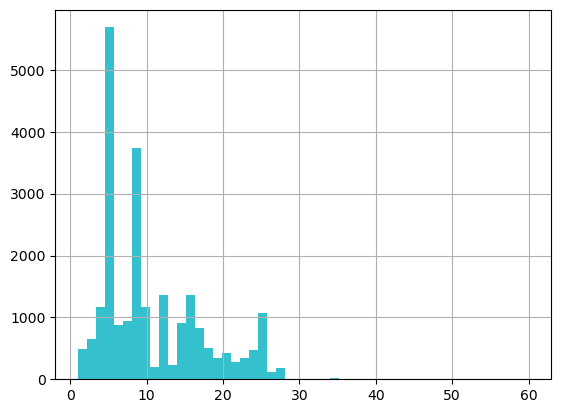

In [57]:
data['floors_total'].hist(bins  = 50, color = '#35c0cd');

In [58]:
data[['floors_total']].describe()

floors_total
count       23392.0
mean      10.686731
std        6.620871
min             1.0
25%             5.0
50%             9.0
75%            16.0
max            60.0

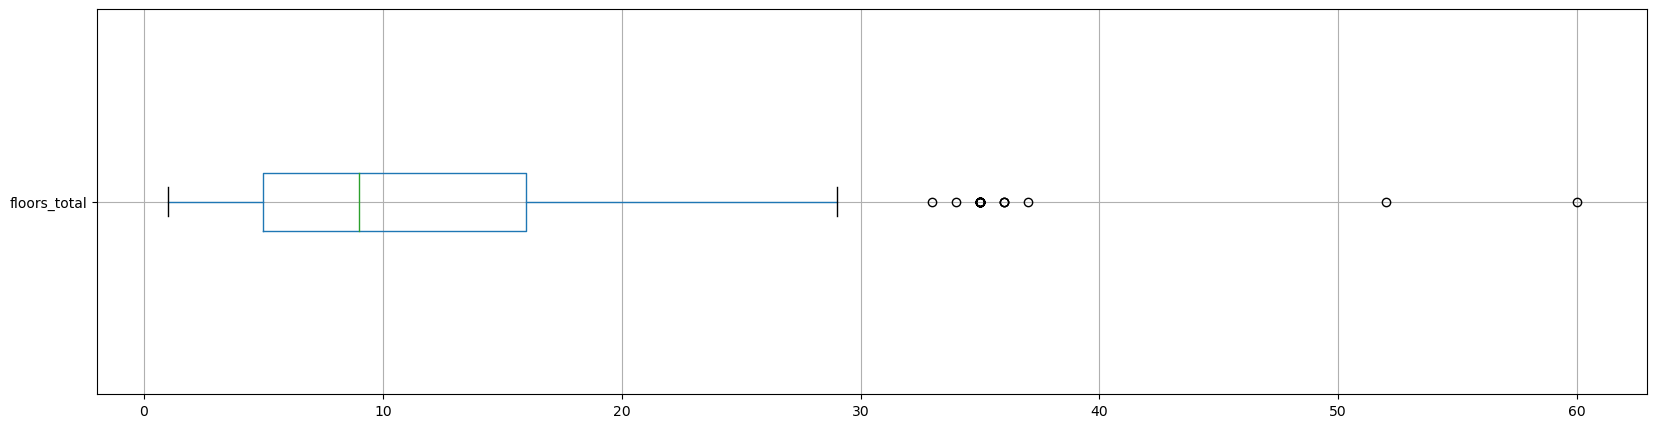

In [59]:
data.boxplot(column=['floors_total'], vert=False, figsize =(20, 5));

Самый высокий жилой дом в Санкт-Петербурге имеет 37 этажей. Получается, что всё, что выше - ошибка. А, судя по диаграмме размаха, квартир в домах, где больше 30 этажей не много. Посмотрим, сколько строк со значениями больше 30 и по возможности удалим их.

In [60]:
# check
data.shape[0]

23392

In [61]:
len(data[data['floors_total'] > 30])

32

In [62]:
data = data[data.floors_total <= 30]

In [63]:
# check
data.shape[0]

23360

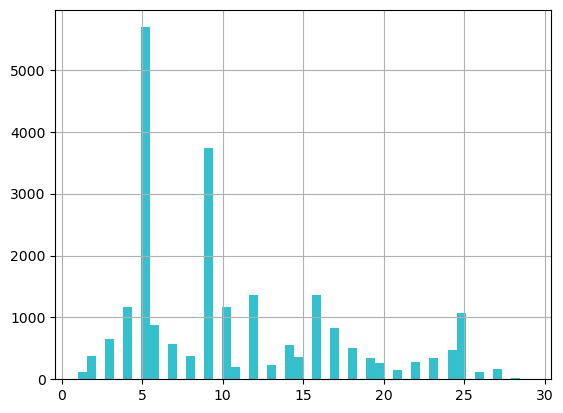

In [64]:
data['floors_total'].hist(bins  = 50, color = '#35c0cd');

In [65]:
data[['floors_total']].describe()

floors_total
count       23360.0
mean      10.651541
std        6.553907
min             1.0
25%             5.0
50%             9.0
75%            16.0
max            29.0

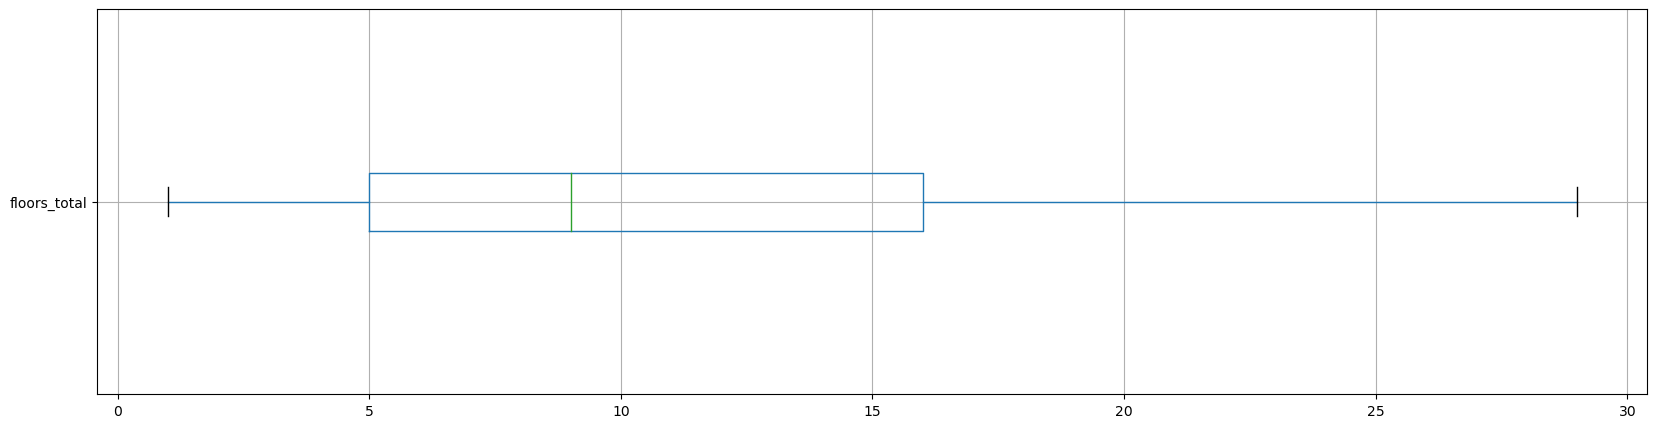

In [66]:
data.boxplot(column=['floors_total'], vert=False, figsize =(20, 5));

#### Столбец living_area

Столбец содержит информацию о жилой площади в кв.м. Проверим, остались ли пропущенные значения.

In [67]:
data.living_area.isna().sum()

1858

In [68]:
data.shape[0]

23360

Выведем уникальные значения столбца living_area.

In [69]:
data['living_area'].sort_values().unique()

array([  2.,   3.,   5., ..., 175., 184.,  nan])

Есть сомнительные значения: вряд ли кто-то продаёт квартиру с жилой площадью 2 кв.м. Посмотрим, сколько таких значений.

In [70]:
len(data[data['living_area'] < 10])

23

Это 0,1 %. Удалим строки, жилая площадь которых меньше 10 кв.м (малогабаритные квартиры жилой площадью 10 кв.м в Санкт-Петербурге встречаются) и, ещё раз выведем уникальные значения, чтобы проверить результат.

##### check nan

In [71]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23360 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23360 non-null  int64         
 1   last_price            23360 non-null  float64       
 2   total_area            23360 non-null  float64       
 3   first_day_exposition  23360 non-null  datetime64[ns]
 4   rooms                 23360 non-null  int64         
 5   ceiling_height        14295 non-null  float64       
 6   floors_total          23360 non-null  Int64         
 7   living_area           21502 non-null  float64       
 8   floor                 23360 non-null  int64         
 9   is_apartment          23360 non-null  bool          
 10  studio                23360 non-null  bool          
 11  open_plan             23360 non-null  bool          
 12  kitchen_area          21146 non-null  float64       
 13  balcony              

In [72]:
data = data.query('living_area >= 10 | living_area.isnull()')
data['living_area'].sort_values().unique()

array([ 10.  ,  10.08,  10.3 , ..., 175.  , 184.  ,    nan])

In [73]:
# check
data.shape[0]

23337

   Займёмся пропусками. Проверим, есть ли зависимость между значениями общей площади и значениями жилой площади.

0.9276491872710063

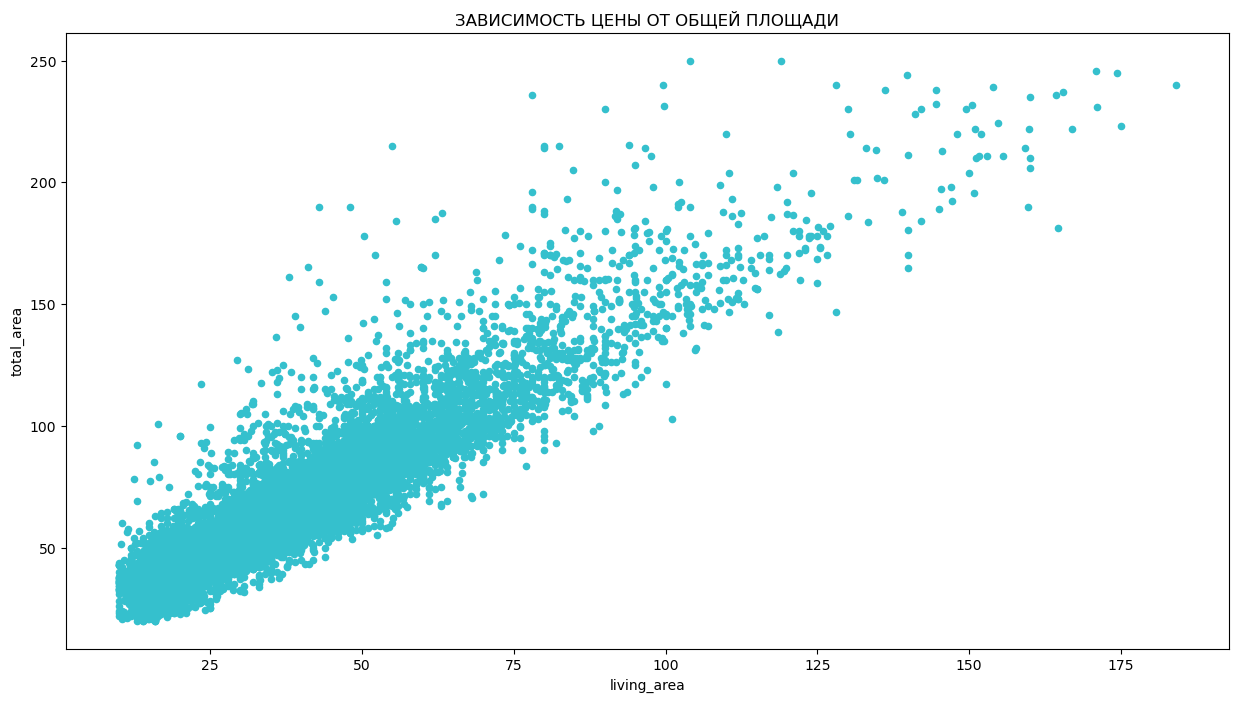

In [74]:
display(data['total_area'].corr(data['living_area']))
data.plot(
    x='living_area', 
    title='ЗАВИСИМОСТЬ ЦЕНЫ ОТ ОБЩЕЙ ПЛОЩАДИ', 
    y='total_area', 
    kind='scatter', 
    figsize = (15,8), 
    color = '#35c0cd'
        );

Как и ожидалось: чем больше общая площадь, тем больше жилая. Корреляция сильная. Тогда можно посчитать, какой процент в среднем составляет жилая площадь от общей.

In [75]:
data['perc_area'] = data['living_area']/data['total_area']*100 #кол-во процентов living_area от всей площади
round(data['perc_area'].median()) #медианное значение процента

57

В медианном значении жилая площадь от общей площади составляет 57%. 

In [76]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * data['perc_area'].median()/100)

In [77]:
data.living_area.isna().sum()

0

Пропусков не осталось. На всякий случай проверим, не выбиваются ли значения, на которые мы заменили NaN из общей массы.

0.932865610588111

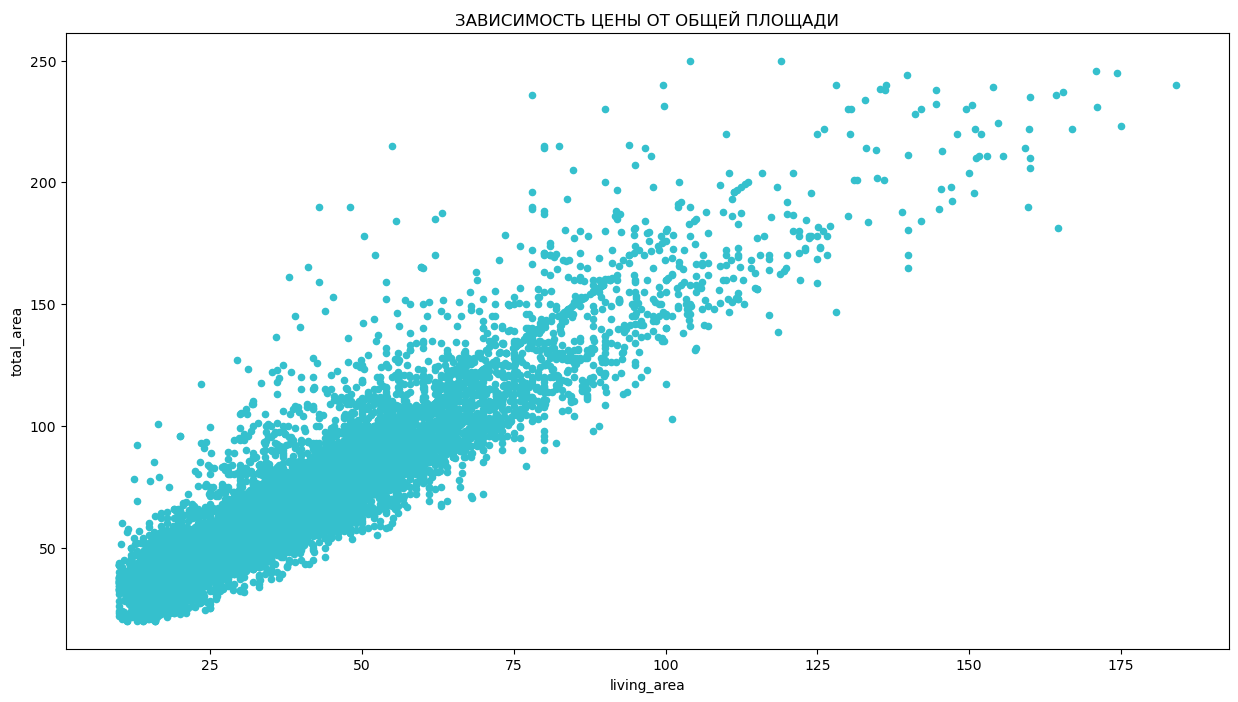

In [78]:
display(data['total_area'].corr(data['living_area']))
data.plot(
    x='living_area', 
    title='ЗАВИСИМОСТЬ ЦЕНЫ ОТ ОБЩЕЙ ПЛОЩАДИ', 
    y='total_area', 
    kind='scatter', 
    figsize = (15,8), 
    color = '#35c0cd'
        );

Всё в порядке. Посмотрим на выбросы и на количество строк с выбросами.

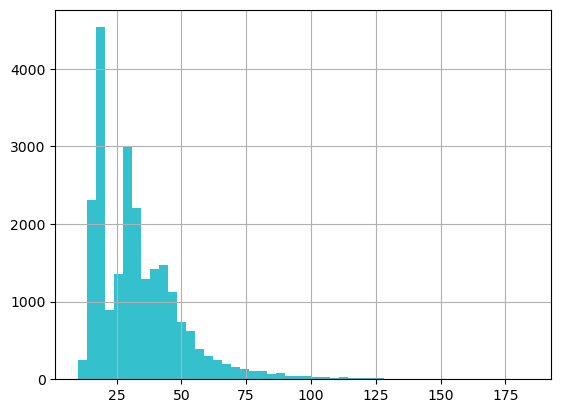

In [79]:
data['living_area'].hist(bins  = 50, color = '#35c0cd');

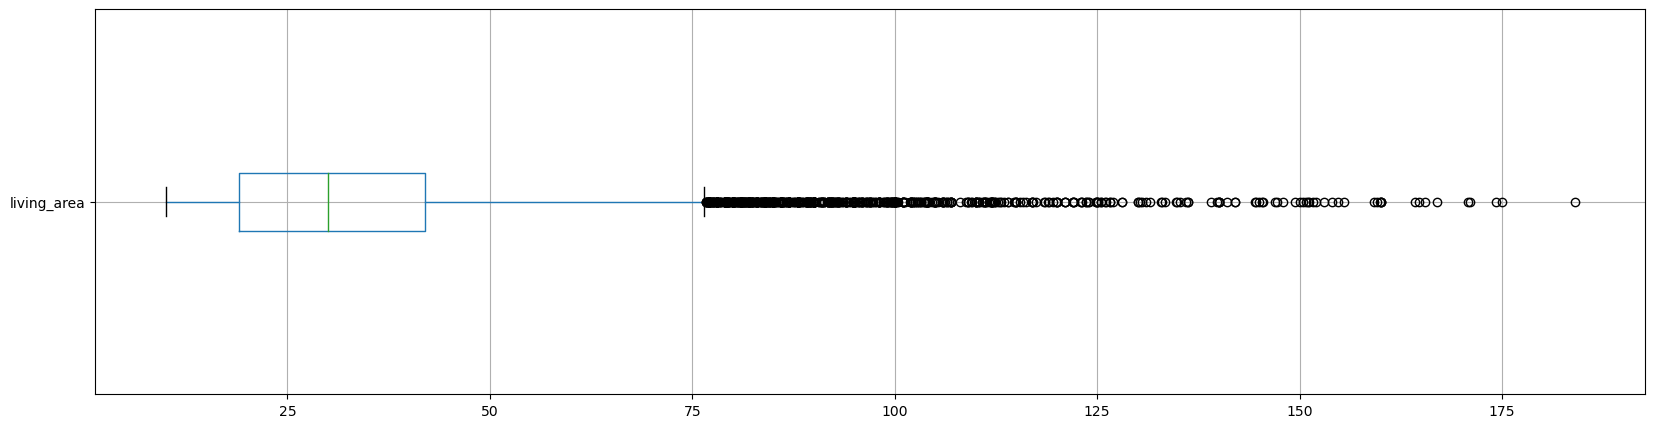

In [80]:
data.boxplot(column=['living_area'], vert=False, figsize =(20, 5));

In [81]:
len(data[data['living_area'] > 120])

87

Удалим 87 строк с выбросами и повторно выведем графики.

In [82]:
# check
data.shape[0]

23337

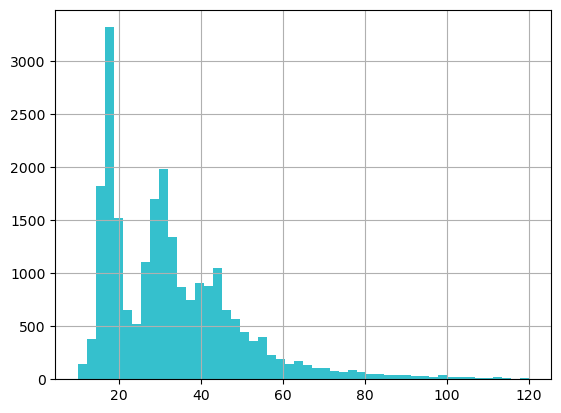

In [83]:
data = data[data.living_area <= 120]
data['living_area'].hist(bins  = 50, color = '#35c0cd');

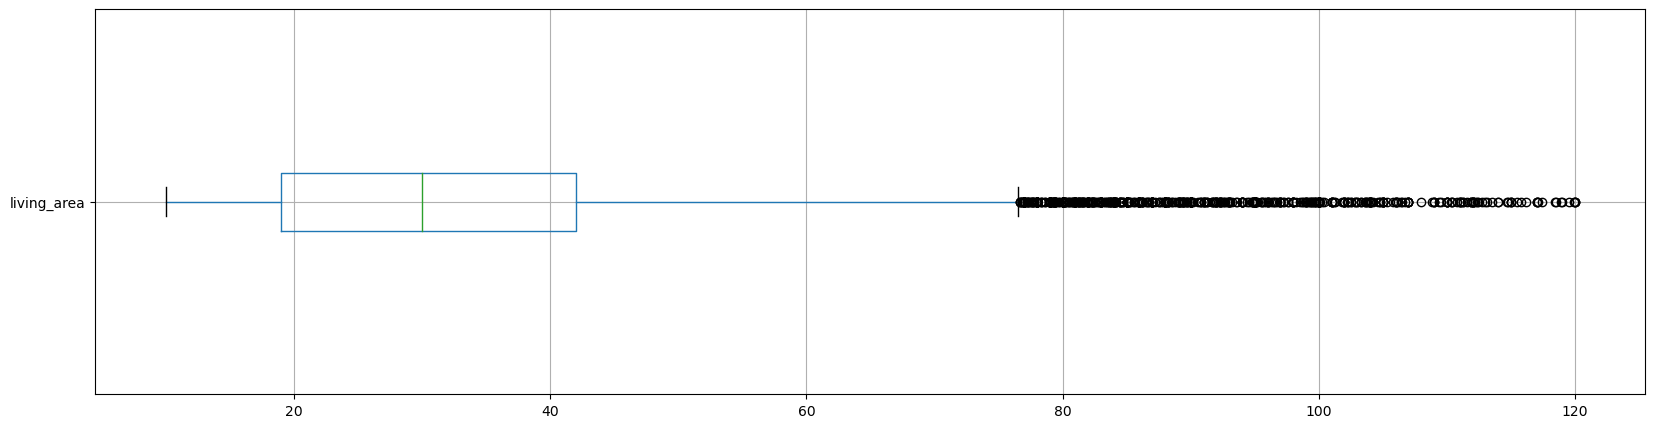

In [84]:
data.boxplot(column=['living_area'], vert=False, figsize =(20, 5));

In [85]:
# check
data.shape[0]

23250

#### Столбец floor

Столбец содержит информацию об этаже, на котором находится квартира. Пропущенных значений нет. Выведем уникальные значения.

In [86]:
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

Посмотрим гистограмму и диаграмму размаха.

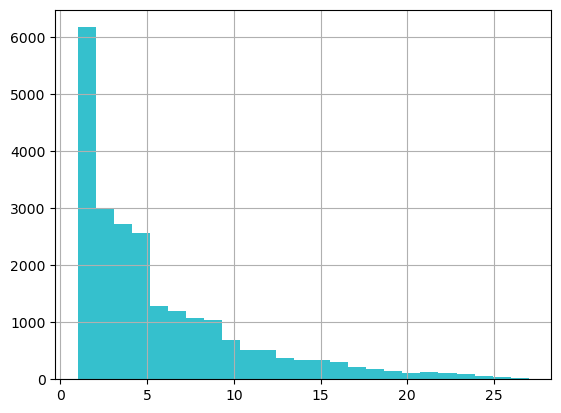

In [87]:
data['floor'].hist(bins  = 25, color = '#35c0cd');

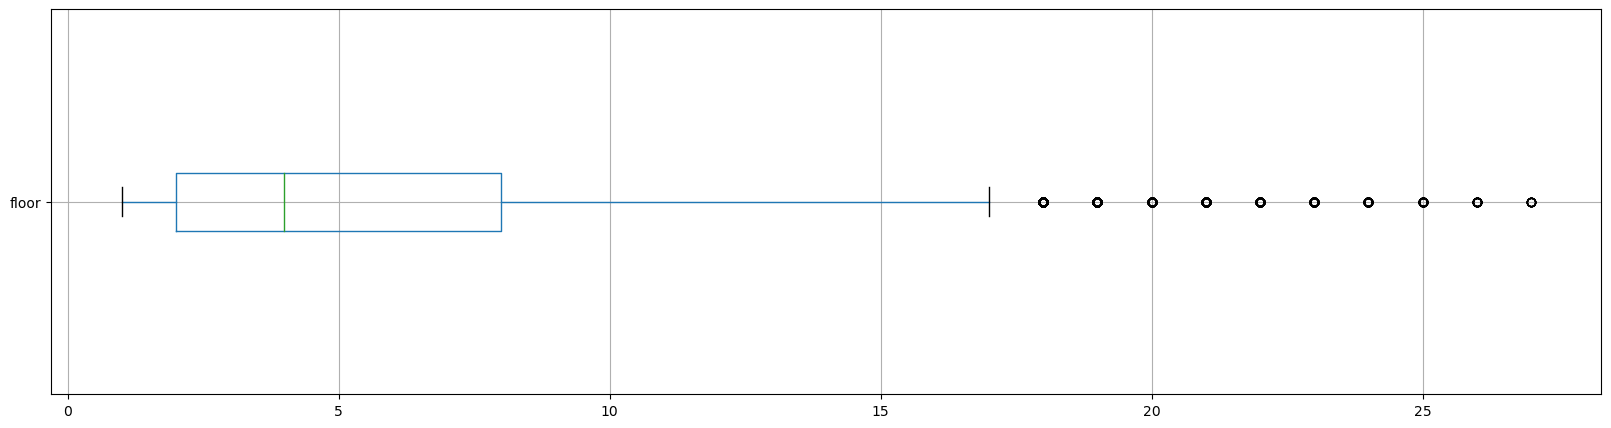

In [88]:
data.boxplot(column=['floor'], vert=False, figsize =(20, 5));

Несмотря на то, что есть выбросы, данные пока трогать не будем, т.к. в дальнейшем они будут делиться на категории.

#### Столбцы is_apartment, studio, open_plan

Столбцы: апартаменты, квартира-студия, свободная планировка. 

Когда мы поменяли тип данных в столбце  is_apartment, все пропущенные значения заменились на False. Проверим это.

In [89]:
data['is_apartment'].sort_values().unique()

array([False,  True])

Исходя из того, что, если в строке не апартаменты, то скорее всего её никто не заполнял, такой результат устраивает. 

Столбцы Studio и Open_plan без пропусков. Значение имеют булев тип данных. Обрабатывать данные не будем, просто убедимся в этом.

In [90]:
data['studio'].sort_values().unique()

array([False,  True])

In [91]:
data['open_plan'].sort_values().unique()

array([False,  True])

#### Столбец kitchen_area

In [92]:
data.kitchen_area.isna().sum()

2206

Много пропусков. Возможно, это квартиры-студии, где комната объединена с кухней. Тогда заменим пропущенные значения на 0.

In [93]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [94]:
data['kitchen_area'].sort_values().unique()

array([ 0.  ,  1.3 ,  2.  ,  2.3 ,  2.89,  3.  ,  3.2 ,  3.3 ,  3.4 ,
        3.5 ,  3.7 ,  3.8 ,  4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,
        4.6 ,  4.7 ,  4.8 ,  4.9 ,  5.  ,  5.04,  5.06,  5.1 ,  5.14,
        5.2 ,  5.21,  5.23,  5.25,  5.28,  5.29,  5.3 ,  5.31,  5.33,
        5.35,  5.4 ,  5.42,  5.44,  5.47,  5.49,  5.5 ,  5.53,  5.59,
        5.6 ,  5.61,  5.62,  5.64,  5.65,  5.68,  5.7 ,  5.74,  5.75,
        5.78,  5.8 ,  5.82,  5.85,  5.86,  5.9 ,  5.91,  6.  ,  6.02,
        6.03,  6.1 ,  6.16,  6.19,  6.2 ,  6.22,  6.23,  6.24,  6.25,
        6.26,  6.27,  6.28,  6.3 ,  6.31,  6.33,  6.35,  6.36,  6.37,
        6.4 ,  6.47,  6.5 ,  6.55,  6.58,  6.6 ,  6.61,  6.62,  6.65,
        6.7 ,  6.72,  6.73,  6.76,  6.77,  6.8 ,  6.82,  6.83,  6.84,
        6.86,  6.9 ,  6.91,  6.93,  6.95,  7.  ,  7.02,  7.03,  7.06,
        7.09,  7.1 ,  7.12,  7.15,  7.17,  7.18,  7.19,  7.2 ,  7.3 ,
        7.36,  7.4 ,  7.41,  7.48,  7.5 ,  7.54,  7.6 ,  7.63,  7.65,
        7.7 ,  7.71,

Посмотрим, сколько значений меньше 4 кв.м., но больше 0.

In [95]:
len(data[(data['kitchen_area'] < 4) & (data['kitchen_area'] !=0)])

25

Удалим эти строки и ещё раз выведем уникальные значения, чтобы проверить результат.

##### check nan

In [96]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23250 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23250 non-null  int64         
 1   last_price            23250 non-null  float64       
 2   total_area            23250 non-null  float64       
 3   first_day_exposition  23250 non-null  datetime64[ns]
 4   rooms                 23250 non-null  int64         
 5   ceiling_height        14217 non-null  float64       
 6   floors_total          23250 non-null  Int64         
 7   living_area           23250 non-null  float64       
 8   floor                 23250 non-null  int64         
 9   is_apartment          23250 non-null  bool          
 10  studio                23250 non-null  bool          
 11  open_plan             23250 non-null  bool          
 12  kitchen_area          23250 non-null  float64       
 13  balcony              

In [97]:
data = data[(data.kitchen_area >= 4) | (data['kitchen_area'] == 0)]

In [98]:
data['kitchen_area'].sort_values().unique()

array([ 0.  ,  4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,  4.6 ,  4.7 ,
        4.8 ,  4.9 ,  5.  ,  5.04,  5.06,  5.1 ,  5.14,  5.2 ,  5.21,
        5.23,  5.25,  5.28,  5.29,  5.3 ,  5.31,  5.33,  5.35,  5.4 ,
        5.42,  5.44,  5.47,  5.49,  5.5 ,  5.53,  5.59,  5.6 ,  5.61,
        5.62,  5.64,  5.65,  5.68,  5.7 ,  5.74,  5.75,  5.78,  5.8 ,
        5.82,  5.85,  5.86,  5.9 ,  5.91,  6.  ,  6.02,  6.03,  6.1 ,
        6.16,  6.19,  6.2 ,  6.22,  6.23,  6.24,  6.25,  6.26,  6.27,
        6.28,  6.3 ,  6.31,  6.33,  6.35,  6.36,  6.37,  6.4 ,  6.47,
        6.5 ,  6.55,  6.58,  6.6 ,  6.61,  6.62,  6.65,  6.7 ,  6.72,
        6.73,  6.76,  6.77,  6.8 ,  6.82,  6.83,  6.84,  6.86,  6.9 ,
        6.91,  6.93,  6.95,  7.  ,  7.02,  7.03,  7.06,  7.09,  7.1 ,
        7.12,  7.15,  7.17,  7.18,  7.19,  7.2 ,  7.3 ,  7.36,  7.4 ,
        7.41,  7.48,  7.5 ,  7.54,  7.6 ,  7.63,  7.65,  7.7 ,  7.71,
        7.78,  7.8 ,  7.84,  7.85,  7.86,  7.87,  7.89,  7.9 ,  7.92,
        7.94,  7.95,

In [99]:
# check
data.shape[0]

23225

Посмотрим, остались ли пропущенные значения.

In [100]:
data.kitchen_area.isna().sum()

0

Пропущенных значений нет. Заменять нечего. Построим гистограмму и диаграмму размаха, чтобы посмотреть выбросы.

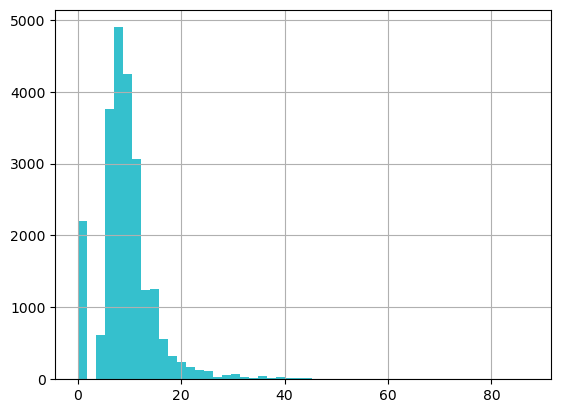

In [101]:
data['kitchen_area'].hist(bins  = 50, color = '#35c0cd');

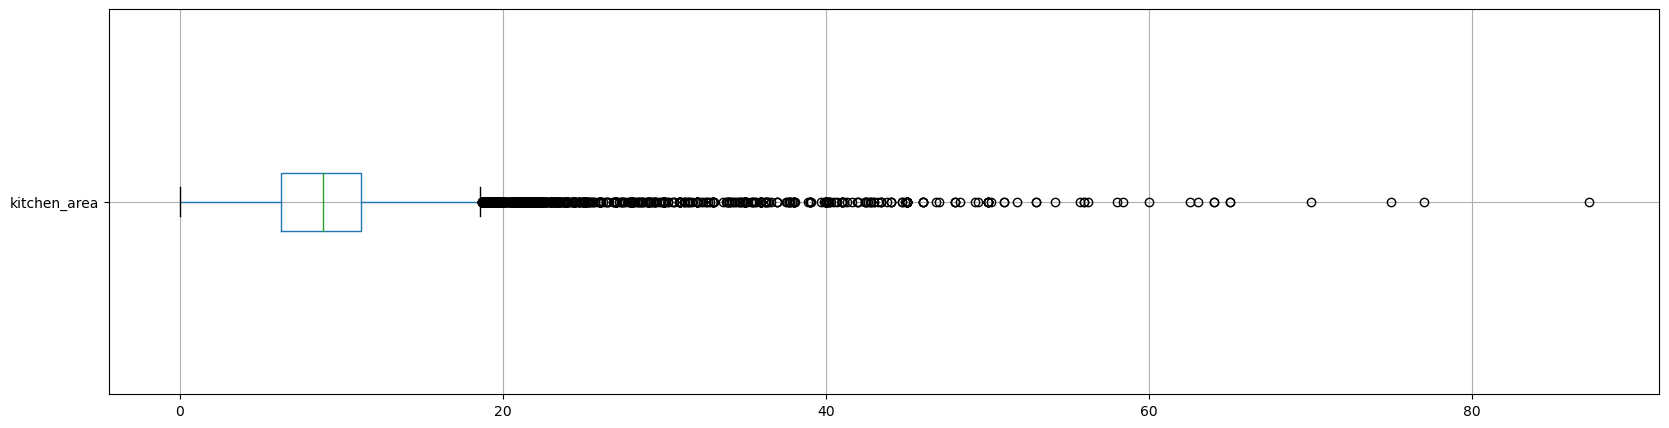

In [102]:
data.boxplot(column=['kitchen_area'], vert=False, figsize =(20, 5));

Посмотрим, сколько кухонь площадью больше 38 кв.м в датафрейме.

In [103]:
len(data[data['kitchen_area'] > 38])

119

Удалим выбросы и снова посмотрим на гистограмму и диаграмму размаха.

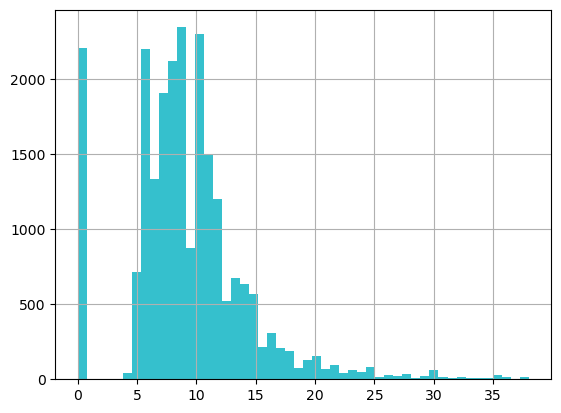

In [104]:
data = data[data.kitchen_area <= 38]
data['kitchen_area'].hist(bins  = 50, color = '#35c0cd');

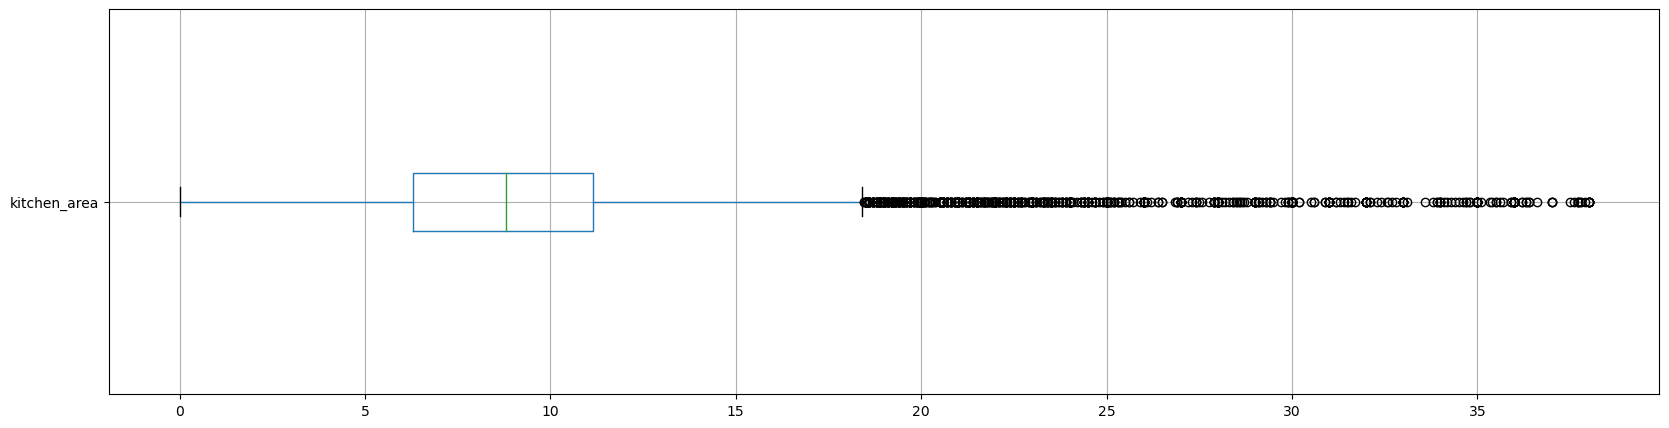

In [105]:
data.boxplot(column=['kitchen_area'], vert=False, figsize =(20, 5));

In [106]:
# check
data.shape[0]

23106

#### Столбцы balcony, parks_around_3000, ponds_around_3000

Столбцы содержат информацию о количестве балконов, числе парков в радиусе 3 км, числе водоёмов в радиусе 3 км.
Выведем уникальные значения каждого столбца.

In [107]:
data['balcony'].sort_values().unique()

<IntegerArray>
[0, 1, 2, 3, 4, 5, <NA>]
Length: 7, dtype: Int64

In [108]:
data['parks_around_3000'].sort_values().unique()

<IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64

In [109]:
data['ponds_around_3000'].sort_values().unique()

<IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64

Есть пропущенные значения. Возможно, ячейки в данных столбцах не заполнили, потому что:
* нет балкона
* нет парка в радиусе 3 км
* нет водоёма в радиусе 3 км

Тогда заменим пропущенные значения на 0. Проверим, что пропущенных значений не осталось.

In [110]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

In [111]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8990
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              47
airports_nearest         5481
city_centers_nearest     5461
parks_around_3000           0
parks_nearest           15345
ponds_around_3000           0
ponds_nearest           14361
days_exposition          3042
perc_area                1841
dtype: int64

#### Столбец locality_name

Столбец содержит информацию о населённом пункте, в котором находится объект. Проверим оставшиеся пропущенные значения.

In [112]:
data.locality_name.isna().sum()

47

 Пропущено 0,2 % от всех данных. Заполнить пропущенные значения мы не сможем, поэтому удалим строки и проверим результат.

In [113]:
data.dropna(subset=['locality_name'], inplace=True)

In [114]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8957
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5473
city_centers_nearest     5453
parks_around_3000           0
parks_nearest           15313
ponds_around_3000           0
ponds_nearest           14338
days_exposition          3041
perc_area                1837
dtype: int64

#### Столбцы airports_nearest, city_сenters_nearest, ponds_nearest, parks_nearest

Столбцы расстояние до ближайшего аэропорта, расстояние до центра города, расстояние до ближайшего водоёма, расстояние до ближайшего парка содержат на данный момент следующий процент пропусков:
*  airports_nearest - 19,5%
* city_сenters_nearest - 19,5%
* ponds_nearest - 52,3%
* parks_nearest - 56%

Так как данные заполнялись автоматически, возможно пропуски связаны с техническим сбоем. 

Изучим распределение пропусков по городам для столбца airports_nearest. Для этого найдём общее количество строк, а затем количество строк с пропущенными значениями. Сделаем это для каждого населённого пункта.

In [115]:
data.groupby(['locality_name']).size().to_dict()

{'Бокситогорск': 16,
 'Волосово': 36,
 'Волхов': 111,
 'Всеволожск': 398,
 'Выборг': 230,
 'Высоцк': 3,
 'Гатчина': 306,
 'Зеленогорск': 24,
 'Ивангород': 28,
 'Каменногорск': 13,
 'Кингисепп': 102,
 'Кириши': 122,
 'Кировск': 83,
 'Колпино': 337,
 'Коммунар': 88,
 'Красное Село': 176,
 'Кронштадт': 95,
 'Кудрово': 470,
 'Лодейное Поле': 20,
 'Ломоносов': 133,
 'Луга': 56,
 'Любань': 8,
 'Мурино': 583,
 'Никольское': 91,
 'Новая Ладога': 14,
 'Отрадное': 79,
 'Павловск': 38,
 'Петергоф': 201,
 'Пикалево': 18,
 'Подпорожье': 19,
 'Приморск': 8,
 'Приозерск': 66,
 'Пушкин': 359,
 'Санкт-Петербург': 15206,
 'Светогорск': 11,
 'Сертолово': 140,
 'Сестрорецк': 181,
 'Сланцы': 110,
 'Сосновый Бор': 85,
 'Сясьстрой': 23,
 'Тихвин': 47,
 'Тосно': 102,
 'Шлиссельбург': 57,
 'деревня Агалатово': 4,
 'деревня Аро': 3,
 'деревня Батово': 9,
 'деревня Бегуницы': 16,
 'деревня Белогорка': 11,
 'деревня Большая Вруда': 4,
 'деревня Большая Пустомержа': 1,
 'деревня Большие Колпаны': 16,
 'деревня Бол

In [116]:
missing_airports = data[data['airports_nearest'].isnull()]
missing_airports.groupby(['locality_name']) ['airports_nearest'].size().to_dict()

{'Бокситогорск': 16,
 'Волосово': 36,
 'Волхов': 111,
 'Всеволожск': 398,
 'Выборг': 230,
 'Высоцк': 3,
 'Гатчина': 306,
 'Ивангород': 28,
 'Каменногорск': 13,
 'Кингисепп': 102,
 'Кириши': 122,
 'Кировск': 83,
 'Колпино': 1,
 'Коммунар': 88,
 'Красное Село': 2,
 'Кронштадт': 1,
 'Кудрово': 470,
 'Лодейное Поле': 20,
 'Ломоносов': 1,
 'Луга': 56,
 'Любань': 8,
 'Мурино': 581,
 'Никольское': 91,
 'Новая Ладога': 14,
 'Отрадное': 79,
 'Пикалево': 18,
 'Подпорожье': 19,
 'Приморск': 8,
 'Приозерск': 66,
 'Санкт-Петербург': 78,
 'Светогорск': 11,
 'Сертолово': 140,
 'Сланцы': 110,
 'Сосновый Бор': 85,
 'Сясьстрой': 23,
 'Тихвин': 47,
 'Тосно': 102,
 'Шлиссельбург': 57,
 'деревня Агалатово': 4,
 'деревня Аро': 3,
 'деревня Батово': 9,
 'деревня Бегуницы': 16,
 'деревня Белогорка': 11,
 'деревня Большая Вруда': 4,
 'деревня Большая Пустомержа': 1,
 'деревня Большие Колпаны': 16,
 'деревня Большое Рейзино': 1,
 'деревня Большой Сабск': 1,
 'деревня Бор': 1,
 'деревня Борисова Грива': 1,
 'дер

Замечено, что по многим населённым пунктам значений нет вообще. Это значит, что мы можем их заменить только общей медианой. В таком случае лучше данные пропуски не трогать, т.к. иначе результат получится отдалённым от реальности, что в дальнейшем повлияет на результаты исследования.

Тоже самое проделаем для столбцов city_сenters_nearest, ponds_nearest, parks_nearest.

**city_сenters_nearest**

In [117]:
missing_centers = data[data['city_centers_nearest'].isnull()]
missing_centers.groupby(['locality_name']) ['city_centers_nearest'].size().to_dict()

{'Бокситогорск': 16,
 'Волосово': 36,
 'Волхов': 111,
 'Всеволожск': 398,
 'Выборг': 230,
 'Высоцк': 3,
 'Гатчина': 306,
 'Ивангород': 28,
 'Каменногорск': 13,
 'Кингисепп': 102,
 'Кириши': 122,
 'Кировск': 83,
 'Колпино': 1,
 'Коммунар': 88,
 'Красное Село': 2,
 'Кронштадт': 1,
 'Кудрово': 470,
 'Лодейное Поле': 20,
 'Ломоносов': 1,
 'Луга': 56,
 'Любань': 8,
 'Мурино': 581,
 'Никольское': 91,
 'Новая Ладога': 14,
 'Отрадное': 79,
 'Пикалево': 18,
 'Подпорожье': 19,
 'Приморск': 8,
 'Приозерск': 66,
 'Пушкин': 1,
 'Санкт-Петербург': 57,
 'Светогорск': 11,
 'Сертолово': 140,
 'Сланцы': 110,
 'Сосновый Бор': 85,
 'Сясьстрой': 23,
 'Тихвин': 47,
 'Тосно': 102,
 'Шлиссельбург': 57,
 'деревня Агалатово': 4,
 'деревня Аро': 3,
 'деревня Батово': 9,
 'деревня Бегуницы': 16,
 'деревня Белогорка': 11,
 'деревня Большая Вруда': 4,
 'деревня Большая Пустомержа': 1,
 'деревня Большие Колпаны': 16,
 'деревня Большое Рейзино': 1,
 'деревня Большой Сабск': 1,
 'деревня Бор': 1,
 'деревня Борисова Гр

Тоже самое, по многим населённым пунктам значений нет. В дальнейшем мы будем определять какова зависимость стоимости объектов от расстояния до центра Санкт-Петербурга. Поэтому проверим, сколько пропущенных значений в столбце city_centers_nearest по Санкт-Петербургу.

In [118]:
data[data['locality_name'] == 'Санкт-Петербург'] ['city_centers_nearest'].isnull().sum()

57

Из 13834 записей с неселённым пунктом "Санкт-Петербург" в столбце city_centers_nearest пропущено только 57 значений. Для Санкт-Петербурга найдём медиану и заменим полученным значением пропуски. Остальные же пропущенные значения оставим без изменений.

In [119]:
spb_centers_nearest = round(data[data['locality_name'] == 'Санкт-Петербург'] ['city_centers_nearest'].median()) 
spb_centers_nearest

12342

In [120]:
data['city_centers_nearest'] = round(data[data['locality_name'] == 'Санкт-Петербург'] ['city_centers_nearest'] \
.fillna(data[data['locality_name'] == 'Санкт-Петербург'] ['city_centers_nearest'].median()))

In [121]:
data[data['locality_name'] == 'Санкт-Петербург'] ['city_centers_nearest'].isnull().sum()

0

**ponds_nearest**

In [122]:
missing_ponds = data[data['ponds_nearest'].isnull()]
missing_ponds.groupby(['locality_name']) ['ponds_nearest'].size().to_dict()

{'Бокситогорск': 16,
 'Волосово': 36,
 'Волхов': 111,
 'Всеволожск': 398,
 'Выборг': 230,
 'Высоцк': 3,
 'Гатчина': 306,
 'Зеленогорск': 6,
 'Ивангород': 28,
 'Каменногорск': 13,
 'Кингисепп': 102,
 'Кириши': 122,
 'Кировск': 83,
 'Колпино': 148,
 'Коммунар': 88,
 'Красное Село': 166,
 'Кронштадт': 9,
 'Кудрово': 470,
 'Лодейное Поле': 20,
 'Ломоносов': 50,
 'Луга': 56,
 'Любань': 8,
 'Мурино': 581,
 'Никольское': 91,
 'Новая Ладога': 14,
 'Отрадное': 79,
 'Павловск': 4,
 'Петергоф': 84,
 'Пикалево': 18,
 'Подпорожье': 19,
 'Приморск': 8,
 'Приозерск': 66,
 'Пушкин': 188,
 'Санкт-Петербург': 7574,
 'Светогорск': 11,
 'Сертолово': 140,
 'Сестрорецк': 48,
 'Сланцы': 110,
 'Сосновый Бор': 85,
 'Сясьстрой': 23,
 'Тихвин': 47,
 'Тосно': 102,
 'Шлиссельбург': 57,
 'деревня Агалатово': 4,
 'деревня Аро': 3,
 'деревня Батово': 9,
 'деревня Бегуницы': 16,
 'деревня Белогорка': 11,
 'деревня Большая Вруда': 4,
 'деревня Большая Пустомержа': 1,
 'деревня Большие Колпаны': 16,
 'деревня Большое Ре

**parks_nearest**

In [123]:
missing_parks = data[data['parks_nearest'].isnull()]
missing_parks.groupby(['locality_name']) ['parks_nearest'].size().to_dict()

{'Бокситогорск': 16,
 'Волосово': 36,
 'Волхов': 111,
 'Всеволожск': 398,
 'Выборг': 230,
 'Высоцк': 3,
 'Гатчина': 306,
 'Зеленогорск': 8,
 'Ивангород': 28,
 'Каменногорск': 13,
 'Кингисепп': 102,
 'Кириши': 122,
 'Кировск': 83,
 'Колпино': 205,
 'Коммунар': 88,
 'Красное Село': 131,
 'Кронштадт': 9,
 'Кудрово': 470,
 'Лодейное Поле': 20,
 'Ломоносов': 117,
 'Луга': 56,
 'Любань': 8,
 'Мурино': 583,
 'Никольское': 91,
 'Новая Ладога': 14,
 'Отрадное': 79,
 'Павловск': 12,
 'Петергоф': 58,
 'Пикалево': 18,
 'Подпорожье': 19,
 'Приморск': 8,
 'Приозерск': 66,
 'Пушкин': 154,
 'Санкт-Петербург': 8230,
 'Светогорск': 11,
 'Сертолово': 140,
 'Сестрорецк': 109,
 'Сланцы': 110,
 'Сосновый Бор': 85,
 'Сясьстрой': 23,
 'Тихвин': 47,
 'Тосно': 102,
 'Шлиссельбург': 57,
 'деревня Агалатово': 4,
 'деревня Аро': 3,
 'деревня Батово': 9,
 'деревня Бегуницы': 16,
 'деревня Белогорка': 11,
 'деревня Большая Вруда': 4,
 'деревня Большая Пустомержа': 1,
 'деревня Большие Колпаны': 16,
 'деревня Большое

Для столбцов parks_nearest и ponds_nearest оставим пропуски без изменений.

#### Столбец ceiling_height

Столбец содержит информацию о высоте потолков. Изначально было пропущено 38,8%. выявлены некорректные данные. Например, высота потолков вряд ли действительно 27.0 м. Скорее всего не там поставили плавающую запятую. Кажется, стоит проверить самое максимальное и самое минимальное значение в данном столбце. 

In [124]:
data.ceiling_height.isna().sum() # обновим данные о пропущенных значениях

8957

In [125]:
data['ceiling_height'].max() # максмальная высота потолка в столбце "ceiling_height"

100.0

In [126]:
data['ceiling_height'].min() # минимальная высота потолка в столбце "ceiling_height"

1.0

Сомневаюсь, что максимальное значение превышает 10 метров (если квартира многоуровневая, то 10 метров вполне может быть). Поэтому, для слишком больших значений добавим условие: если высота потолков больше 10 м, то скорректируем значение, переставив точку на один знак влево.

In [127]:
data.loc[(data['ceiling_height'] > 10),'ceiling_height'] = data['ceiling_height'] / 10 
data['ceiling_height'].max() 

10.0

Минимальное значение тоже выглядит, как ошибка. Передвинуть точку вперёд на один знак вперёд не получится.
Самая низкая стандартная высота потолков 2,5 м. Если действительно есть что-то ниже, то таких квартир немного. Посмотрим, как много в датафрейме значений меньше 2.5

In [128]:
len(data[data['ceiling_height'] < 2.5])

76

Не смотря на то, что таких значений мало, их можно не удалять. Найдём медиану и заменим очень маленькие значения на медиану. 

In [129]:
#исключим значения меньше 2,5 чтобы найти медиану по реальным значениям
real_ceiling_height = data[data['ceiling_height'] >= 2.5] 
#найдём медиану
median_ceiling_height = real_ceiling_height['ceiling_height'].median() 
median_ceiling_height

2.65

Подставим медиану вместо значений, которые меньше 2,5.

In [130]:
data.loc[(data['ceiling_height'] < 2.5),'ceiling_height'] = median_ceiling_height #заменяем все значения ниже 2,5 на медиану
data['ceiling_height'].min() #проверка минимального значения

2.5

Высота потолков в Санкт-Петербурге и соседних населённых пунктах отличается в зависимости от типа домов и времени постройки. В современных районах высота потолков ниже, чем в исторических. С одной стороны, большая часть исторических построек расположена в центре. Таким образом можно было бы заменить пропущенные значения на медиану, в зависимости от расстояния до центра. Но, с другой стороны в других районах ситуация может складываться иначе. Также в столбце city_centers_nearest много пропущенных значений. Поэтому пропуски в столбце ceiling_height тоже оставим без изменений.

Теперь посмотрим на выбросы. Построим гистограмму и диаграмму размаха.

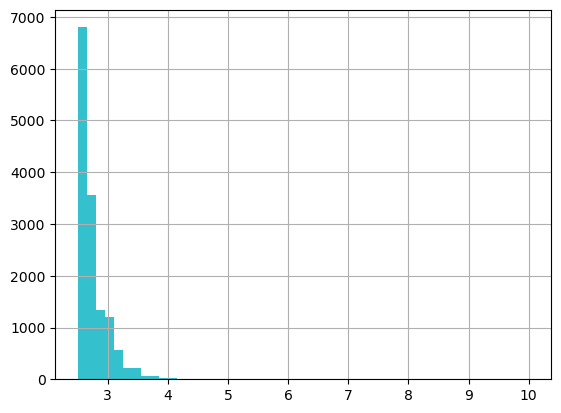

In [131]:
data['ceiling_height'].hist(bins  = 50, color = '#35c0cd');

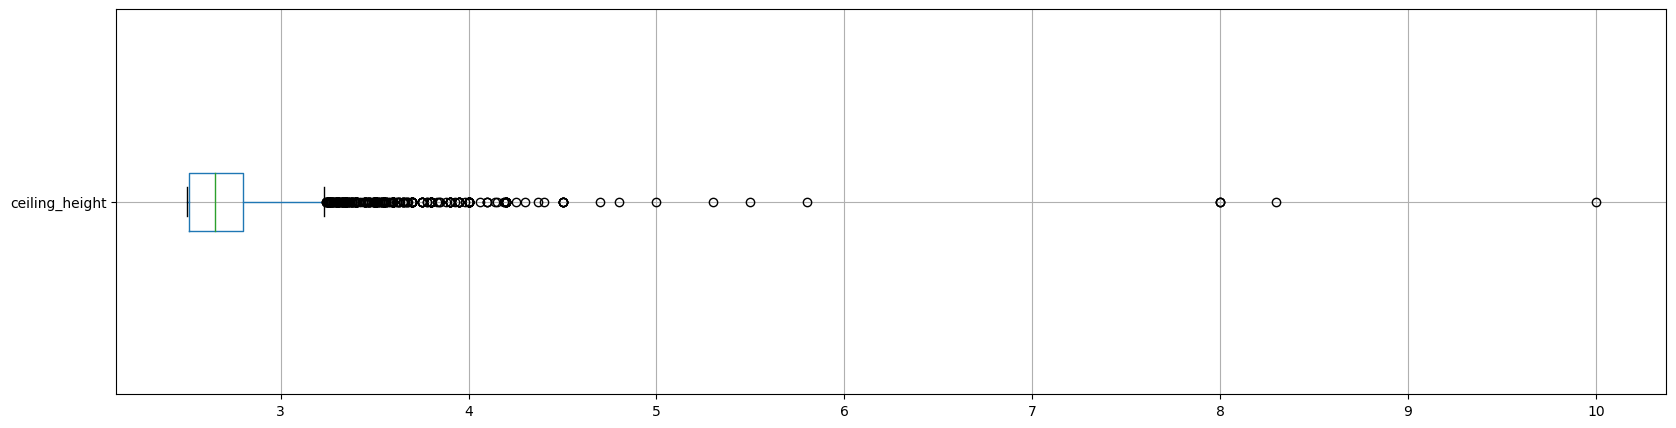

In [132]:
data.boxplot(column=['ceiling_height'], vert=False, figsize =(20, 5));

In [133]:
data['ceiling_height'].describe()

count    14102.000000
mean         2.718024
std          0.280345
min          2.500000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

Большая часть значений лежит в диапазоне от 2,6 до 2,7, что похоже на правду. Посмотрим, сколько квартир с высотой больше 4 метров в датафрейме.

In [134]:
len(data[data['ceiling_height'] > 4]) 

38

Удалим 38 строк. Повторно посмотрим на обновлённую гистограмму и диаграмму размаха.

In [135]:
# check
data.shape[0]

23059

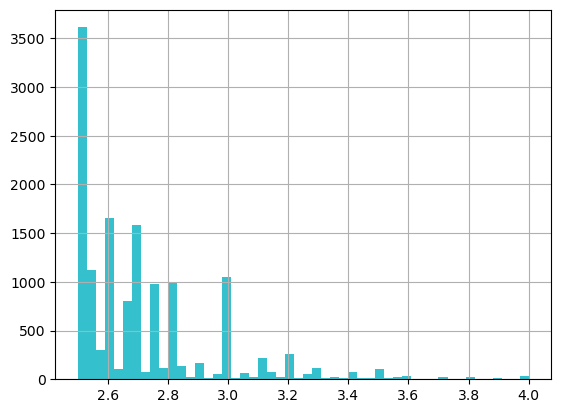

In [136]:
data = data.query('ceiling_height <= 4 | ceiling_height.isnull()')
data['ceiling_height'].hist(bins  = 50, color = '#35c0cd');

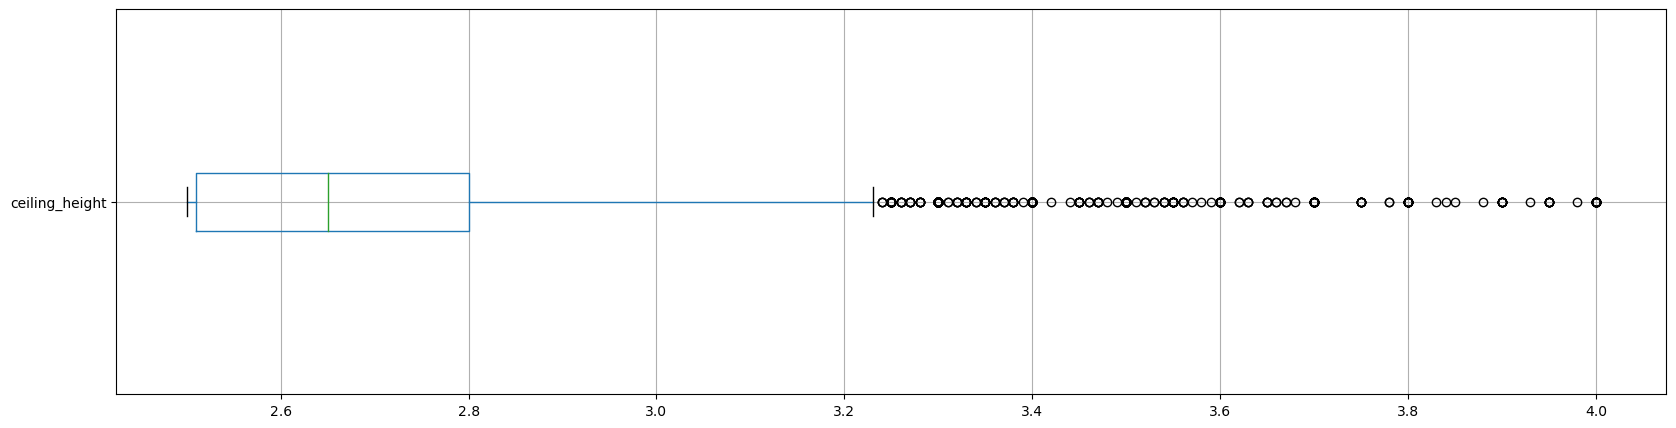

In [137]:
data.boxplot(column=['ceiling_height'], vert=False, figsize =(20, 5));

In [138]:
# check
data.shape[0]

23021

#### Столбец days_exposition

Столбец содержит информацию о том, сколько дней было размещено объявление. Сейчас в столбце 10,6% пропусков. Скорее всего, значения столбца формируются автоматически, когда объявление закрывают. Пропуски означают, что объявление ещё не закрыто, а значит квартира не продана. 

Посмотрим, какие уникальные значения встречаются в столбце.

In [139]:
data['days_exposition'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
 ...
 1484, 1485, 1489, 1497, 1512, 1513, 1553, 1572, 1580, <NA>]
Length: 1130, dtype: Int64

In [140]:
data.shape[0]

23021

Построим гистограмму и диаграмму размаха, чтобы найти выбросы.

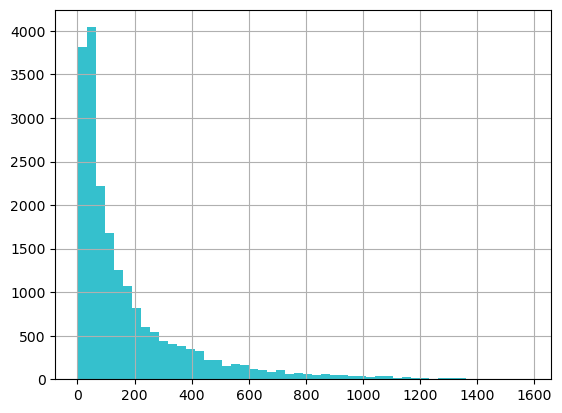

In [141]:
data['days_exposition'].hist(bins  = 50, color = '#35c0cd');

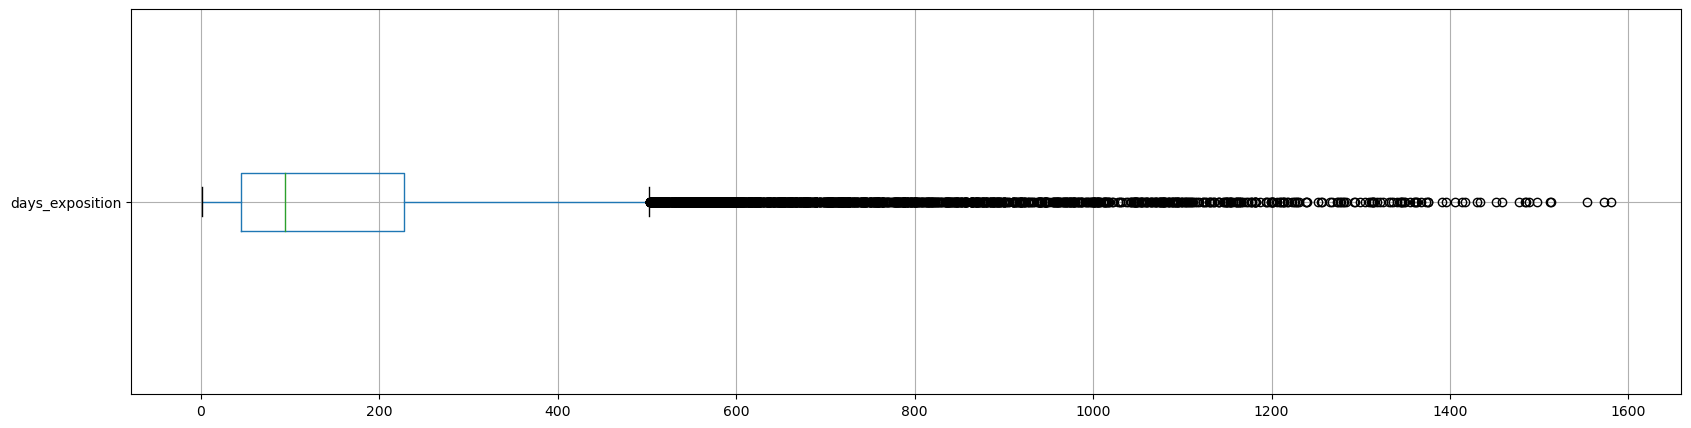

In [142]:
data.boxplot(column=['days_exposition'], vert=False, figsize =(20, 5));

In [143]:
data[['days_exposition']].describe()

days_exposition
count          19987.0
mean        178.758743
std         217.636275
min                1.0
25%               45.0
50%               94.0
75%              228.0
max             1580.0

Большая часть значений лежит между 45 и 228 днями. Очень большое стандартное отклонение гооворит о большом размахе значений(от 1 дня до 1580 дней).Посмотрим, сколько у нас значений, которые больше  1000.

In [144]:
len(data[data['days_exposition'] > 1000])

259

Также есть аномально быстрые продажи. Посмотрим, сколько значений меньше 3.

In [145]:
len(data[data['days_exposition'] < 3])

4

Это 1,1 % от всех данных. Удалим 263 строки.

C:\Users\Nadia\AppData\Local\Temp\ipykernel_27848\926062334.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data = data.query('days_exposition <= 1000 | days_exposition.isnull()')
C:\Users\Nadia\AppData\Local\Temp\ipykernel_27848\926062334.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data = data.query('days_exposition >= 3 | days_exposition.isnull()')


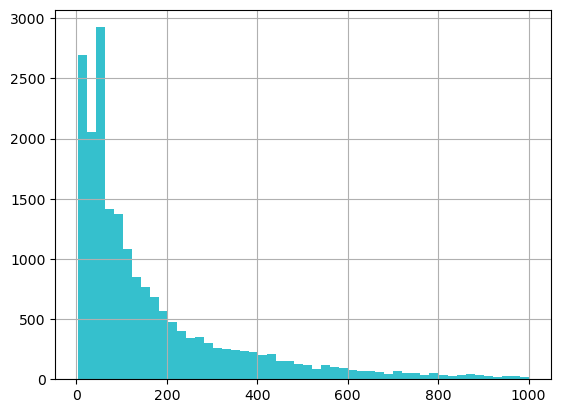

In [146]:
data = data.query('days_exposition <= 1000 | days_exposition.isnull()')
data = data.query('days_exposition >= 3 | days_exposition.isnull()')
data['days_exposition'].hist(bins  = 50, color = '#35c0cd');

In [147]:
data[['days_exposition']].describe()

days_exposition
count          19724.0
mean         165.81596
std         186.454439
min                3.0
25%               44.0
50%               92.0
75%              218.0
max             1000.0

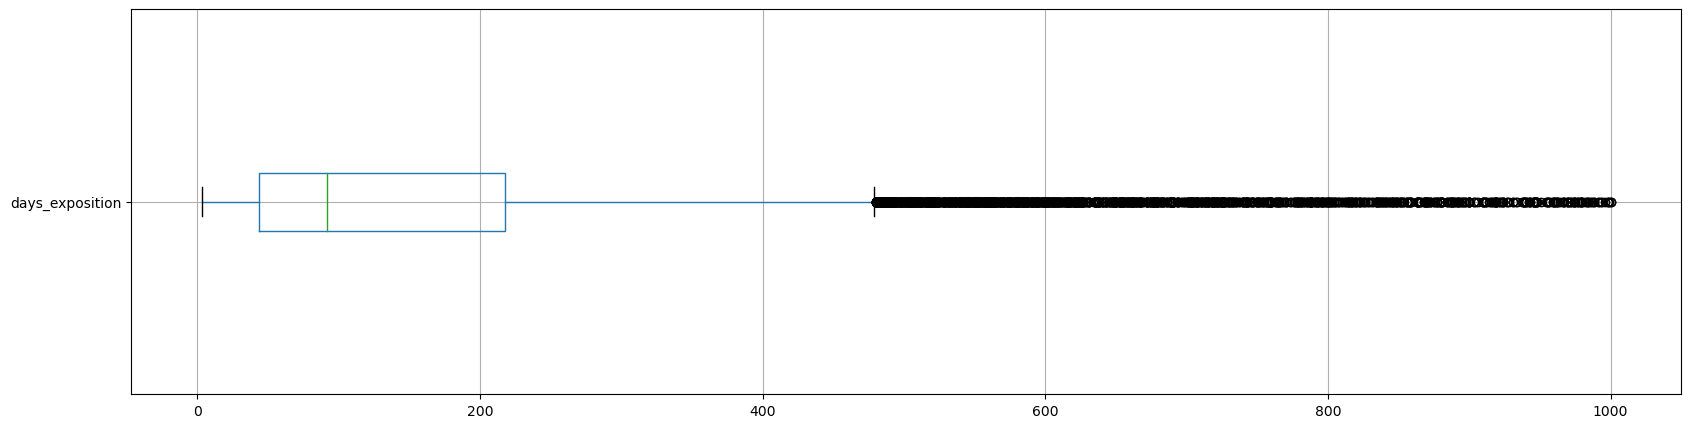

In [148]:
data.boxplot(column=['days_exposition'], vert=False, figsize =(20, 5));

In [149]:
data.shape[0]

22758

### Вывод

Была проведена работа с дубликатами. Обнаружены неявные дубликаты: один и тот же населённый пункт написан в разном формате. Такие противоречия затрудняют сортировку данных; дубликат рассматривается как новая сущность, что, в итоге, может привести к искажению результата анализа. Поэтому следующие неявные дубликаты были устранены:
* в столбце **locality_name** заменили **'ё'** на **'е'**;
* **'Поселок Мурино'** и **'посёлок Мурино'** заменили на **'Мурино'**;
* **'деревня Кудрово'** заменили на **'Кудрово'**;
* **'городской поселок'** заменили на **'поселок городского типа'**.

Далее были обнаружены явные дубликаты по совокупности параметров. Такие дубликаты увеличивают объём данных, не увеличивая их информативность и, тоже могут искажать результаты исследования. Строки с явными дубликатами были удалены. 

В данных были выявлены некорректные названия столбцов, которые были приведены к змеиному регистру. Следующие названия столбцов претерпели изменения:
* **cityCenters_nearest** на **city_centers_nearest**;
* **parks_around3000** на **parks_around_3000**;
* **ponds_around3000** на **ponds_around_3000**.

В следующих столбцах изменили тип данных:
* в **first_day_exposition** на **datetime**;
* в **floors_total, balcony, parks_around_3000, ponds_around_3000** на **int**;
* в **is_apartment** на **bool**.
Тип данных определяет, какие операции можно с ними проводить. Поэтому некорректный тип данных может помешать проводить необходимые вычисления.

Проработали пропуски, аномалии и выбросы:
* В столбце **last_price** выявлены аномально низкие значения, которые составляли 1% от всех данных. Тем не менее, было решено заменить низкие значения на медианные, в зависимости от количества комнат. 101 строка с нетипично максимальными ценами, которые была удалена. 
* В столбце **total_area** были удалены 66 строк с нетипично большой общей площадью и 27 строк с нетипично маленькой общей площадью.
* В столбце **rooms** были обнаружены редкие 7-комнатные квартиры. Удалено 50 строк.
* В столбце **floors_total** пропуски были заменены на 1 с учётом того, что, скорее всего, пропуски в строках с одноэтажными домами. Также, было замечено, что самый высокий жилой дом в Санкт-Петербурге имеет 37 этажей, а в данных высота домов доходит до 60-ти этажей. 32 строки удалили.
* В столбце **living_area** обнаружены слишком маленькие значения - удалено 23 строки. Пропуски заменены на медианное значение процента зависимости жилой площади от общей. Удалено 87 строк с выбросами.
* В столбце **kitchen_area** пропуски заменены на 0 с учётом того, что это, возможно, квартиры-студии, в которых нет отдельной кухни. Были обнаружены аномально маленькие значения. Всего 25 строк, которые были удалены. Также было удалено 119 строк с нетипично большими значениями.
* В столбцах **balcony, parks_around_3000, ponds_around_3000** были обнаружены пропущенные значения. Скорее всего, за неимением балкона в квартире, а также парка или пруда поблизости. Поэтому пропущенные значения были заменены на 0. 
* В столбце **locality_name** были обнаружены пропущенные значения. Удалено 47 строк.
* В столбцах  **airports_nearest, city_сenters_nearest, ponds_nearest, parks_nearest** много пропущенных значений. Т.к. данные значения заполнялись автоматически, похоже, что произошёл технический сбой. Замечено, что по многим населённым пунктам значений нет вообще. Решено данные пропуски не трогать, т.к. иначе результат получится отдалённым от реальности, что в дальнейшем повлияет на результаты исследования. Исключение сделано для столбца city_сenters_nearest. Далее мы будем определять, какова зависимость стоимости объектов от расстояния до центра Санкт-Петербурга. Поэтому 57 пропущенных значений в столбце city_centers_nearest по Санкт-Петербургу заменили на медиану.
* В столбце **ceiling_height** было обнаружено очень много пропусков (38,8%). Также выявлены аномальные максимальные значения. Предположительно, плавающая точка была указана не в том месте. Выявлены и невероятно минимальные значения.  Очень маленькие значения заменили на медиану. Аномальные максимальные значения скорректировали, передвинув плавающую запятую на один знак влево. После этого были удалены строки, высота потолков в которых выглядела, как выбросы. Всего 38 строк. Пропуски было решено оставить без изменений.
* В столбце **days_exposition** были обнаружены пропущенные значения. Пропуски означают, что объявление ещё не закрыто, а значит квартира не продана. Это важная информация, поэтому пропуски решено не трогать. Удалены нетипичные значения в количестве 263 строк.

Пропуски, аномалии и выбросы обработаны во всех столбцах. Всего было удалено 878 строк, что составляет 3,7 % от всех данных.


## Расчёт недостающих значений

Рассчитаем недостающие значения и добавим в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

### Цена за один квадратный метр

Рассчитаем цену одного квадратного метра. Для этого значение в столбце last_price нужно поделить на значение в столбце total_area. Результаты округлим и занесём в новый столбец kv_metr_price.

In [150]:
data['kv_metr_price'] = round(data['last_price'] / data['total_area'])   
data['kv_metr_price'] = data['kv_metr_price'].round()
data[['last_price', 'total_area', 'kv_metr_price']].head(5)

last_price  total_area  kv_metr_price
0  13000000.0       108.0       120370.0
1   3350000.0        40.4        82921.0
2   5196000.0        56.0        92786.0
5   2890000.0        30.4        95066.0
6   3700000.0        37.3        99196.0

### Дата публикации

Добавим в таблицу столбцы с: 
* днём недели публикации объявления: 0 — понедельник, 1 — вторник и т.д.;
* месяцем публикации объявления;
* годом публикации объявления;

In [151]:
data['week_day'] = data['first_day_exposition'].dt.weekday
data['num_month'] = data['first_day_exposition'].dt.month
data['year_pub'] = data['first_day_exposition'].dt.year
data[['first_day_exposition', 'week_day', 'num_month', 'year_pub']].head(5)

first_day_exposition  week_day  num_month  year_pub
0           2019-03-07         3          3      2019
1           2018-12-04         1         12      2018
2           2015-08-20         3          8      2015
5           2018-09-10         0          9      2018
6           2017-11-02         3         11      2017

### Разбивка этажей на категории

Поделим этажи на три категории: "первый", "последний", "другой". Затем добавим в таблицу столбец, в котором обозначим одну из категорий.

In [152]:
def floor_cat(level):
    if level['floor'] == 1:
        return 'первый'
    if (level['floor'] != 1) and (level['floor'] == level['floors_total']):
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_cat, axis=1)
data[['floor', 'floor_category']].head(10)

floor floor_category
0       8         другой
1       1         первый
2       4         другой
5       5         другой
6       6         другой
7      22         другой
8      26         другой
9       7         другой
10      3         другой
11      4         другой

In [153]:
data['floor_category'].value_counts()

floor_category
другой       16788
последний     3155
первый        2815
Name: count, dtype: int64

Создадим ещё один столбец, в который добавим расстояние до центра города в километрах. Округлим значения.

In [154]:
data['city_сenters_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
5            10   2890000.0        30.4           2018-09-10      1   
6             6   3700000.0        37.3           2017-11-02      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.7            16         51.0      8          True  ...   
1             NaN            11         18.6      1          True  ...   
2             NaN             5         34.3      4          True  ...   
5             NaN            12         14.4      5          True  ...   
6             NaN            26         10.6      6          True  ...   

   ponds_around_3000  ponds_nearest  days_exposition  perc_area kv_metr_price  \
0                  2          755.0             <NA>  47.222222      120370.0   
1                  0            NaN               81  46.039604       82921.0   
2                  2          574.0              558  61.250000       92786.0   
5                  0            NaN               55  47.368421       95066.0   
6                  0            NaN              155  28.418231       99196.0   

   week_day  num_month  year_pub  floor_category  city_сenters_nearest_km  
0         3          3      2019          другой                     16.0  
1         1         12      2018          первый                      NaN  
2         3          8      2015          другой                     14.0  
5         0          9      2018          другой                      NaN  
6         3         11      2017          другой                      NaN  

[5 rows x 29 columns]

### Вывод

Для последующей работы в таблицу были добавлены столбцы с новыми, рассчитанными, данными: 
* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры;
* расстояние до центра города в километрах.

## Исследовательский анализ данных

### Изучение параметров объектов

Для наиболее интересных параметров построим гистограммы, изучим их и запишем свои наблюдения.

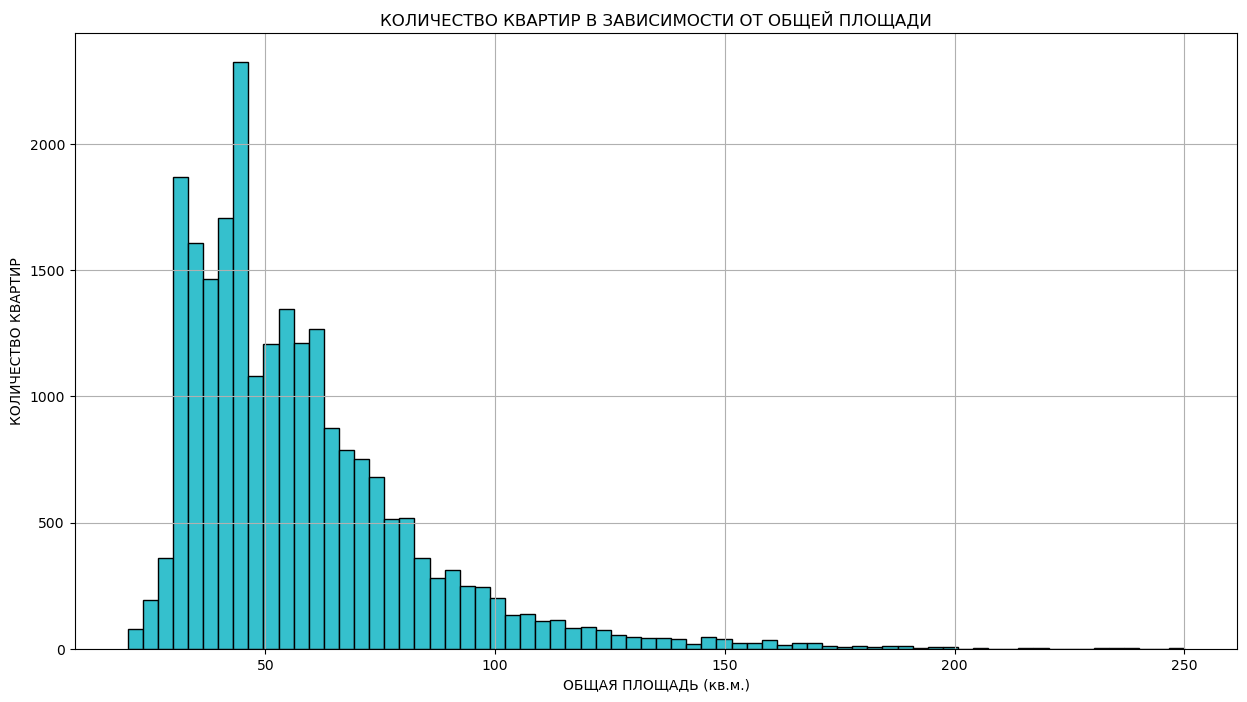

In [155]:
data['total_area'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ОБЩЕЙ ПЛОЩАДИ', 
    bins=70, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ОБЩАЯ ПЛОЩАДЬ (кв.м.)');

In [156]:
data['total_area'].describe()

count    22758.000000
mean        57.360356
std         25.217890
min         20.000000
25%         40.000000
50%         51.100000
75%         68.000000
max        250.000000
Name: total_area, dtype: float64

Форма гистограммы похожа на распределение Пуассона. Однако, слева от пикового значения график уходит вниз. Квартир с площадью от 20 до 30 кв.м немного. Выбор возрастает ближе к 30 кв.м и, начиная с 30 кв.м резко уходит вверх. Большая часть квартир имеет площадь от 40 до 68 кв.м. Пиковое значение приходится где-то на 46 кв.м. Квартир от 100 до 130 кв.м. примерно также немного, как и квартир площадью 20 до 30 кв.м. Квартир от 140 кв.м и далее, ожидаемо, меньше всего.

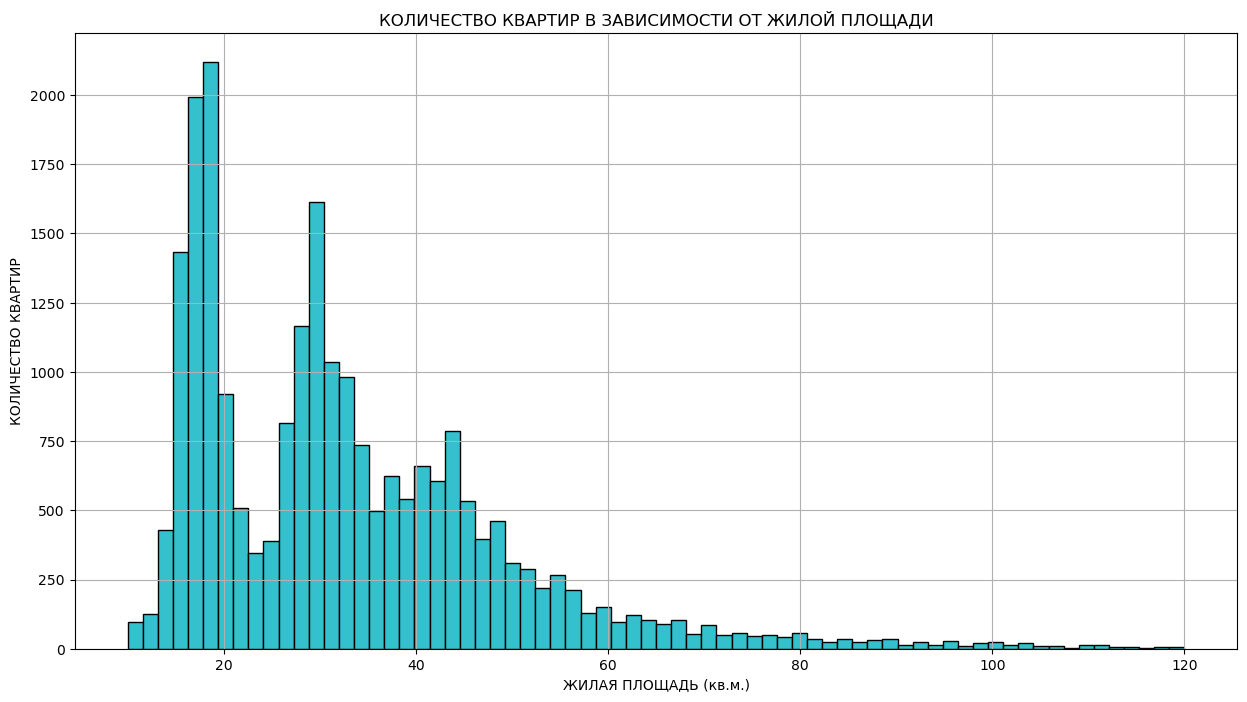

In [157]:
data['living_area'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ЖИЛОЙ ПЛОЩАДИ', 
    bins=70, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ЖИЛАЯ ПЛОЩАДЬ (кв.м.)');

In [158]:
data['living_area'].describe()

count    22758.000000
mean        32.856291
std         16.383462
min         10.000000
25%         18.950306
50%         30.000000
75%         41.600000
max        120.000000
Name: living_area, dtype: float64

Форма гистограммы похожа на распределение Пуассона. Настораживает три пика. Они также просматриваются и в предыдущей гистограмме, но не так ярко выражен провал между первыми двумя пиками. Квартир с жилой площадью от 10 до 14 кв.м ожидаемо мало. Далее, чем больше жилая площадь, тем больше выбор. Пик приходится примерно на 18 кв.м, а затем, резко падает и, квартир с жилой площадью примерно между 23 и 25 кв.м становится заметно меньше. Квартир с жилой площадью от 26 до 36 кв.м снова больше.  Дальше гистограмма идёт на спад. Такие скачки могут быть связаны со стандартами планировки жилых квартир. Но в целом основная масса квартир имеет площадь от 18 до 41 кв.м.

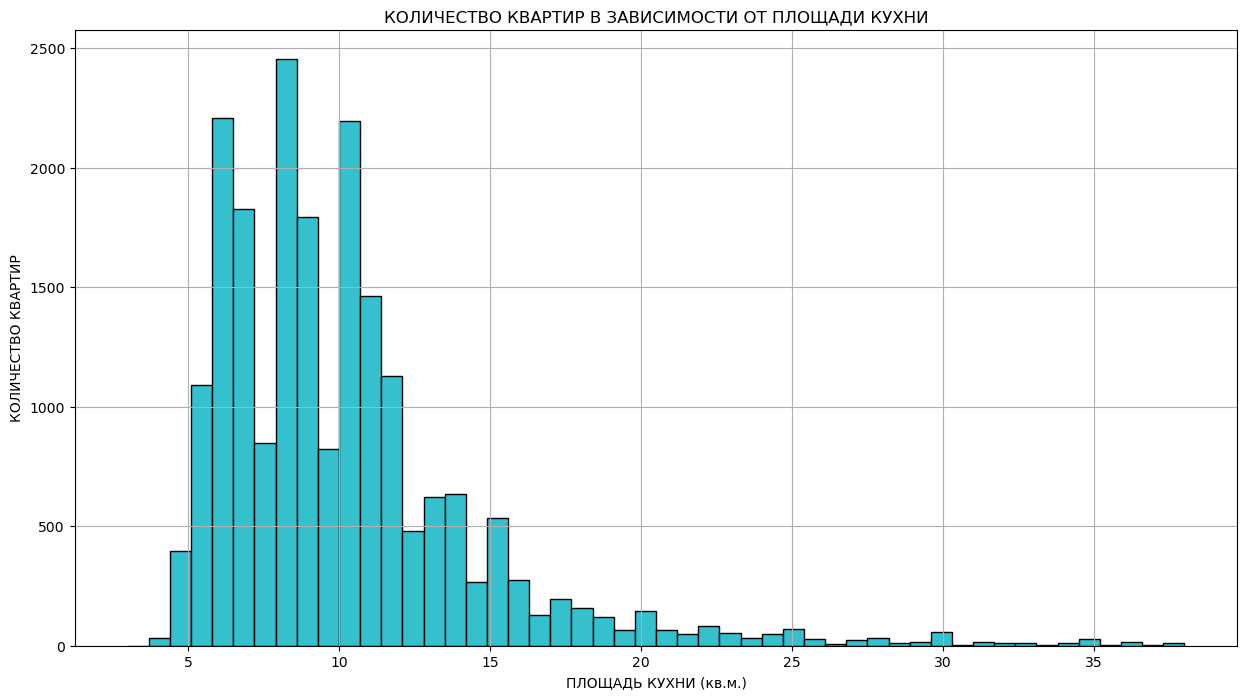

In [159]:
data['kitchen_area'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ПЛОЩАДИ КУХНИ', 
    bins=50, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    range = (3,38),
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ПЛОЩАДЬ КУХНИ (кв.м.)');

In [160]:
data['kitchen_area'].describe()

count    22758.000000
mean         9.149370
std          5.163416
min          0.000000
25%          6.300000
50%          8.800000
75%         11.100000
max         38.000000
Name: kitchen_area, dtype: float64

Квартиры-студии отсекли, так как в них кухня соединена с комнатой. Форма гистограммы похожа на распределение Пуассона. Большая часть квартир на рынке имеет площадь кухни от 6 до 11 кв.м.

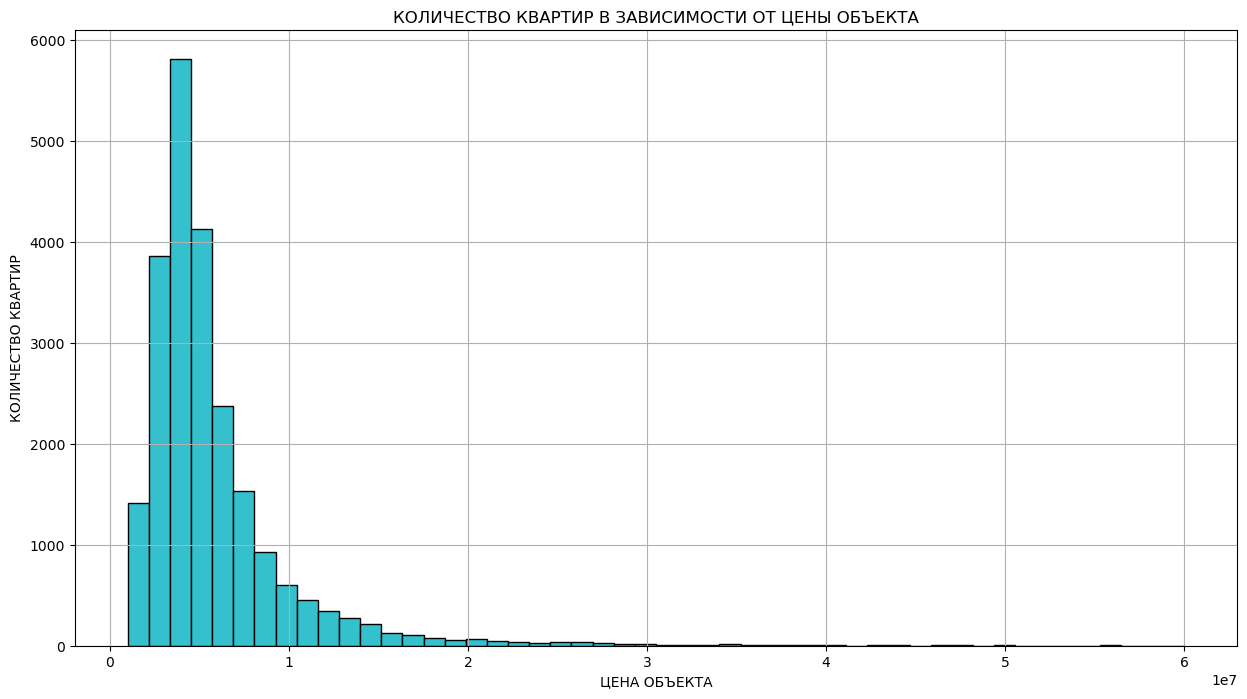

In [161]:
data['last_price'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ЦЕНЫ ОБЪЕКТА', 
    bins=50, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    range = (1000000, 60000000),
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ЦЕНА ОБЪЕКТА');

In [162]:
data['last_price'].describe()

count    2.275800e+04
mean     5.799412e+06
std      4.497692e+06
min      1.000000e+06
25%      3.450000e+06
50%      4.600000e+06
75%      6.550000e+06
max      5.953489e+07
Name: last_price, dtype: float64

Форма гистограммы напоминает распределение Пуассона. Это связано с тем, что цена за квартиру не может быть ниже определённой величины, так же как и площадь квартиры. Большая часть квартир находится в ценовой категории  от 3450000 до 6550000.

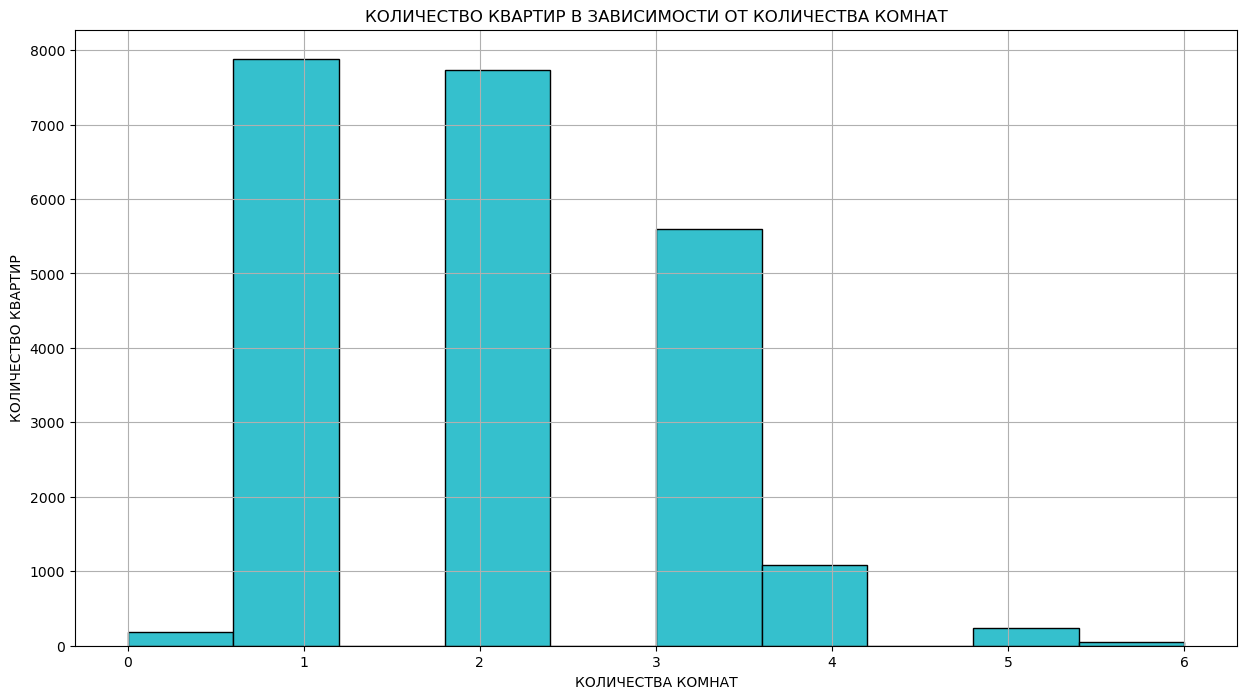

In [163]:
data['rooms'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ КОЛИЧЕСТВА КОМНАТ', 
    bins=10, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('КОЛИЧЕСТВА КОМНАТ');

Форма гистограммы представляет собой распределение Пуассона. Больше всего представлено 1-комнатных и 2-комнатных квартир. 3-комнатных меньше. И, далее, в порядке убывания, мало вариантов 4-комнатных, 5-комнатных и 6-комнатных. 0 комнат - это, возможно, квартиры-студии.

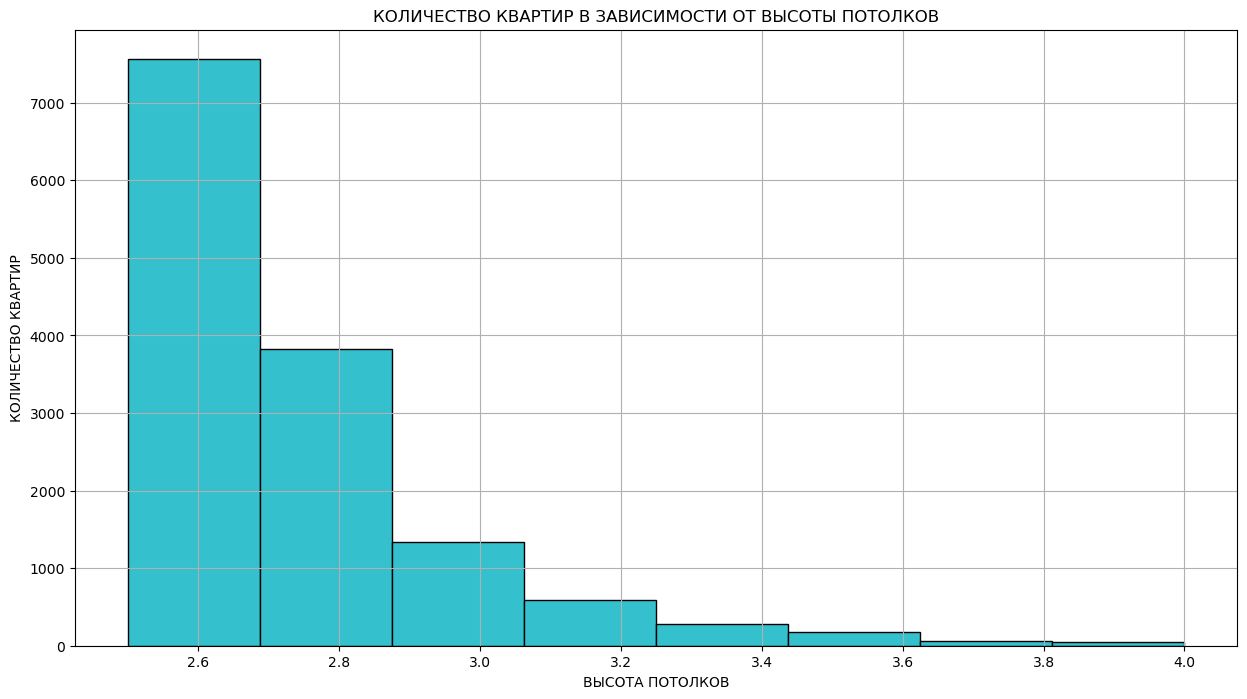

In [164]:
data['ceiling_height'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ВЫСОТЫ ПОТОЛКОВ', 
    bins=8, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ВЫСОТА ПОТОЛКОВ');

In [165]:
data['ceiling_height'].describe()

count    13888.000000
mean         2.710819
std          0.243261
min          2.500000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

Также построим гистограмму, исключив значения-заглушки, которыми мы заполнили пропущенные данные.

In [166]:
new = data[['locality_name', 'ceiling_height', 'city_centers_nearest']].copy()

In [167]:
new = new[new.ceiling_height != 2.65]

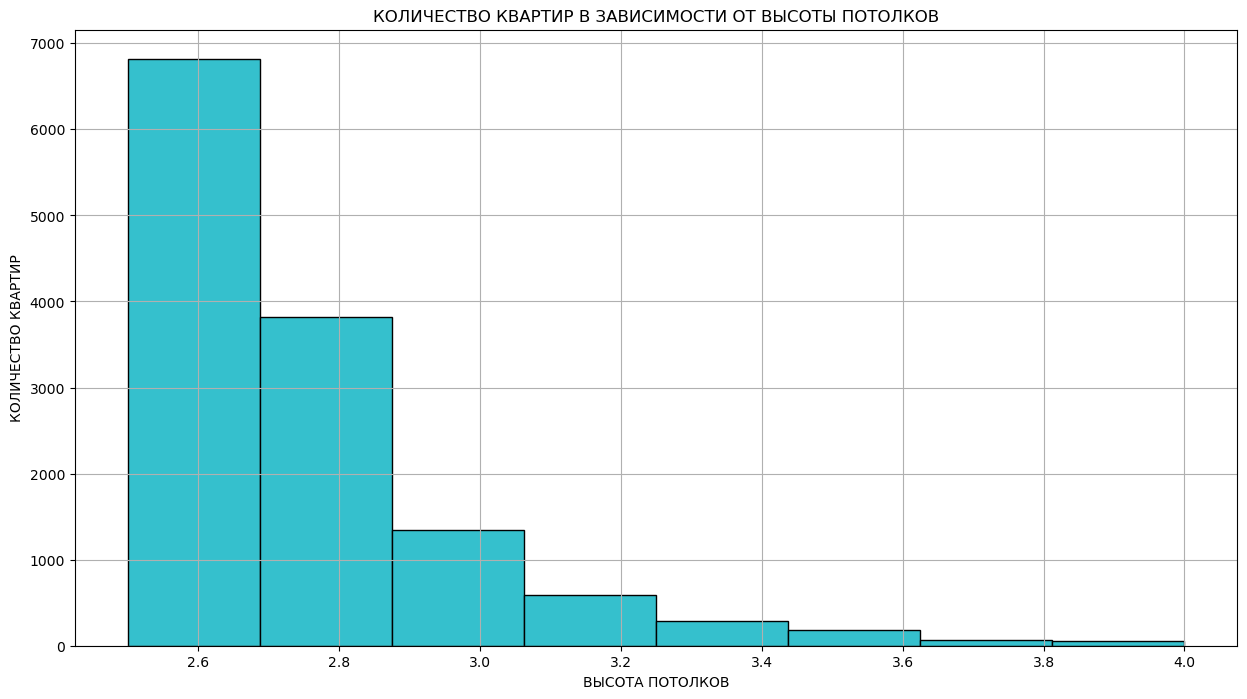

In [168]:
new['ceiling_height'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ВЫСОТЫ ПОТОЛКОВ', 
    bins=8, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ВЫСОТА ПОТОЛКОВ');

In [169]:
new['ceiling_height'].describe()

count    13143.000000
mean         2.714266
std          0.249618
min          2.500000
25%          2.500000
50%          2.600000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

Форма гистограммы представляет собой распределение Пуассона. Большая часть квартир имеет высоту потолков от 2.5 до 2.8 кв.м. Далее идёт резкий спад.

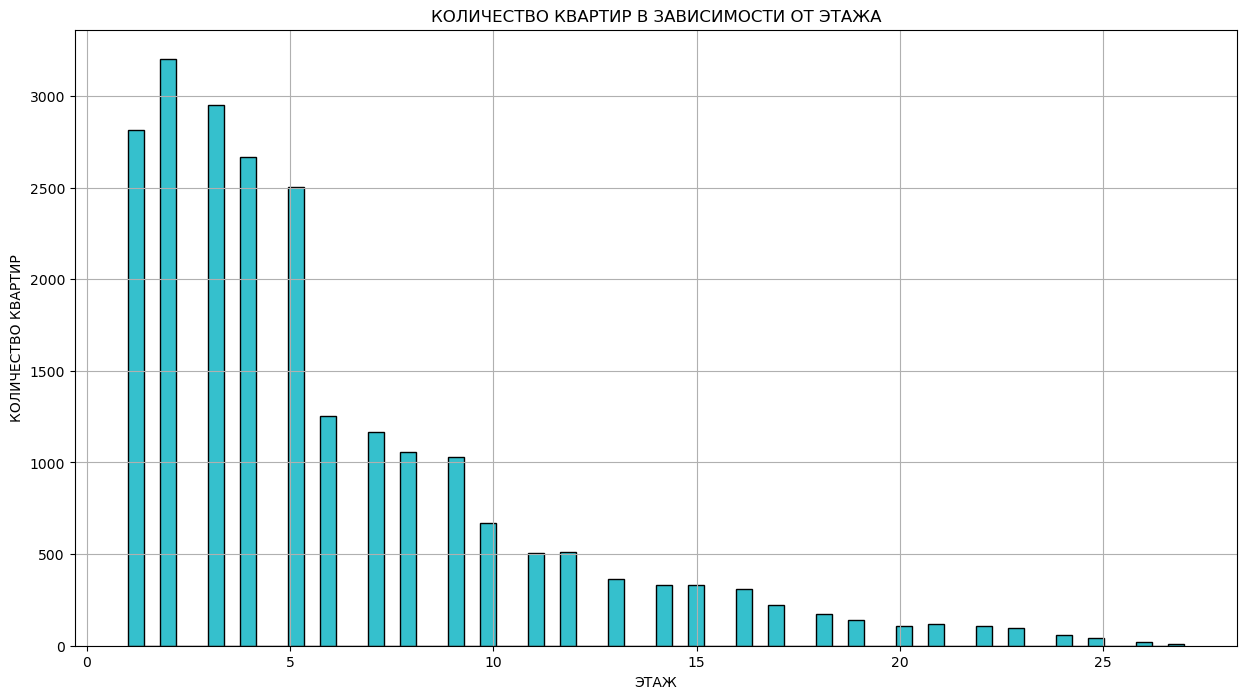

In [170]:
data['floor'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ЭТАЖА', 
    bins=66, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ЭТАЖ');

In [171]:
data['floor'].describe()

count    22758.000000
mean         5.901573
std          4.865333
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

Форма гистограммы представляет собой распределение Пуассона. Большая часть квартир расположена на этажах от 2-го до 8-го. Резкий спад виден после 5-го этажа. Возможно, в таблице 5-этажных домов больше, чем каких-либо других. Далее, следующий срез идёт от 6-го до 9-го этажа.

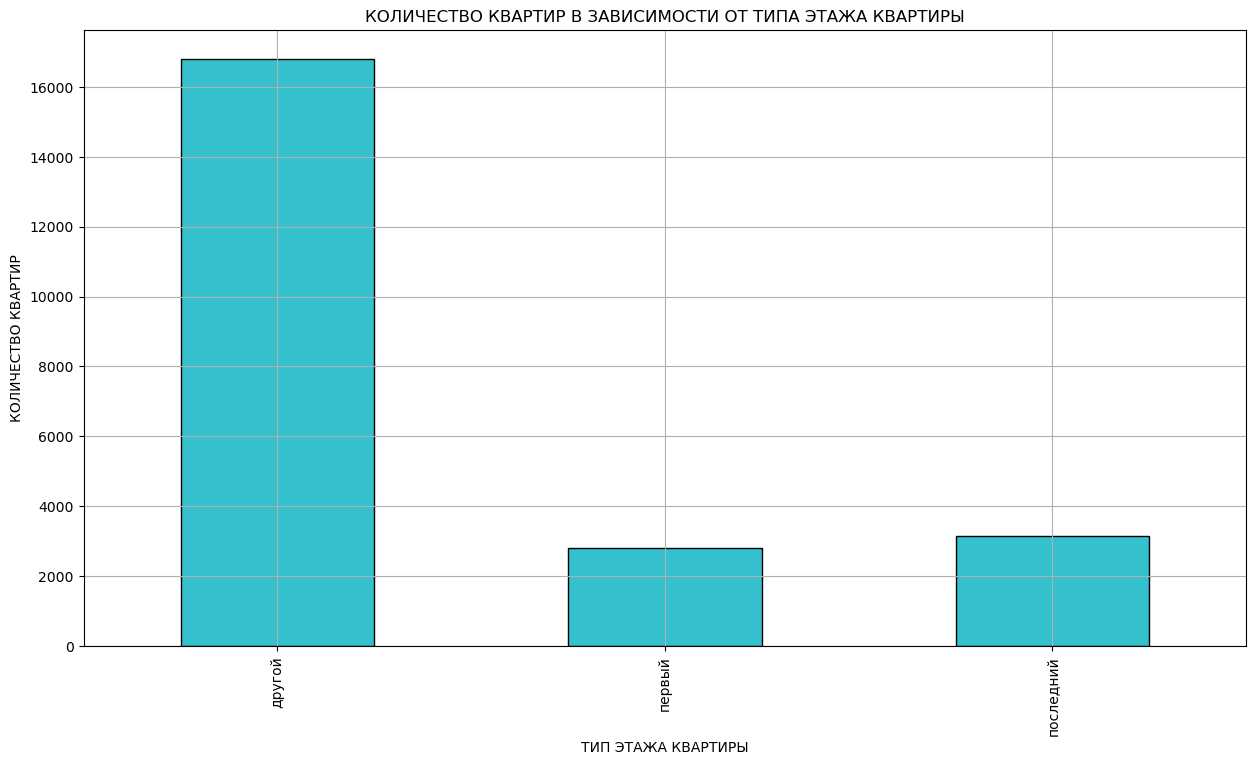

In [172]:
data['floor_category'].value_counts().sort_index().plot.bar(
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ТИПА ЭТАЖА КВАРТИРЫ', 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ТИП ЭТАЖА КВАРТИРЫ');

Результаты очевидны. Конечно, квартир на первых и последних этажах намного меньше, чем всех других вместе взятых.

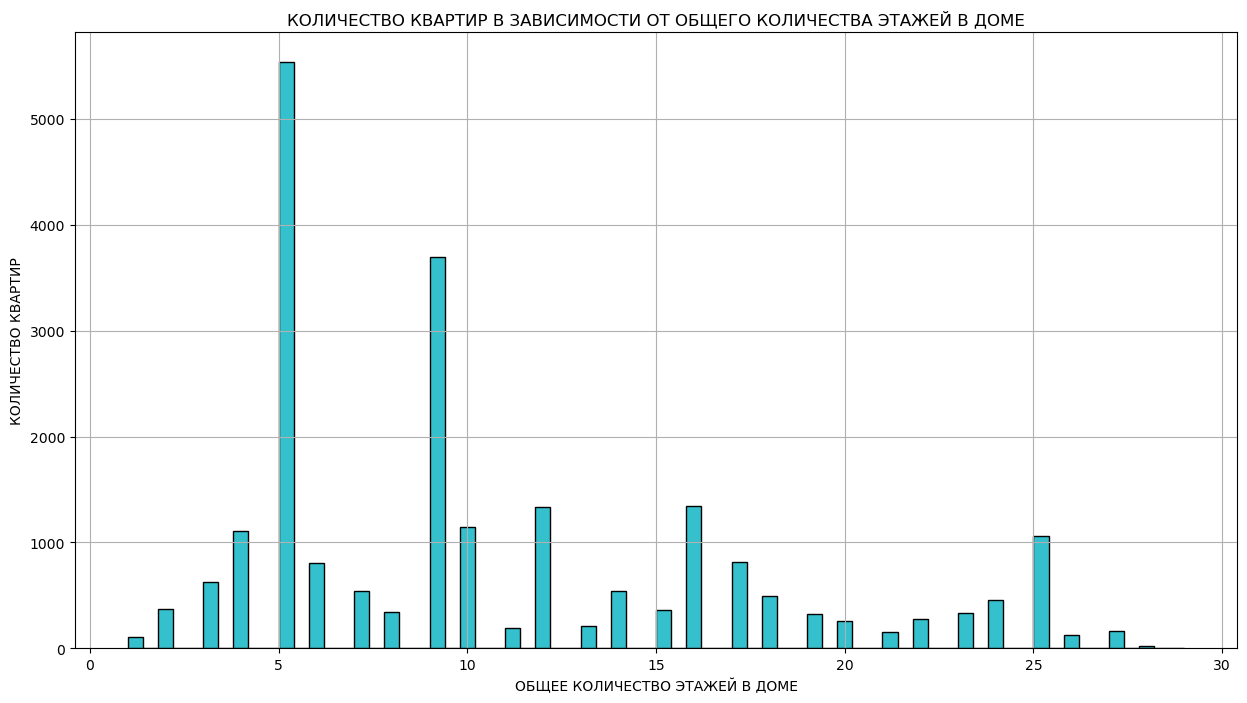

In [173]:
data['floors_total'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ОБЩЕГО КОЛИЧЕСТВА ЭТАЖЕЙ В ДОМЕ', 
    bins=70, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ОБЩЕЕ КОЛИЧЕСТВО ЭТАЖЕЙ В ДОМЕ');

In [174]:
data['floors_total'].describe()

count      22758.0
mean     10.682749
std       6.554571
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           29.0
Name: floors_total, dtype: Float64

В целом гистограмма похожа на распределение Пуассона, но с большим количеством пиков. Большая часть квартир находится в домах, которые имеют от 5 до 15 этажей. И, как предполагалось выше, больше всего пятиэтажных домов, а следующий пик приходится на 9-этажные.

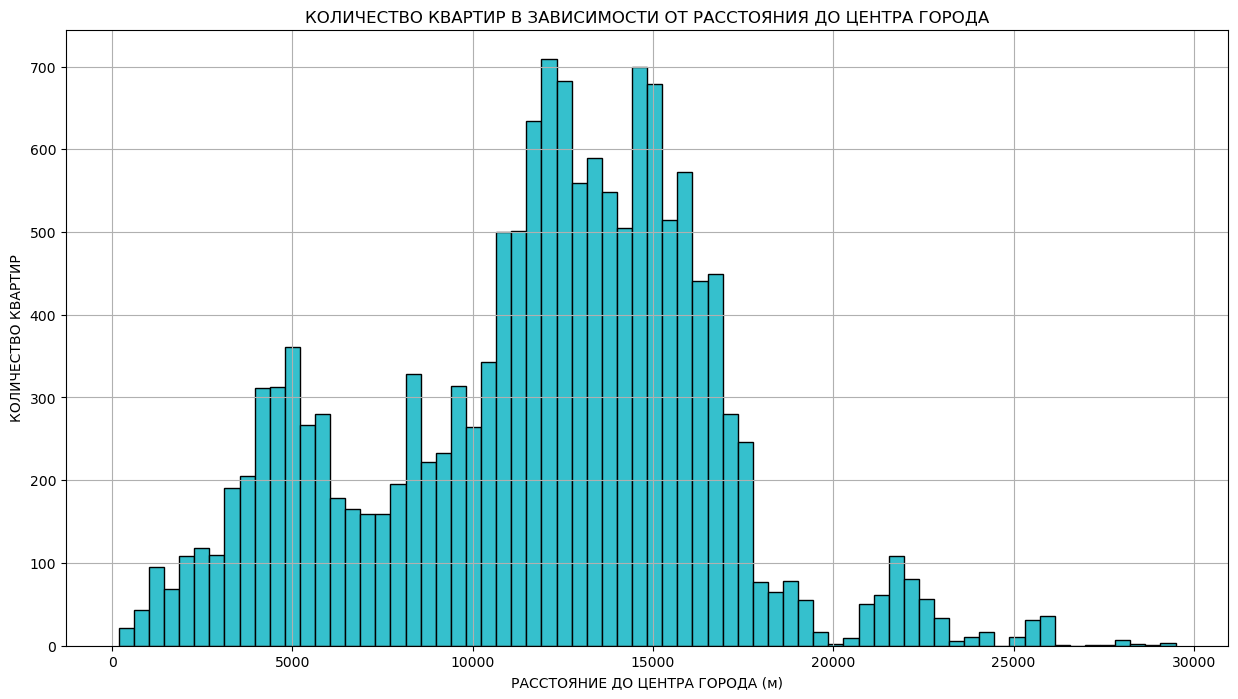

In [175]:
data['city_centers_nearest'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ РАССТОЯНИЯ ДО ЦЕНТРА ГОРОДА', 
    bins=70, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА (м)');

In [176]:
data['city_centers_nearest'].describe()

count    14982.000000
mean     11780.057135
std       4732.190526
min        181.000000
25%       8686.000000
50%      12348.000000
75%      14983.750000
max      29493.000000
Name: city_centers_nearest, dtype: float64

In [177]:
new[(new.locality_name == 'Санкт-Петербург') & (new.city_centers_nearest!= 12342.0)]

locality_name  ceiling_height  city_centers_nearest
0      Санкт-Петербург            2.70               16028.0
2      Санкт-Петербург             NaN               13933.0
7      Санкт-Петербург             NaN               11634.0
9      Санкт-Петербург            2.50               15008.0
10     Санкт-Петербург            2.67               13878.0
...                ...             ...                   ...
23689  Санкт-Петербург            2.86               16081.0
23690  Санкт-Петербург             NaN                6263.0
23691  Санкт-Петербург            2.75                4489.0
23694  Санкт-Петербург            3.70                4232.0
23697  Санкт-Петербург            3.00               10364.0

[14385 rows x 3 columns]

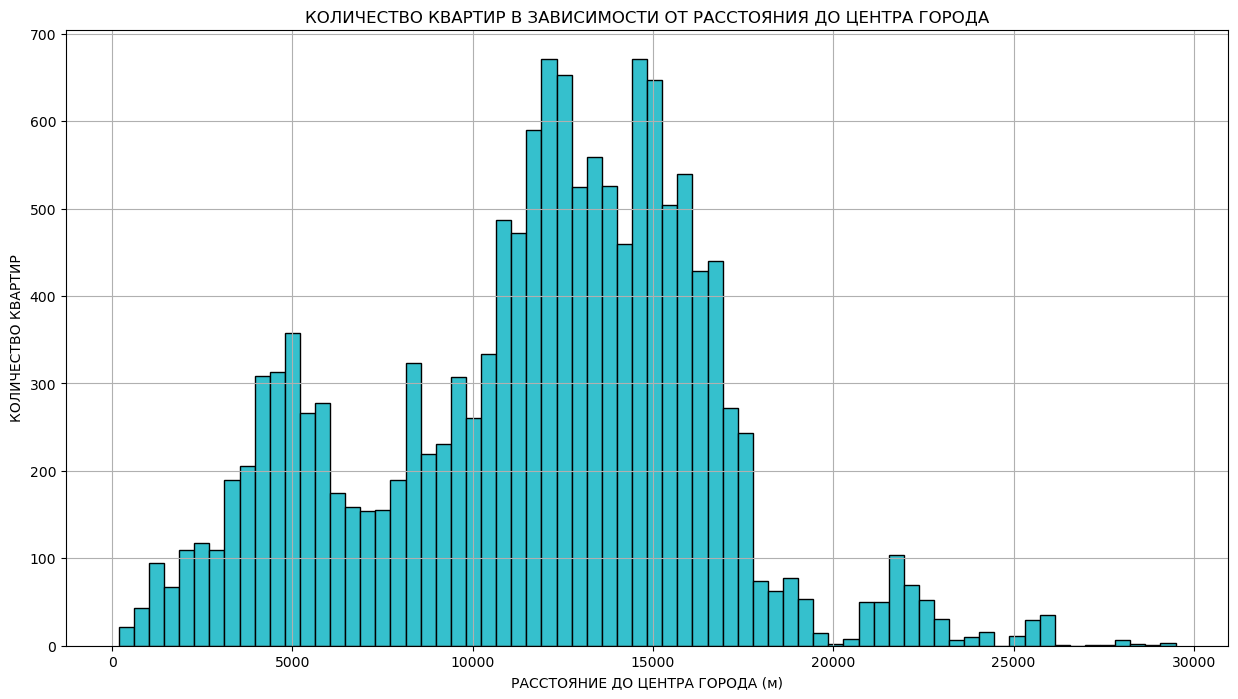

In [178]:
new['city_centers_nearest'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ РАССТОЯНИЯ ДО ЦЕНТРА ГОРОДА', 
    bins=70, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА (м)');

In [179]:
new['city_centers_nearest'].describe()

count    14447.000000
mean     11715.149789
std       4755.961564
min        181.000000
25%       8513.000000
50%      12342.000000
75%      14981.500000
max      29493.000000
Name: city_centers_nearest, dtype: float64

Распределение имеет много пиков. Это может быть связано с неравномерностью построек. Ближе к центру города меньше построек, чем, например, на расстоянии от 10000 до 17000 м. Скорее всего 10000 - 17000 - это спальные районы Петербурга. Далее, чем дальше от центра, тем меньше построек.

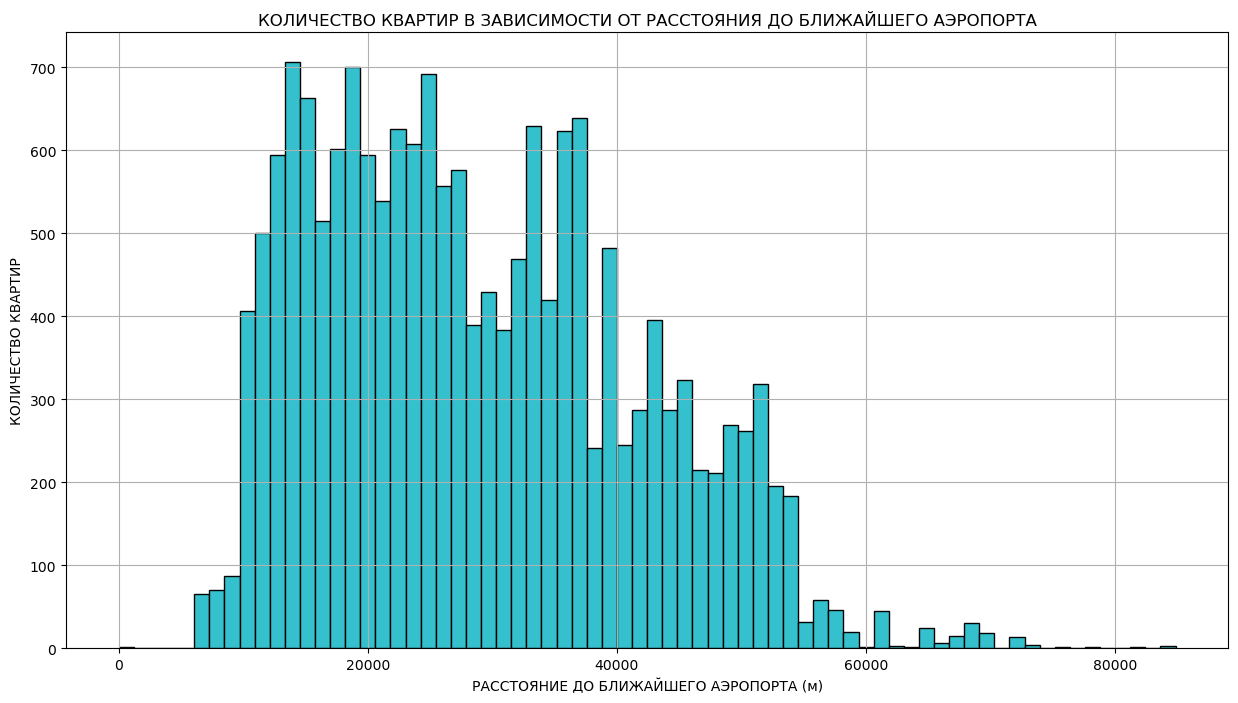

In [180]:
data['airports_nearest'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ РАССТОЯНИЯ ДО БЛИЖАЙШЕГО АЭРОПОРТА', 
    bins=70, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('РАССТОЯНИЕ ДО БЛИЖАЙШЕГО АЭРОПОРТА (м)');

In [181]:
data['airports_nearest'].describe()

count    17331.000000
mean     28887.164618
std      12758.166910
min          0.000000
25%      18428.000000
50%      26949.000000
75%      37417.000000
max      84853.000000
Name: airports_nearest, dtype: float64

Большая часть квартир находится на расстоянии от 18428 до 37417 м до единственного аэропорта в Санкт-Петербурге - Пулково. Но пиковое значение (резкий подъем) приходится на расстоянии 27000 м. Сам аэропорт расположен на юге города. Получается, что большая часть квартир находится на севере.

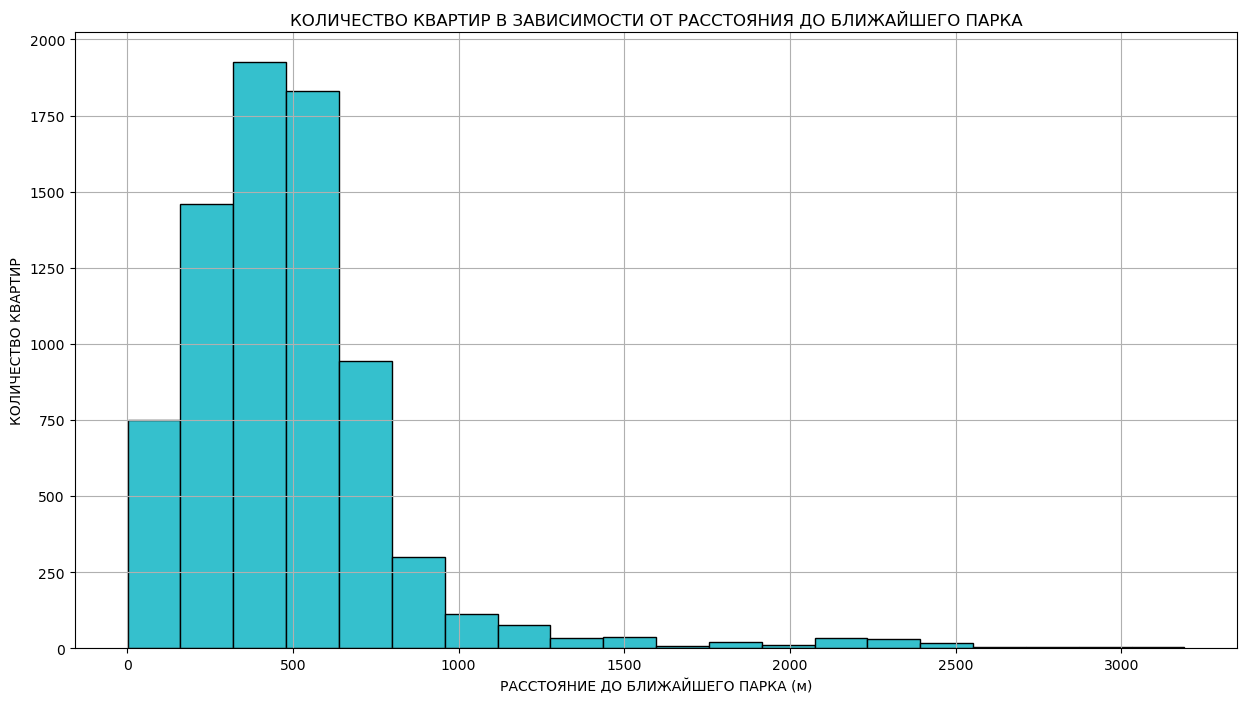

In [182]:
data['parks_nearest'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ РАССТОЯНИЯ ДО БЛИЖАЙШЕГО ПАРКА', 
    bins=20, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА (м)');

In [183]:
data['parks_nearest'].describe()

count    7614.000000
mean      492.027055
std       338.989047
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В основном все квартиры находятся на расстоянии 289-613 м от парка.

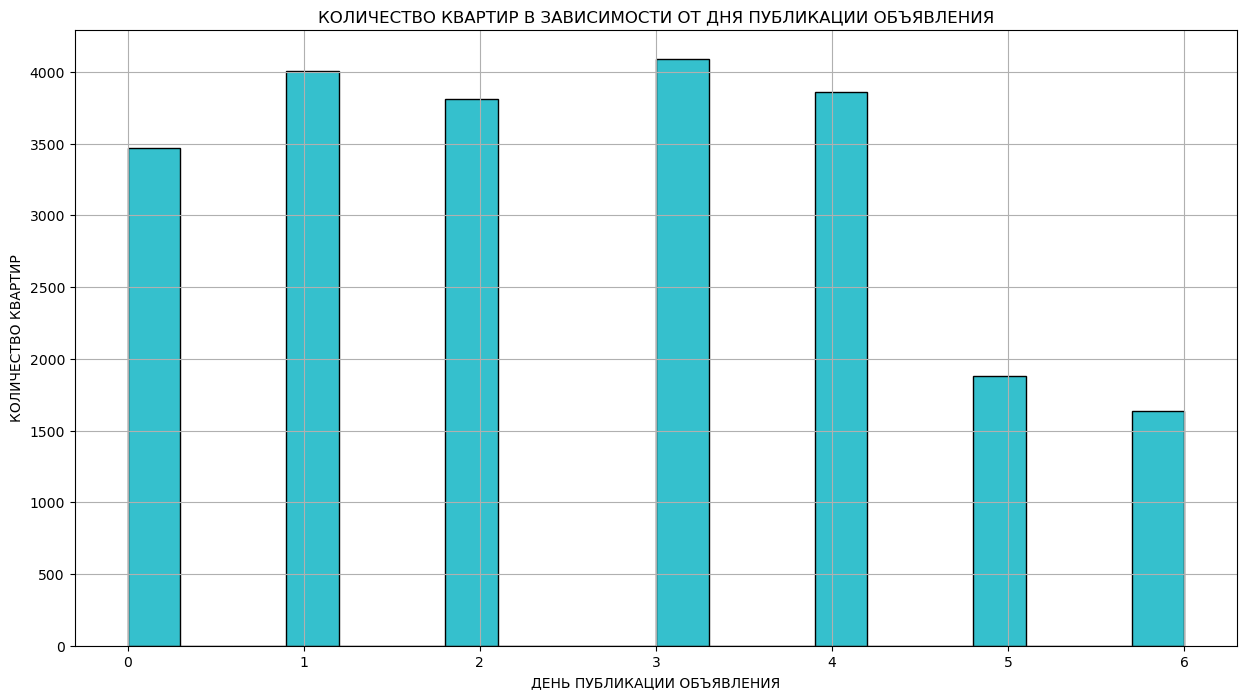

In [184]:
data['week_day'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ДНЯ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ', 
    bins=20, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ДЕНЬ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ');

На гистограмме усечённое распределение, с обрывом справа. На выходных желающих публиковать объявления становится меньше. Учитывая, что большую часть объявлений размещают риэлторы, вероятно, у них пятидневная рабочая неделя.

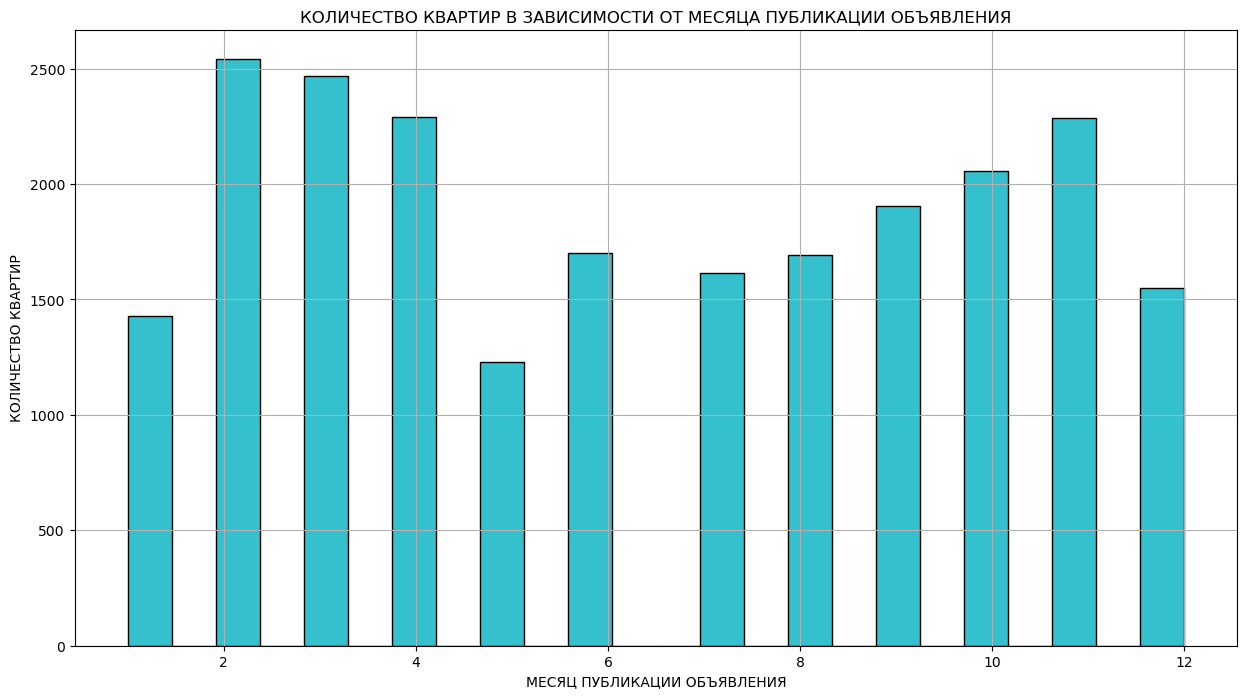

In [185]:
data['num_month'].plot(
    kind='hist', 
    title='КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ МЕСЯЦА ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ', 
    bins=24, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('МЕСЯЦ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ');

На гистограмме распределение с двумя пиками. Ожидаемо, что меньше всего желающих публиковать объявление в первый и в последний месяц года. Также количество желающих резко снижается в мае (праздники, дачи). Все месяцы опережает февраль. Скорее всего, все хотят продать квартиры в феврале, чтобы до весны купить новую квартиру, т.к. ремонт обычно люди начинают делать весной.

### Изучение срока продажи квартир

Изучим, как быстро продавались квартиры. Для этого обратим внимание на столбец days_exposition. Построим гистограмму, выведем описание данных.

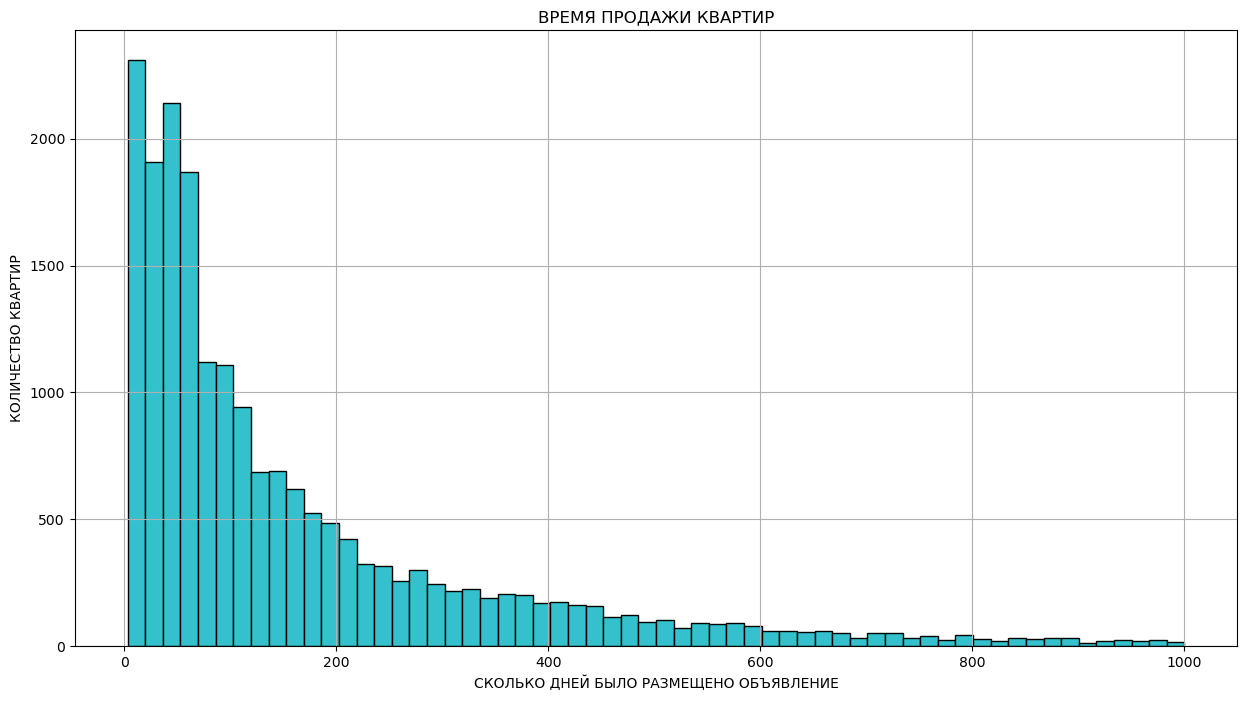

In [186]:
data['days_exposition'].plot(
    kind='hist', 
    title='ВРЕМЯ ПРОДАЖИ КВАРТИР', 
    bins=60, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('СКОЛЬКО ДНЕЙ БЫЛО РАЗМЕЩЕНО ОБЪЯВЛЕНИЕ');

In [187]:
data['days_exposition'].describe()

count       19724.0
mean      165.81596
std      186.454439
min             3.0
25%            44.0
50%            92.0
75%           218.0
max          1000.0
Name: days_exposition, dtype: Float64

Среднее значение - 166 дней. Медиана - 92 дня. Гистограмма имеет форму распределения Пуассона. Большая часть квартир продаётся от 44 до 218 дней. Получается, можно считать быстрыми продажи, которые занимали менее 44 дней, а долгими - больше 218 дней. Также можно отметить очень большое стандартное отклонение. Есть объявления, которые висят очень долго - 1000 дней и более.

Посмотрим, как менялась средняя скорость продаж по годам.

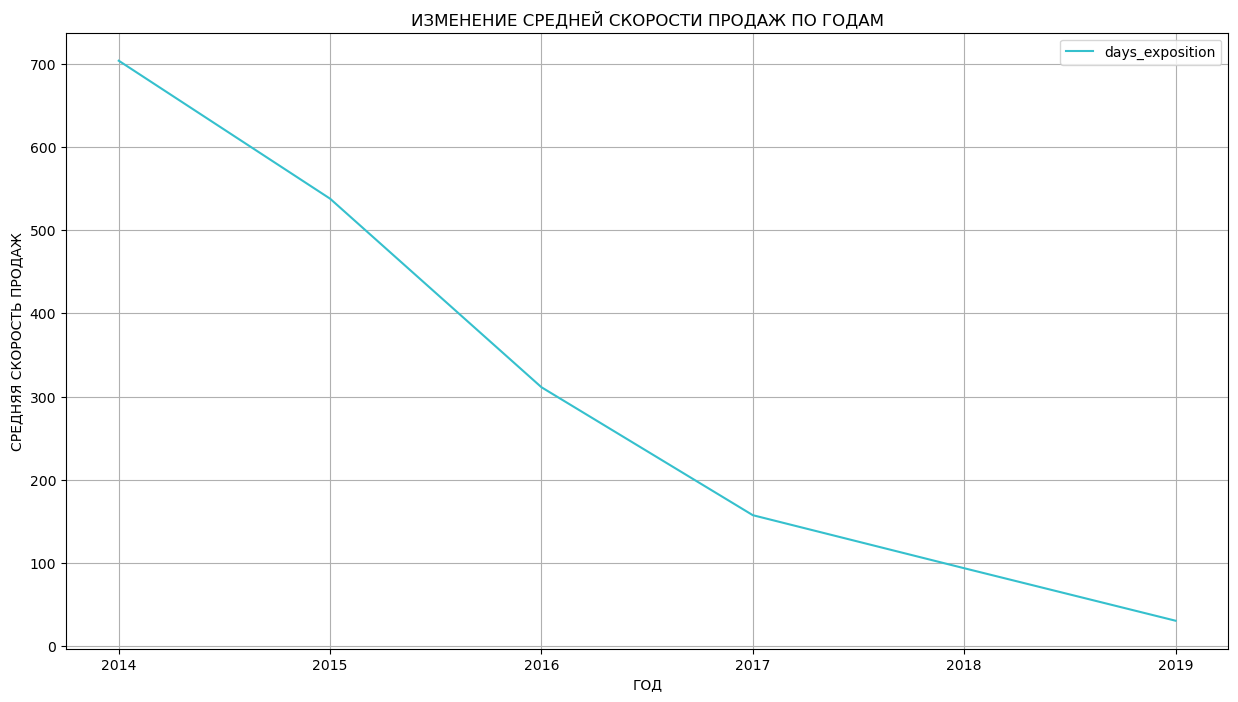

In [188]:
data.pivot_table(
    index = 'year_pub', 
    values = 'days_exposition').plot(
    title='ИЗМЕНЕНИЕ СРЕДНЕЙ СКОРОСТИ ПРОДАЖ ПО ГОДАМ', 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd');
plt.ylabel('СРЕДНЯЯ СКОРОСТЬ ПРОДАЖ')
plt.xlabel('ГОД');

Средняя скорость продаж с 2014 по 2019 года падала. Для российского рынка недвижимости кризис 2014 год - тяжёлый.
Некоторые причины падения спроса на жильё по данным портала строящейся недвижимости Novostroy:
* 2014 г. - первые ограничения по санкциям;
* ослабление курса рубля в декабре 2014, поле чего ЦБ РФ принял решение резко поднять ключевую ставку— с 9,5% до 17% годовых;
* в 2015 году объём выданных ипотечных кредитов упал до 1147 млрд рублей. Это на 615 млрд рублей меньше, чем в 2014.

### Изучение факторов, влияющих на  скорость продажи квартир

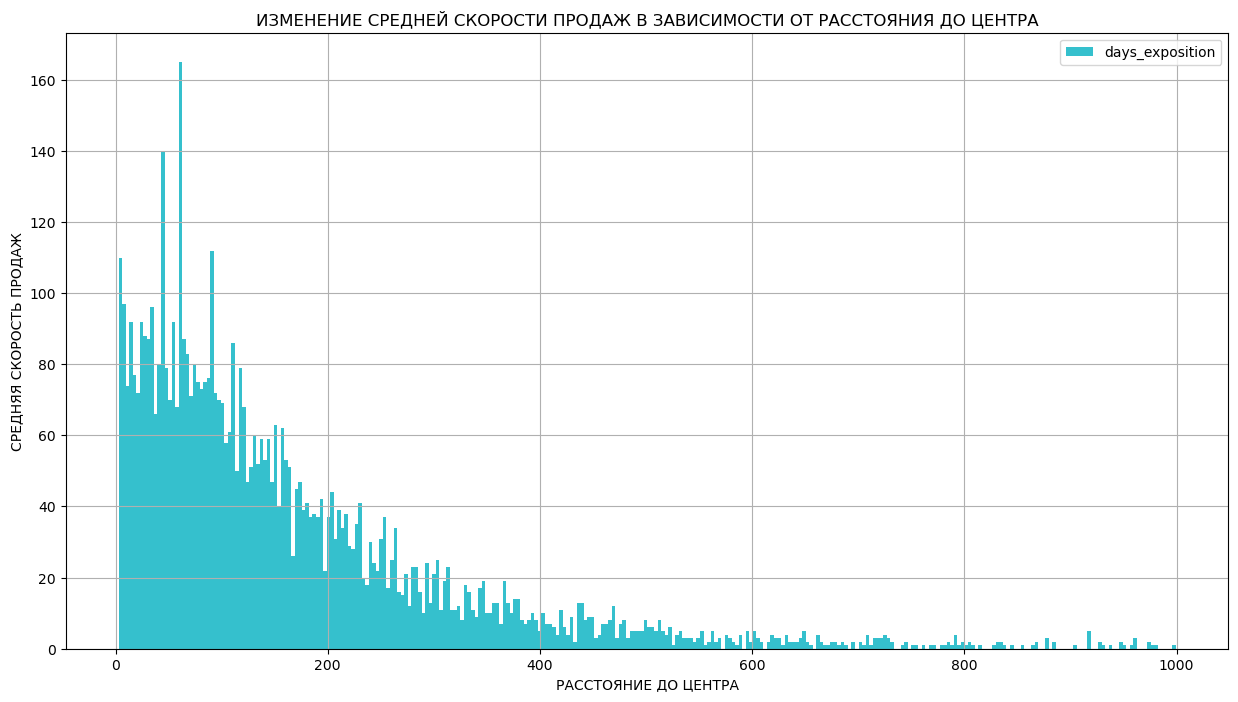

In [189]:
data.pivot_table(
    index = 'city_centers_nearest', 
    values = 'days_exposition').plot(
    kind='hist',
    bins = 300,
    title='ИЗМЕНЕНИЕ СРЕДНЕЙ СКОРОСТИ ПРОДАЖ В ЗАВИСИМОСТИ ОТ РАССТОЯНИЯ ДО ЦЕНТРА', 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd');
plt.ylabel('СРЕДНЯЯ СКОРОСТЬ ПРОДАЖ')
plt.xlabel('РАССТОЯНИЕ ДО ЦЕНТРА');

Чем ближе к центру находится объект, тем быстрее он продаётся.

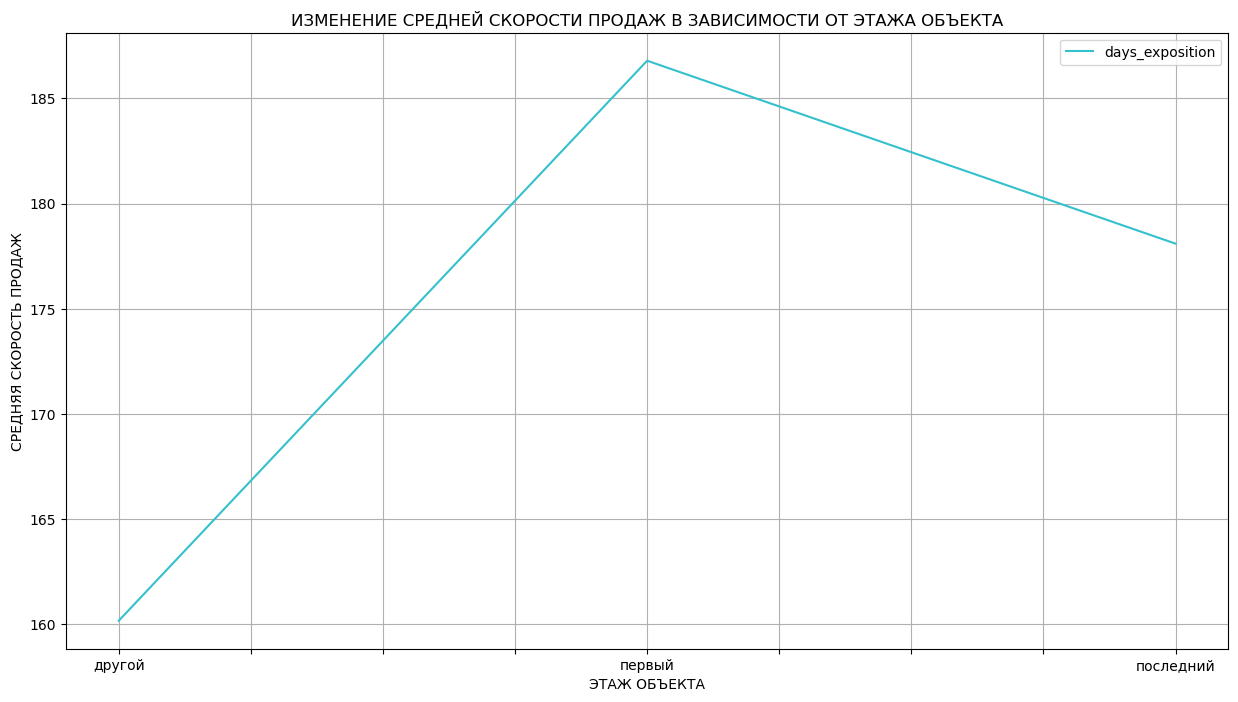

In [190]:
data.pivot_table(
    index = 'floor_category', 
    values = 'days_exposition').plot(
    title='ИЗМЕНЕНИЕ СРЕДНЕЙ СКОРОСТИ ПРОДАЖ В ЗАВИСИМОСТИ ОТ ЭТАЖА ОБЪЕКТА', 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd');
plt.ylabel('СРЕДНЯЯ СКОРОСТЬ ПРОДАЖ')
plt.xlabel('ЭТАЖ ОБЪЕКТА');

Первые этажи продаются быстрее. Ниже мы увидим, что они дешевле. Возможно, поэтому. Промежуточные этажи дороже, чем первый и последний, а продаются медленнее.

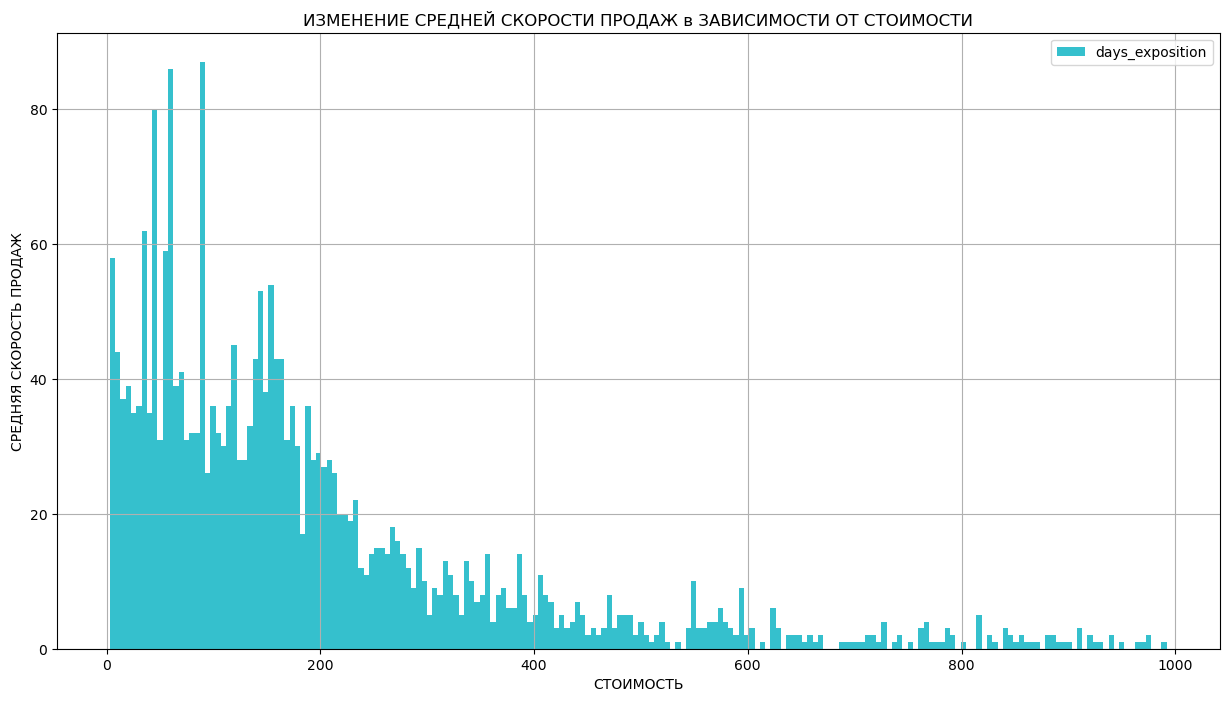

In [191]:
data.pivot_table(
    index = 'last_price', 
    values = 'days_exposition').plot(
    kind='hist',
    bins = 200,
    title='ИЗМЕНЕНИЕ СРЕДНЕЙ СКОРОСТИ ПРОДАЖ в ЗАВИСИМОСТИ ОТ СТОИМОСТИ', 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd');
plt.ylabel('СРЕДНЯЯ СКОРОСТЬ ПРОДАЖ')
plt.xlabel('СТОИМОСТЬ');

Чем дешевле квартира, тем быстрее она продаётся.

### Факторы, влияющие на стоимость объекта

Чтобы определить, какие факторы и как влияют на общую стоимость объекта, найдём коэффициент корреляции между стоимостью и предполагаемыми факторами. Также построим графики.

0.75

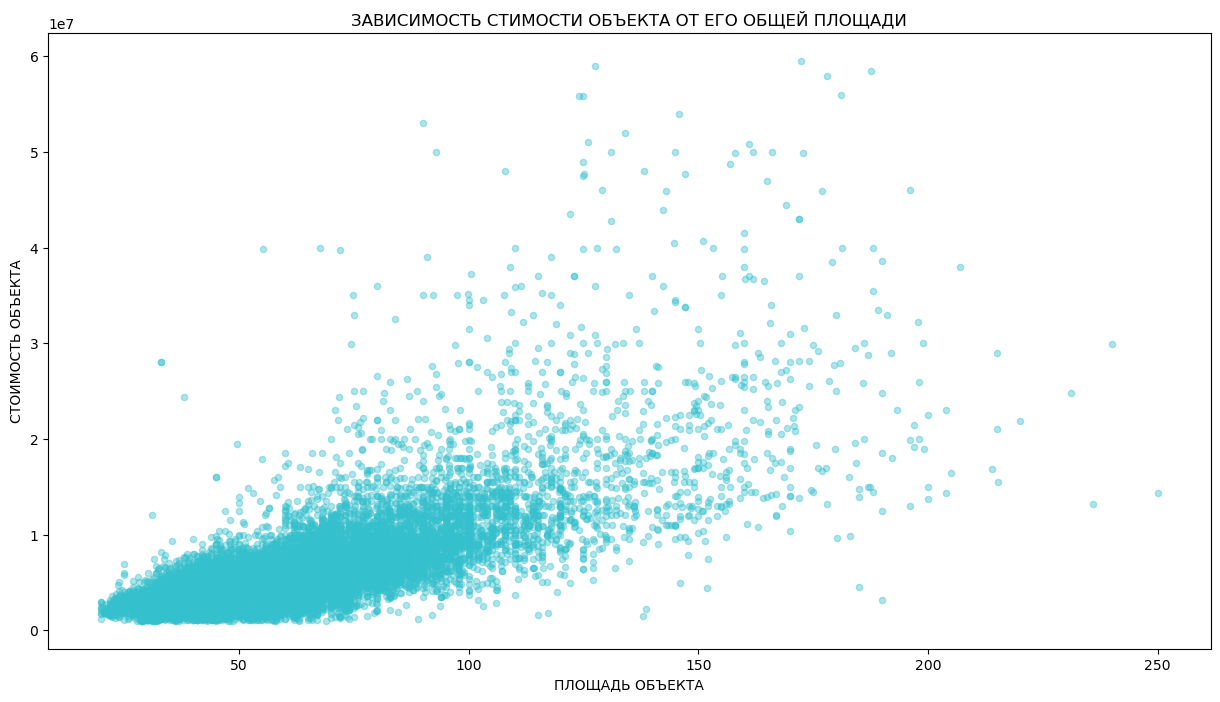

In [192]:
display(data['last_price'].corr(data['total_area']).round(2))
data.plot(
    x = 'total_area',
    y = 'last_price',
    kind='scatter', 
    title='ЗАВИСИМОСТЬ СТИМОСТИ ОБЪЕКТА ОТ ЕГО ОБЩЕЙ ПЛОЩАДИ',  
    alpha = 0.4, 
    figsize = (15,8),
    color = '#35c0cd',);
plt.ylabel('СТОИМОСТЬ ОБЪЕКТА')
plt.xlabel('ПЛОЩАДЬ ОБЪЕКТА');

Коэффициент корреляции (0,75). Зависимость сильная. Чем больше площадь квартиры, тем слабее прослеживается линейная зависимость. Наиболее четкая зависимость прослеживается между площадями от 20 до 120 кв.м.

0.66

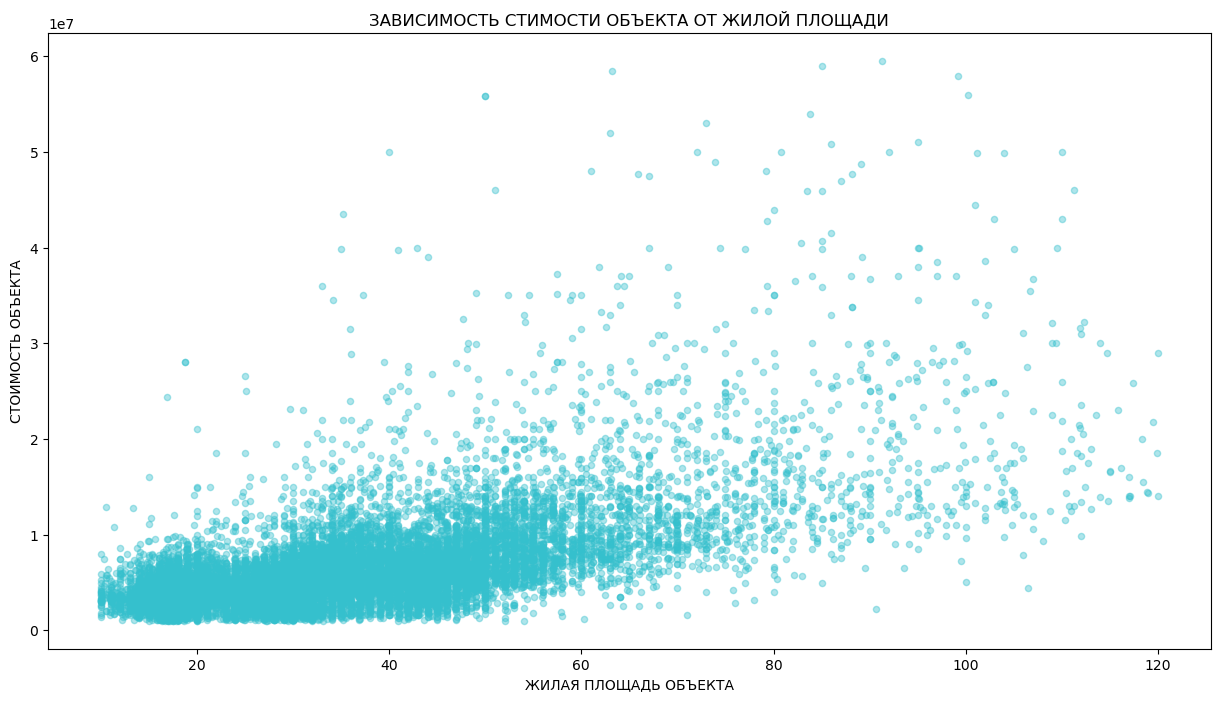

In [193]:
display(data['last_price'].corr(data['living_area']).round(2))
data.plot(
    x = 'living_area',
    y = 'last_price',
    kind='scatter', 
    title='ЗАВИСИМОСТЬ СТИМОСТИ ОБЪЕКТА ОТ ЖИЛОЙ ПЛОЩАДИ',  
    alpha = 0.4, 
    figsize = (15,8),
    color = '#35c0cd',);
plt.ylabel('СТОИМОСТЬ ОБЪЕКТА')
plt.xlabel('ЖИЛАЯ ПЛОЩАДЬ ОБЪЕКТА');

Коэффициент корреляции (0,66) положительный. Зависимость средняя. Чем больше жилая площадь квартиры, тем слабее прослеживается линейная зависимость. Наиболее четкая зависимость прослеживается между площадями от 10 до 60 кв.м.

0.44

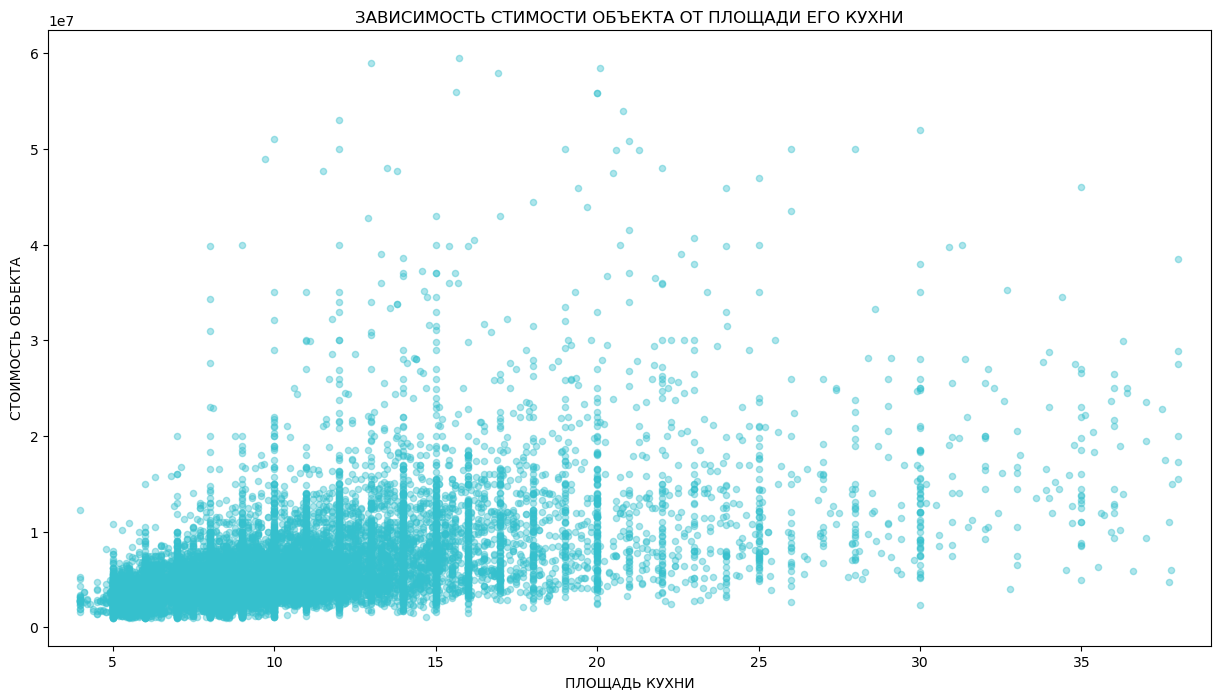

In [194]:
#new[new.kitchen_area != 0]
display(data['last_price'].corr(data['kitchen_area']).round(2))
data.plot(
    x = 'kitchen_area',
    y = 'last_price',
    kind='scatter', 
    title='ЗАВИСИМОСТЬ СТИМОСТИ ОБЪЕКТА ОТ ПЛОЩАДИ ЕГО КУХНИ',  
    alpha = 0.4, 
    figsize = (15,8),
    xlim = (3, 39),
    color = '#35c0cd');
plt.ylabel('СТОИМОСТЬ ОБЪЕКТА')
plt.xlabel('ПЛОЩАДЬ КУХНИ');

Коэффициент корреляции (0,44) положительный. Линейная зависимость средняя. Наиболее линейная зависимость прослеживается между площадями от 5 до 15 кв.м.

0.46

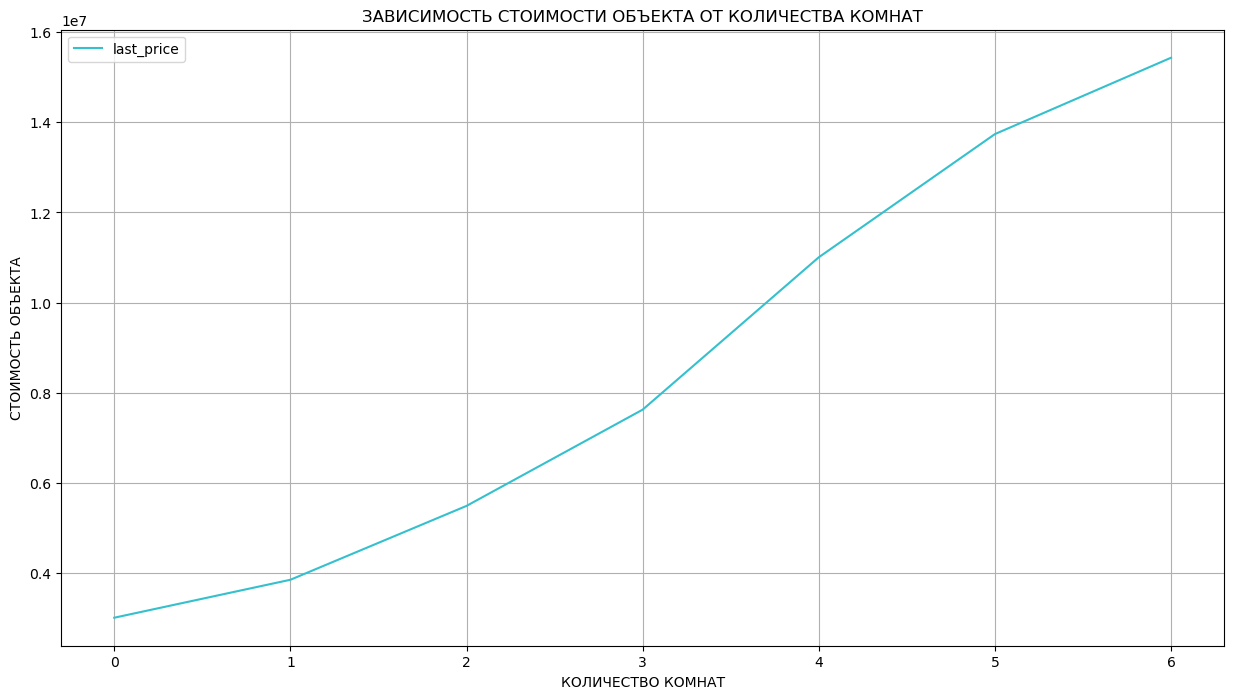

In [195]:
display(data['last_price'].corr(data['rooms']).round(2))
data.pivot_table(index='rooms', values='last_price').plot(
    title='ЗАВИСИМОСТЬ СТОИМОСТИ ОБЪЕКТА ОТ КОЛИЧЕСТВА КОМНАТ', 
    figsize = (15,8), 
    color = '#35c0cd',
    grid=True);
plt.ylabel('СТОИМОСТЬ ОБЪЕКТА')
plt.xlabel('КОЛИЧЕСТВО КОМНАТ');

Видна зависимость, но судя по коэффициенту корреляции (0,46) - средняя.

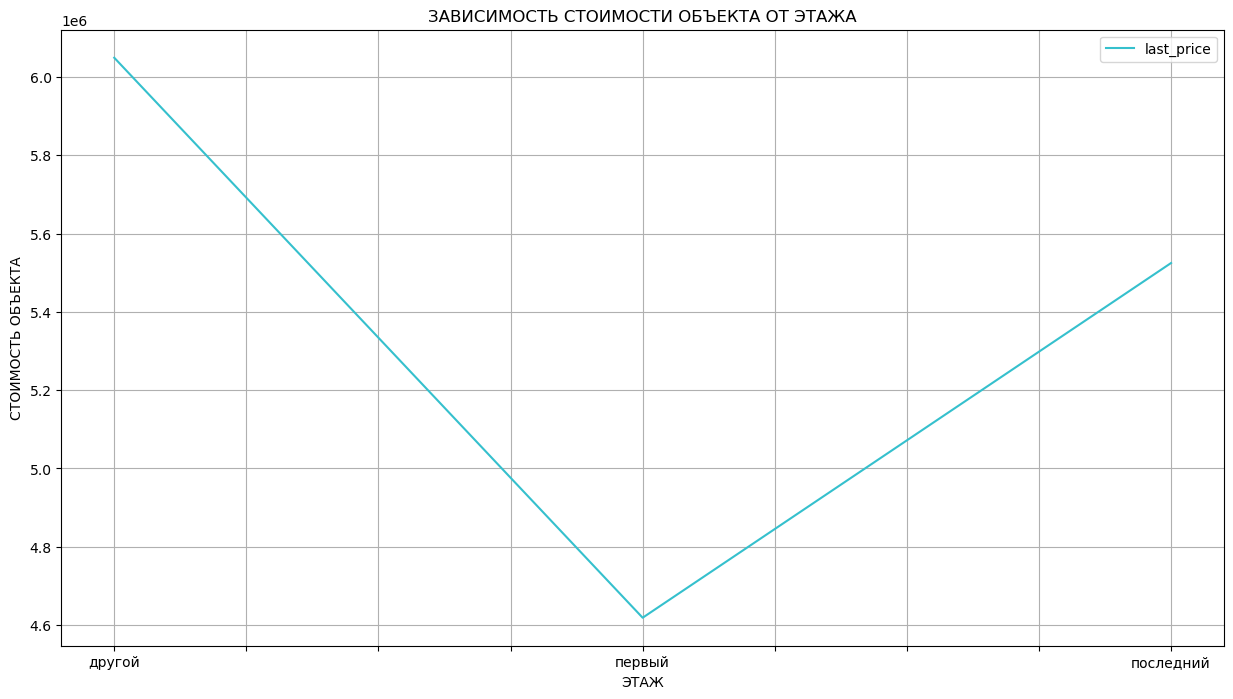

In [196]:
data['floor_category'] = data['floor_category'].astype('str')
data.pivot_table(index='floor_category', values='last_price').plot(
    title='ЗАВИСИМОСТЬ СТОИМОСТИ ОБЪЕКТА ОТ ЭТАЖА', 
    figsize = (15,8),
    color = '#35c0cd',
    grid=True);
plt.ylabel('СТОИМОСТЬ ОБЪЕКТА')
plt.xlabel('ЭТАЖ');

Первые этажи самые дешёвые. Последние этажи дороже, но не такие дорогие, как промежуточные. 

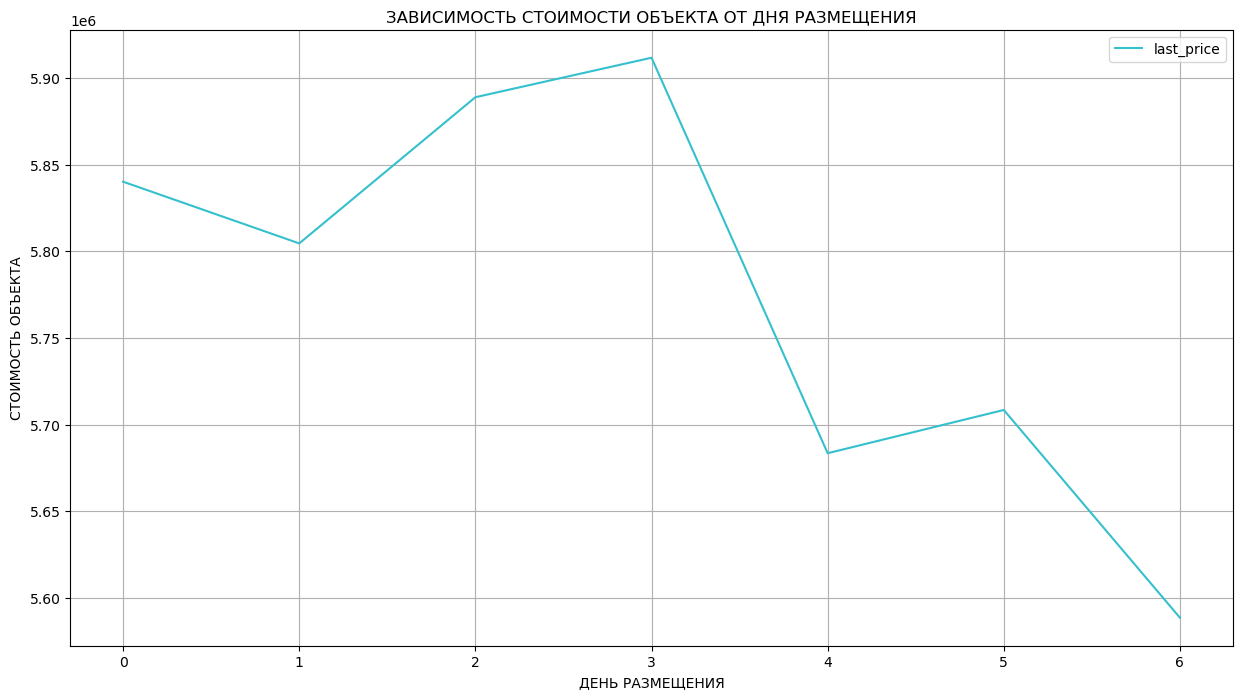

In [197]:
data.pivot_table(index='week_day', values='last_price').plot(
    title='ЗАВИСИМОСТЬ СТОИМОСТИ ОБЪЕКТА ОТ ДНЯ РАЗМЕЩЕНИЯ', 
    figsize = (15,8), 
    color = '#35c0cd',
    grid=True);
plt.ylabel('СТОИМОСТЬ ОБЪЕКТА')
plt.xlabel('ДЕНЬ РАЗМЕЩЕНИЯ');

Цена не зависит от дня размещения. Т.к. в выходные дни объявлений размещают меньше, на графике видно падение.

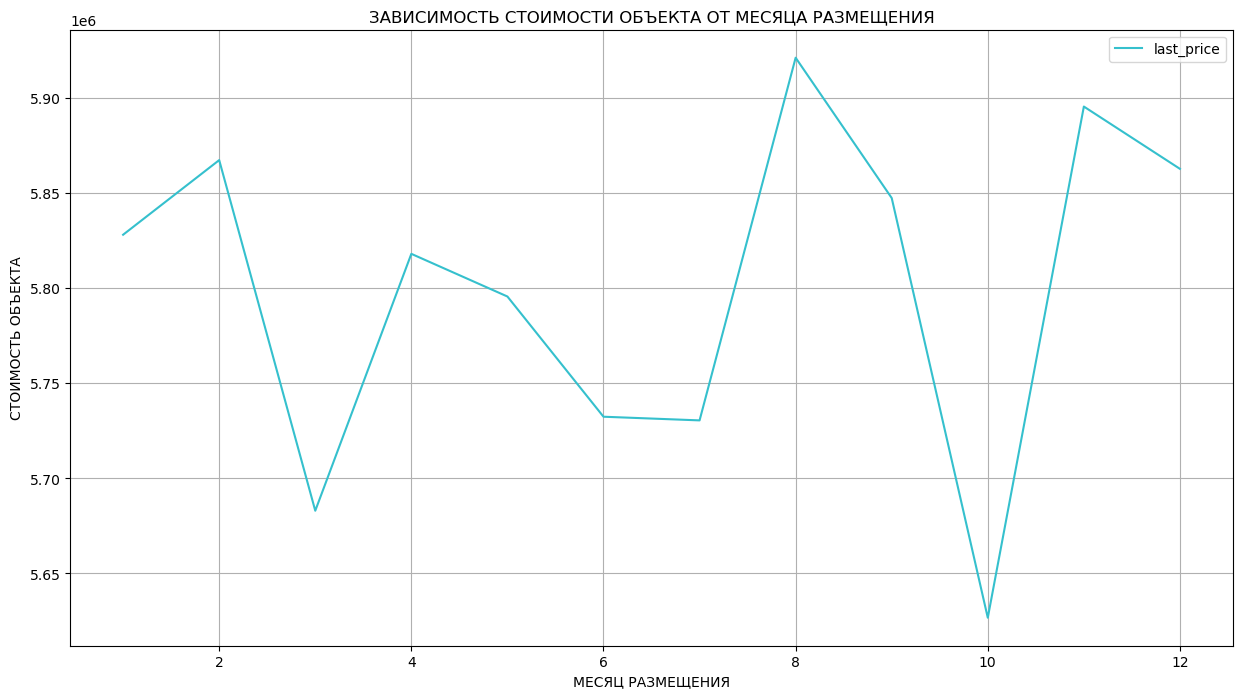

In [198]:
data.pivot_table(index='num_month', values='last_price').plot(
    title='ЗАВИСИМОСТЬ СТОИМОСТИ ОБЪЕКТА ОТ МЕСЯЦА РАЗМЕЩЕНИЯ', 
    figsize = (15,8),
    color = '#35c0cd',
    grid=True);
plt.ylabel('СТОИМОСТЬ ОБЪЕКТА')
plt.xlabel('МЕСЯЦ РАЗМЕЩЕНИЯ');

Цена не зависит линейно от месяца размещения. Но можно отметить, что в июне самые низкие цены, а в сентябре самые высокие.

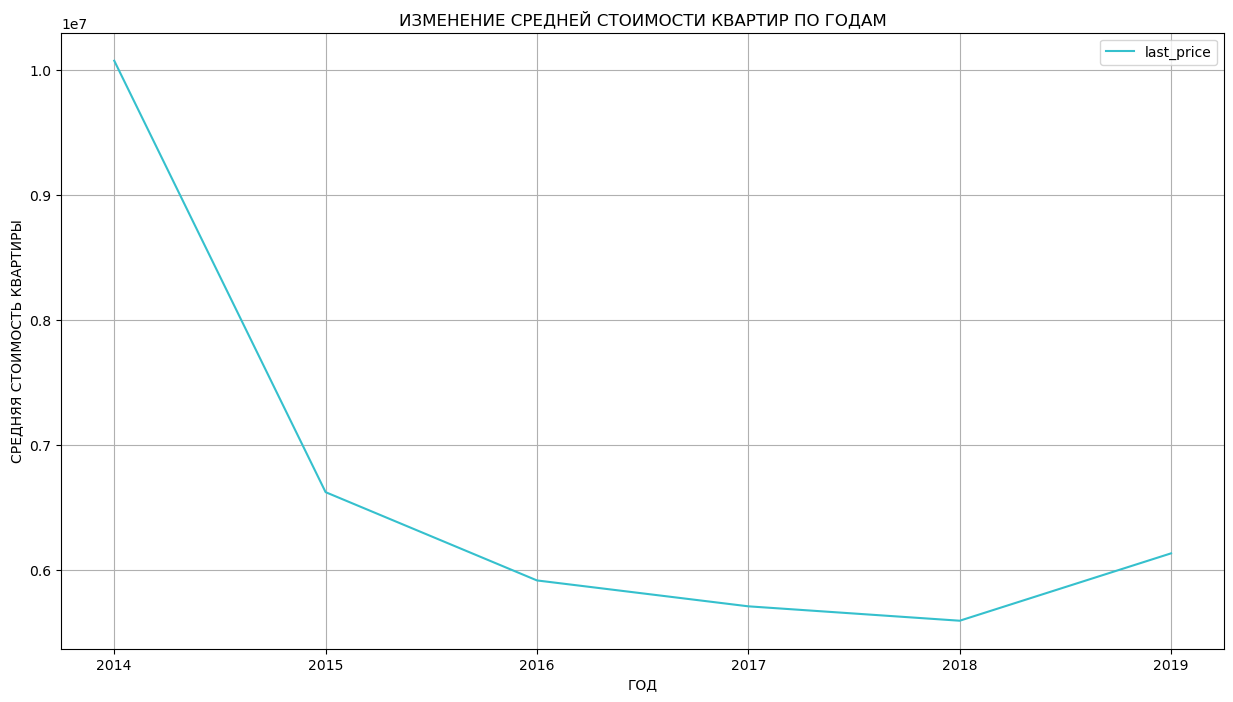

In [199]:
data.pivot_table(
    index = 'year_pub', 
    values = 'last_price').plot(
    title='ИЗМЕНЕНИЕ СРЕДНЕЙ СТОИМОСТИ КВАРТИР ПО ГОДАМ', 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd');
plt.ylabel('СРЕДНЯЯ СТОИМОСТЬ КВАРТИРЫ')
plt.xlabel('ГОД');

С 2014 по 2015 год стоимость квартир упала и держалась на низком уровне до 2018 года. Далее вновь начался подъем цен.

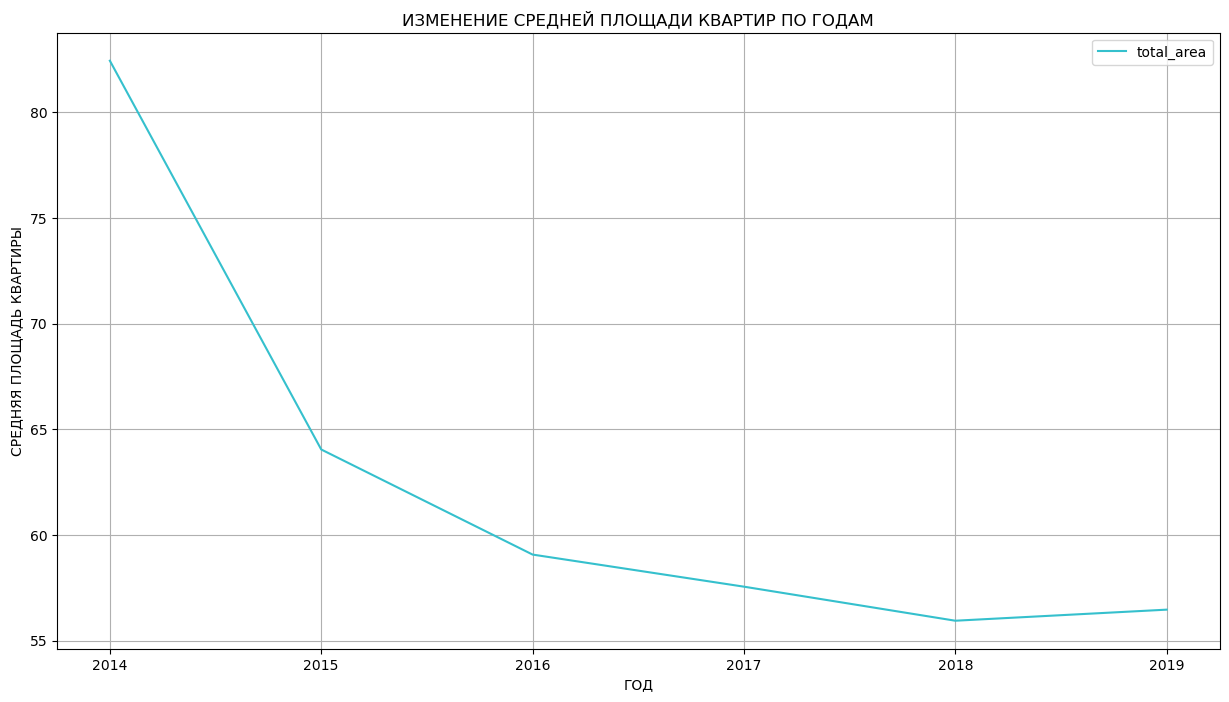

In [200]:
data.pivot_table(
    index = 'year_pub', 
    values = 'total_area').plot(
    title='ИЗМЕНЕНИЕ СРЕДНЕЙ ПЛОЩАДИ КВАРТИР ПО ГОДАМ', 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd');
plt.ylabel('СРЕДНЯЯ ПЛОЩАДЬ КВАРТИРЫ')
plt.xlabel('ГОД');

Посмотрим, как менялось количество размещённых объявлений по годам.

In [201]:
data.groupby('year_pub').size()

year_pub
2014      83
2015     926
2016    2666
2017    7954
2018    8333
2019    2796
dtype: int64

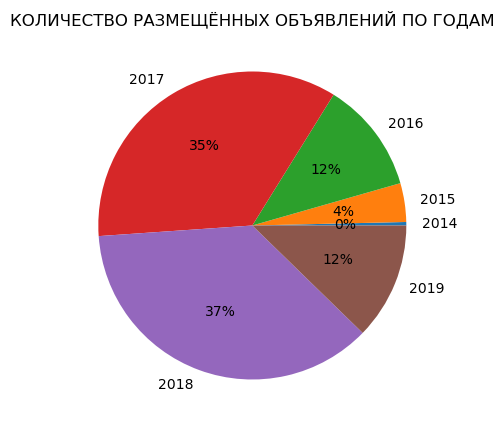

In [202]:
data.groupby('year_pub').size().plot.pie(
    y='year_pub', 
    autopct='%1.0f%%', 
    figsize = (5,5),
    title='КОЛИЧЕСТВО РАЗМЕЩЁННЫХ ОБЪЯВЛЕНИЙ ПО ГОДАМ');

Меньше всего объявлений было в 2014 году, что, возможно, связано с кризисом. В 2018 году больше всего объявлений. 

Отразим также, как коррелируют между собой значения по тепловой карте.

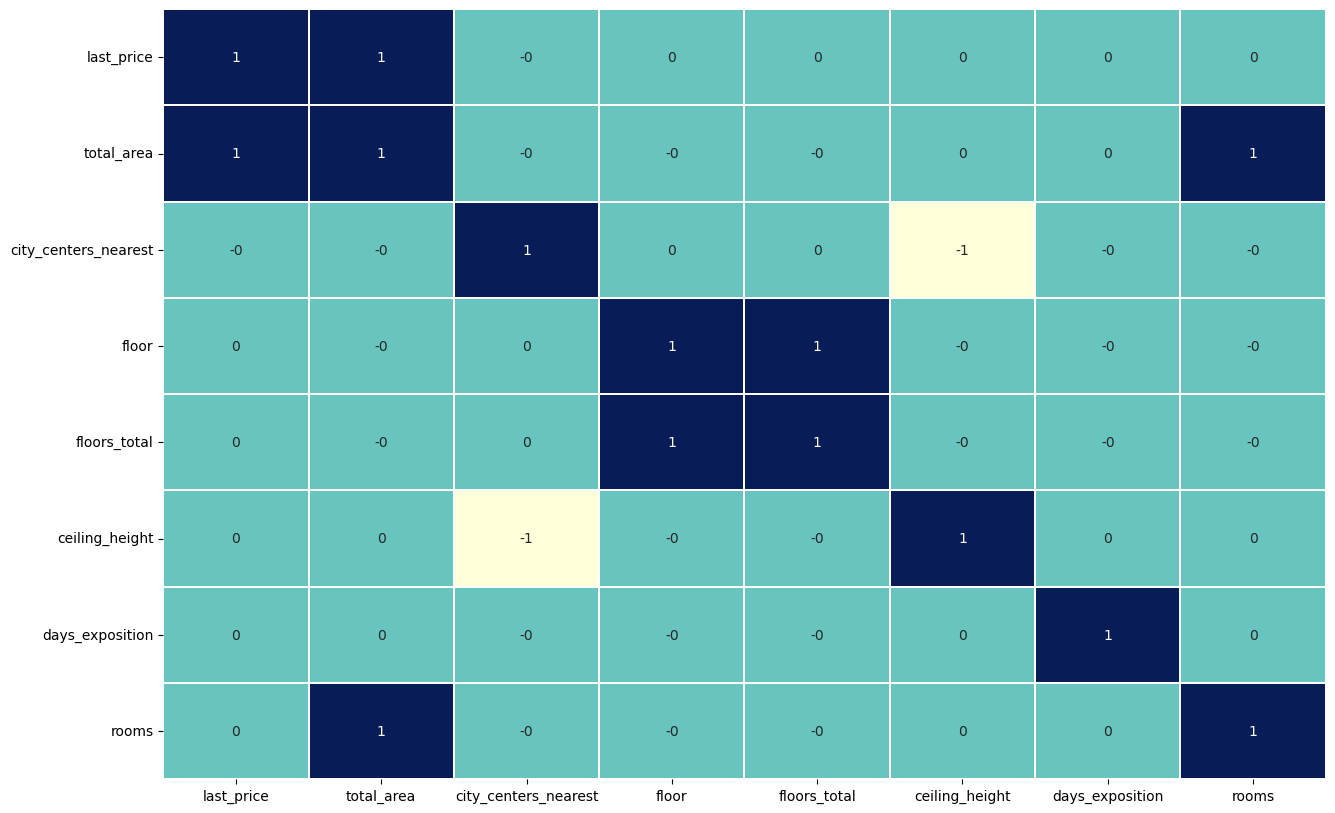

In [203]:
plt.figure(figsize=(15, 10))
sn.heatmap(round(data[['last_price', 
                       'total_area', 
                       'city_centers_nearest', 
                       'floor', 
                       'floors_total', 
                       'ceiling_height', 
                       'days_exposition', 
                       'rooms']].corr()), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

Цена объекта имеет сильную зависимость от общей площади, а также среднюю зависимость количества комнат и слабую от расстояния. Высота потолков имеет среднюю зависимость от расстояния до центра. Это связано с тем, что в центре больше квартир с высокими потолками.

### Средняя цена за один квадратный метр

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [204]:
mean_price_metr = data.pivot_table(
    index='locality_name', values='kv_metr_price', aggfunc={'mean', 'count'}) \
.sort_values(by='count', ascending=False).head(10)
round(mean_price_metr)

count      mean
locality_name                     
Санкт-Петербург    14982  111736.0
Мурино               578   86139.0
Кудрово              464   95309.0
поселок Шушары       433   78492.0
Всеволожск           393   68949.0
Пушкин               352  102749.0
Колпино              335   75280.0
поселок Парголово    325   90260.0
Гатчина              306   69009.0
Выборг               228   59818.0

In [205]:
mean_price_metr.sort_values(by='mean', ascending=False).round()

count      mean
locality_name                     
Санкт-Петербург    14982  111736.0
Пушкин               352  102749.0
Кудрово              464   95309.0
поселок Парголово    325   90260.0
Мурино               578   86139.0
поселок Шушары       433   78492.0
Колпино              335   75280.0
Гатчина              306   69009.0
Всеволожск           393   68949.0
Выборг               228   59818.0

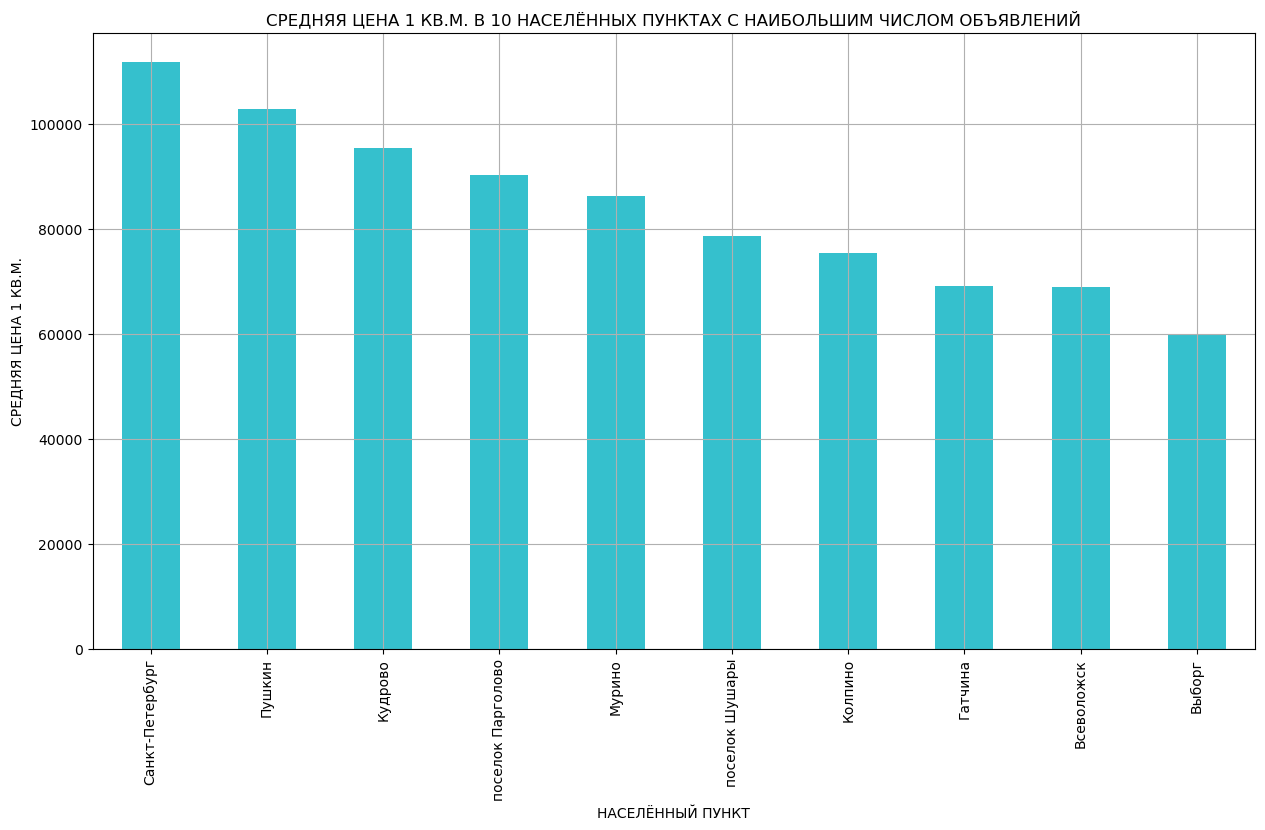

In [206]:
mean_price_metr.sort_values(by='mean', ascending=False)['mean'].plot(
    figsize=(15,8), 
    kind='bar',
    title='CРЕДНЯЯ ЦЕНА 1 КВ.М. В 10 НАСЕЛЁННЫХ ПУНКТАХ С НАИБОЛЬШИМ ЧИСЛОМ ОБЪЯВЛЕНИЙ',
    grid=True,
    color = '#35c0cd')
plt.ylabel('СРЕДНЯЯ ЦЕНА 1 КВ.М.')
plt.xlabel('НАСЕЛЁННЫЙ ПУНКТ');

По количеству объявлений на первых позициях Санкт-Петербург, Мурино, Кудрово. Замыкает десятку Выборг.
По средней цене за один квадратный метр лидирует Санкт-Петербург, за ним идут Пушкин и Кудрово. Замыкает десятку Выборг.

### Зависимость стоимости объектов от расстояния до центра города

Определим, какова зависимость стоимости объектов от расстояния до центра Санкт-Петербурга. Для вычислений оставим только Санкт-Петербург.

In [207]:
km_centre_spb = data.query('locality_name == "Санкт-Петербург"') 
km_centre_spb[['locality_name', 'city_сenters_nearest_km', 'last_price']].head(10)

locality_name  city_сenters_nearest_km  last_price
0   Санкт-Петербург                     16.0  13000000.0
2   Санкт-Петербург                     14.0   5196000.0
7   Санкт-Петербург                     12.0   7915000.0
9   Санкт-Петербург                     15.0   5400000.0
10  Санкт-Петербург                     14.0   5050000.0
15  Санкт-Петербург                     14.0   4650000.0
16  Санкт-Петербург                     11.0   6700000.0
17  Санкт-Петербург                     15.0   4180000.0
18  Санкт-Петербург                     11.0   3250000.0
19  Санкт-Петербург                     13.0  14200000.0

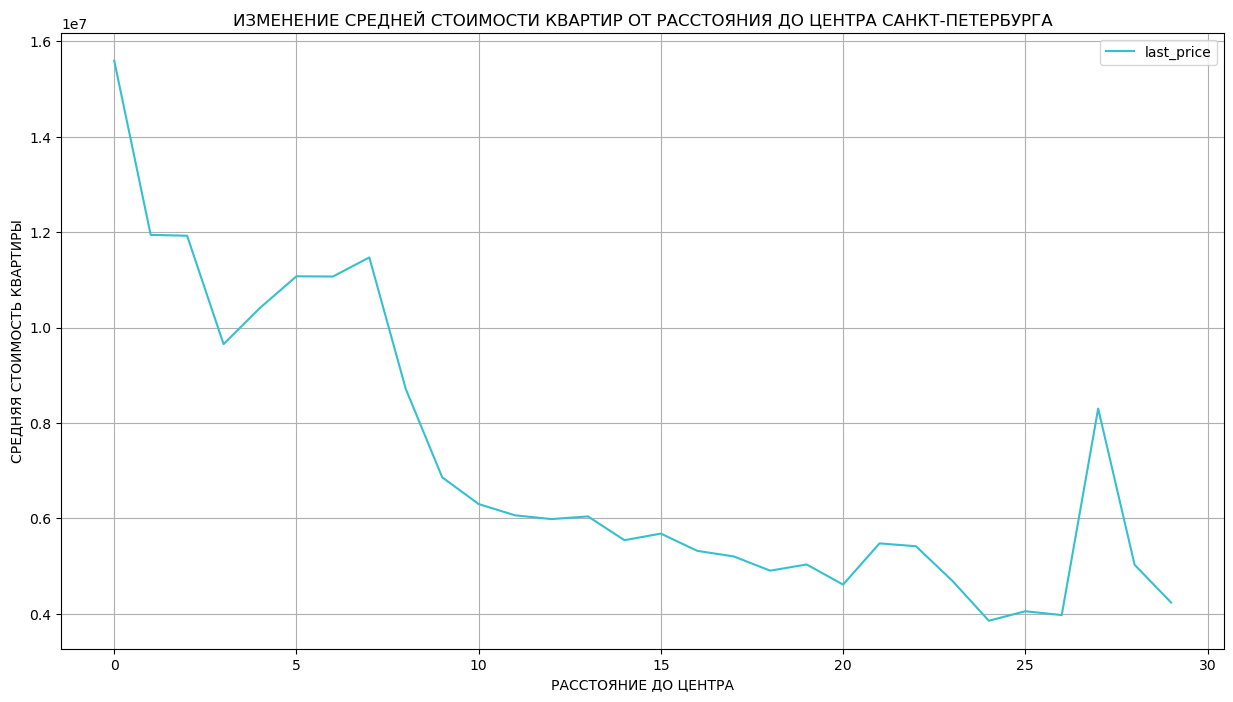

In [208]:
km_centre_spb.pivot_table(
    index = 'city_сenters_nearest_km', 
    values = 'last_price').plot(
    title='ИЗМЕНЕНИЕ СРЕДНЕЙ СТОИМОСТИ КВАРТИР ОТ РАССТОЯНИЯ ДО ЦЕНТРА САНКТ-ПЕТЕРБУРГА', 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd');
plt.ylabel('СРЕДНЯЯ СТОИМОСТЬ КВАРТИРЫ')
plt.xlabel('РАССТОЯНИЕ ДО ЦЕНТРА');

По графику видно, что чем дальше объект от центра города, тем он дешевле. Средняя стоимость квартиры резко падает на 3 км.
Следующий пик приходится на  6 км. Также виден всплеск на расстоянии 27 км.

In [209]:
data.query('city_сenters_nearest_km == 27')

total_images  last_price  total_area first_day_exposition  rooms  \
748             13  14350000.0        74.0           2017-11-28      2   
5961             6   2250000.0        32.0           2018-02-27      1   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
748             3.13             5         30.0      3          True  ...   
5961             NaN             2         16.5      2          True  ...   

      ponds_around_3000  ponds_nearest  days_exposition  perc_area  \
748                   0            NaN              128  40.540541   
5961                  0            NaN              178  51.562500   

     kv_metr_price  week_day  num_month  year_pub  floor_category  \
748       193919.0         1         11      2017          другой   
5961       70312.0         1          2      2018       последний   

      city_сenters_nearest_km  
748                      27.0  
5961                     27.0  

[2 rows x 29 columns]

На 27 км от центра Санкт-Петербурга выброс даёт двухкомнатная квартира общей площадью 74 кв.м. и стоимостью 14350000.  Возможно, эта квартира находится либо в Пушкине, либо в Сестрорецке. И тот и другой город считаются частью Санкт-Петербурга. И там и там присутствуют элитные коттеджи.

In [210]:
nepik_three_km = data.query('locality_name == "Санкт-Петербург" and city_сenters_nearest_km == 3.0') \
.groupby('floor_category').size()
nepik_three_km

floor_category
другой       189
первый        51
последний     70
dtype: int64

<Axes: >

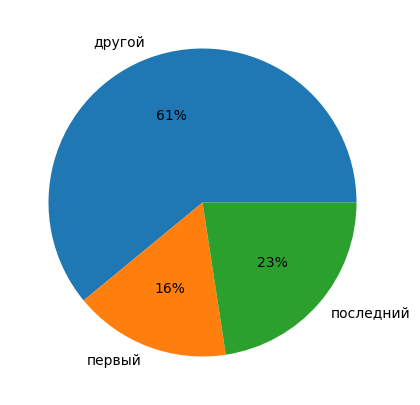

In [211]:
nepik_three_km.plot.pie(y='floor_category', autopct='%1.0f%%', figsize = (5,5))

In [212]:
pik_five_km = data.query('locality_name == "Санкт-Петербург" and city_сenters_nearest_km == 5.0') \
.groupby('floor_category').size()
pik_five_km

floor_category
другой       610
первый        73
последний    122
dtype: int64

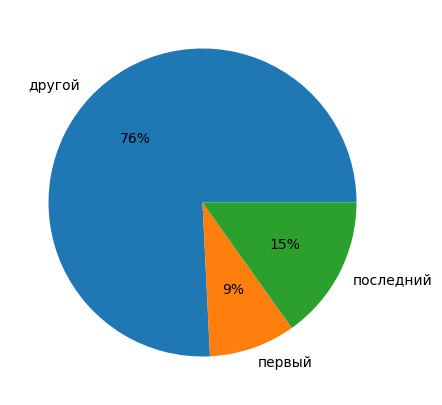

In [213]:
pik_five_km.plot.pie(y='floor_category', autopct='%1.0f%%', figsize = (5,5));

Резкое падение средней цены за квартиру на 3-м км от центра города можно объяснить тем, что здесь заканчивается центральный район Санкт-Петербурга. Пик на 5-м км можно объяснить тем, что количество объявлений с промежуточными этажами на данном километре больше, а стоят такие квартиры дороже. Причем получается, что эти квартиры ещё не слишком далеко от центра.

### Вывод

Для наиболее интересных параметров были построены и изучены гистограммы:
* Меньше всего квартир с общей площадью от 140 кв.м и далее. Немного больше квартир с общей площадью от 20 до 30 кв.м и  от 100 кв.м до 130 кв.м. Большая часть квартир имеет общую площадь от 40 до 68 кв.м. Пиковое значение приходится где-то на 46 кв.м.
* Квартир с жилой площадью от 10 до 14 кв.м мало. Далее, чем больше жилая площадь, тем больше выбор. Пик приходится примерно на 18 кв.м, а затем, резко падает и, квартир с жилой площадью примерно между 23 и 25 кв.м становится заметно меньше. Квартир с жилой площадью от 26 до 36 кв.м снова больше. Такие скачки могут быть связаны со стандартами планировки жилых квартир. Но в целом основная масса квартир имеет площадь от 18 до 40 кв.м.
* Большая часть квартир на рынке имеет площадь кухни от 6 до 11 кв.м.
* Большая часть квартир находится в ценовой категории от 3450000 до 6550000.
* Больше всего представлено 1-комнатных и 2-комнатных квартир. 3-комнатных меньше. Мало вариантов 4-комнатных, 5-комнатных и 6-комнатных.
* Большая часть квартир имеет высоту потолков от 2.5 до 2.8 кв.м.
* Большая часть квартир расположена на этажах от 2-го до 8-го. Резкий спад виден после 5-го этажа. Далее, следующий срез идёт от 6-го до 9-го этажа.
* Квартир на первых и последних этажах намного меньше, чем всех других вместе взятых.
* Большая часть квартир находится в домах, которые имеют от 5 до 15 этажей. Больше всего 5-этажных домов, а следующий пик приходится на 9-этажные.
* Ближе к центру города меньше построек, чем, например, на расстоянии от 10000 до 17000 м. Скорее всего 10000 - 17000 - это спальные районы Петербурга. Далее, чем дальше от центра, тем меньше построек.
* Большая часть квартир находится на расстоянии от 18428 до 37417 м до единственного аэропорта в Санкт-Петербурге - Пулково. Пиковое значение (резкий подъем) приходится на расстояние 27000 м. Большая часть квартир находится на севере.
* В основном все квартиры находятся на расстоянии 289-613 м от парка.
* На выходных желающих публиковать объявления становится заметно меньше. 
* Меньше всего желающих публиковать объявление в первый и в последний месяц года, а также в мае. Все месяцы опережает февраль.

Было изучено, за какие сроки продаются квартиры. Медиана - 92 дня. Большая часть квартир продаётся от 44 до 218 дней. Быстрые продажи занимали менее 44 дней, а долгие - больше 218 дней. Есть объявления, которые висят очень долго. Например, 1000 дней и более.

Было обнаружено, что средняя скорость продаж с 2014 по 2019 года падала. Причиной тому стал кризис 2014 года.

Изучены факторы, влияющие на скорость продаж квартир. замечено:
* Чем ближе к центру находится объект, тем быстрее он продаётся;
* Первые этажи продаются быстрее. Возможно, потому, что они дешевле. Промежуточные этажи дороже, чем первый и последний, а продаются медленнее;
* Чем дешевле квартира, тем быстрее она продаётся.

Изучено как некоторые факторы, влияют на стоимость объекта:
* Стоимость объекта сильно зависит от общей площади. Чем больше площадь квартиры, тем слабее прослеживается линейная зависимость. Наиболее четкая зависимость прослеживается между площадями от 20 до 120 кв.м;
* Стоимость объекта имеет среднюю зависимость от жилой площади. Чем больше жилая площадь квартиры, тем слабее прослеживается линейная зависимость. Наиболее четкая зависимость прослеживается между площадями от 10 до 60 кв.м;
* Стоимость объекта имеет слабую зависимость от площади кухни. Наиболее линейная зависимость прослеживается между площадями от 5 до 15 кв.м;
* Стоимость объекта имеет среднюю зависимость от количества комнат;
* Первые этажи самые дешёвые. Последние этажи дороже, но не такие дорогие, как промежуточные;
* С 2014 по 2015 год стоимость квартир упала и держалась на низком уровне до 2018 года. Далее вновь начался подъем цен;

Посмотрели, как менялось количество размещённых объявлений по годам: меньше всего объявлений было в 2014 году, что, возможно, связано с кризисом. В 2018 году больше всего объявлений.

Была изучена цена за один кв.м. В десятке по количеству объявлений средняя цена за один квадратный метр самая большая в Санкт-Петербурге. За ним идут Пушкин и Кудрово. Замыкает десятку Выборг.

Мы определили зависимость стоимости объектов от расстояния до центра города. На 27 км от центра Санкт-Петербурга выброс даёт двухкомнатная квартира общей площадью 74 кв.м. и стоимостью 14350000. Вполне возможно, эта квартира находится либо в Пушкине, либо в Сестрорецке. И тот и другой город считаются частью Санкт-Петербурга. И там и там присутствуют элитные коттеджи.
Также на графике обнаружено резкое падение цены на 3 км и, второй пик на 5 км.
Резкое падение средней цены за квартиру на 3-м км от центра города можно объяснить тем, что здесь заканчивается центральный район Санкт-Петербурга. Пик на 5-м км можно объяснить тем, что количество объявлений с промежуточными этажами на данном километре больше, а стоят такие квартиры дороже. Причем получается, что эти квартиры ещё не слишком далеко от центра.

## Общий вывод

Всего предоставлено 23699 объектов для исследования. Удалено 878 строк, что составляет 3,7 % от всех данных. Остальная, большая часть предоставленных данных - это типичные объекты, которые подходят для выборки и работы с ней.
Выявлено, что типичная квартира в Санкт-Петербурге и соседних населённых пунктах:
* имеет общую площадь от 40 до 68 кв.м. Самая часто встречаемая общая площадь - 46 кв.м;
* имеет жилую площадью 18 кв.м;
* имеет площадь кухни от 6 до 11 кв.м;
* находится в ценовой категории от 3450000 до 6550000;
* состоит из одной или двух комнат;
* имеет высоту потолков от 2.5 до 2.7 кв.м;
* расположена на этажах от 2-го до 5-го в 5-этажном доме;
* находится на расстоянии до центра города в 10000-17000 м;
* находится на севере и на расстоянии от 18428 до 37417 м до аэропорта Пулково;
* находятся на расстоянии  289-613 м. от парка.

Также обнаружено, что:
* чем ближе к центру находится объект, тем быстрее он продаётся;
* тяжелее всего продаются квартиры в начале и в конце года, а также в мае. 
* в феврале публикуется больше всего объявлений;
* большая часть квартир продаётся от 44 до 218 дней;
* больше всего на стоимость объекта влияет общая площадь квартиры;
* первые этажи самые дешёвые и продаются быстрее;
* последние этажи дороже, чем первые, но не такие дорогие, как промежуточные;
* с 2014 по 2015 год стоимость квартир упала и держалась на низком уровне до 2018 года;
* средняя цена за один квадратный метр самая большая в Санкт-Петербурге. За ним идут Пушкин и Кудрово;
* чем дальше объект от центра города, тем он дешевле.